## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!


They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=  pd.read_csv("rock_density_xray.csv")
df.head()

Rebound Signal Strength nHz  Rock Density kg/m3
0                    72.945124            2.456548
1                    14.229877            2.601719
2                    36.597334            1.967004
3                     9.578899            2.300439
4                    21.765897            2.452374

## EDA

In [3]:
df.shape

(300, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [8]:
df.describe().T

count       mean        std       min        25%  \
Rebound Signal Strength nHz  300.0  49.725766  28.341792  0.700227  25.685798   
Rock Density kg/m3           300.0   2.225063   0.314512  1.500000   1.987830   

                                   50%        75%        max  
Rebound Signal Strength nHz  50.602886  74.854294  98.831658  
Rock Density kg/m3            2.268597   2.476944   2.750000

In [11]:
# Renaming couluns
df.columns = ['signals', 'density']

## Visualiztion 

<Figure size 2400x1600 with 0 Axes>

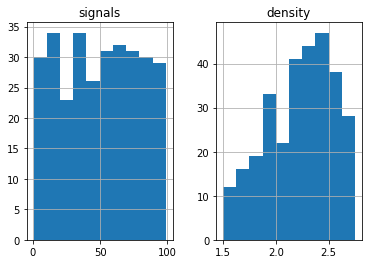

In [27]:
plt.figure(figsize=(12,8),dpi=200)
df.hist();

<AxesSubplot:ylabel='signals'>

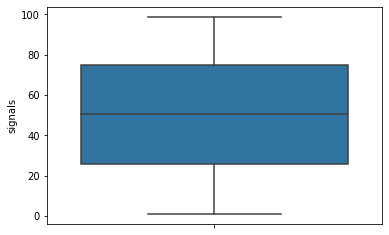

In [29]:

sns.boxplot(data=df, y='signals')

<AxesSubplot:ylabel='density'>

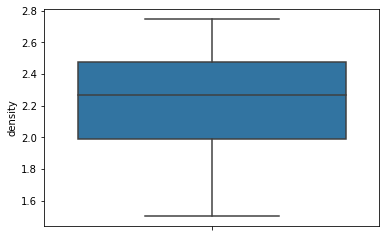

In [21]:
sns.boxplot(data=df,y='density')

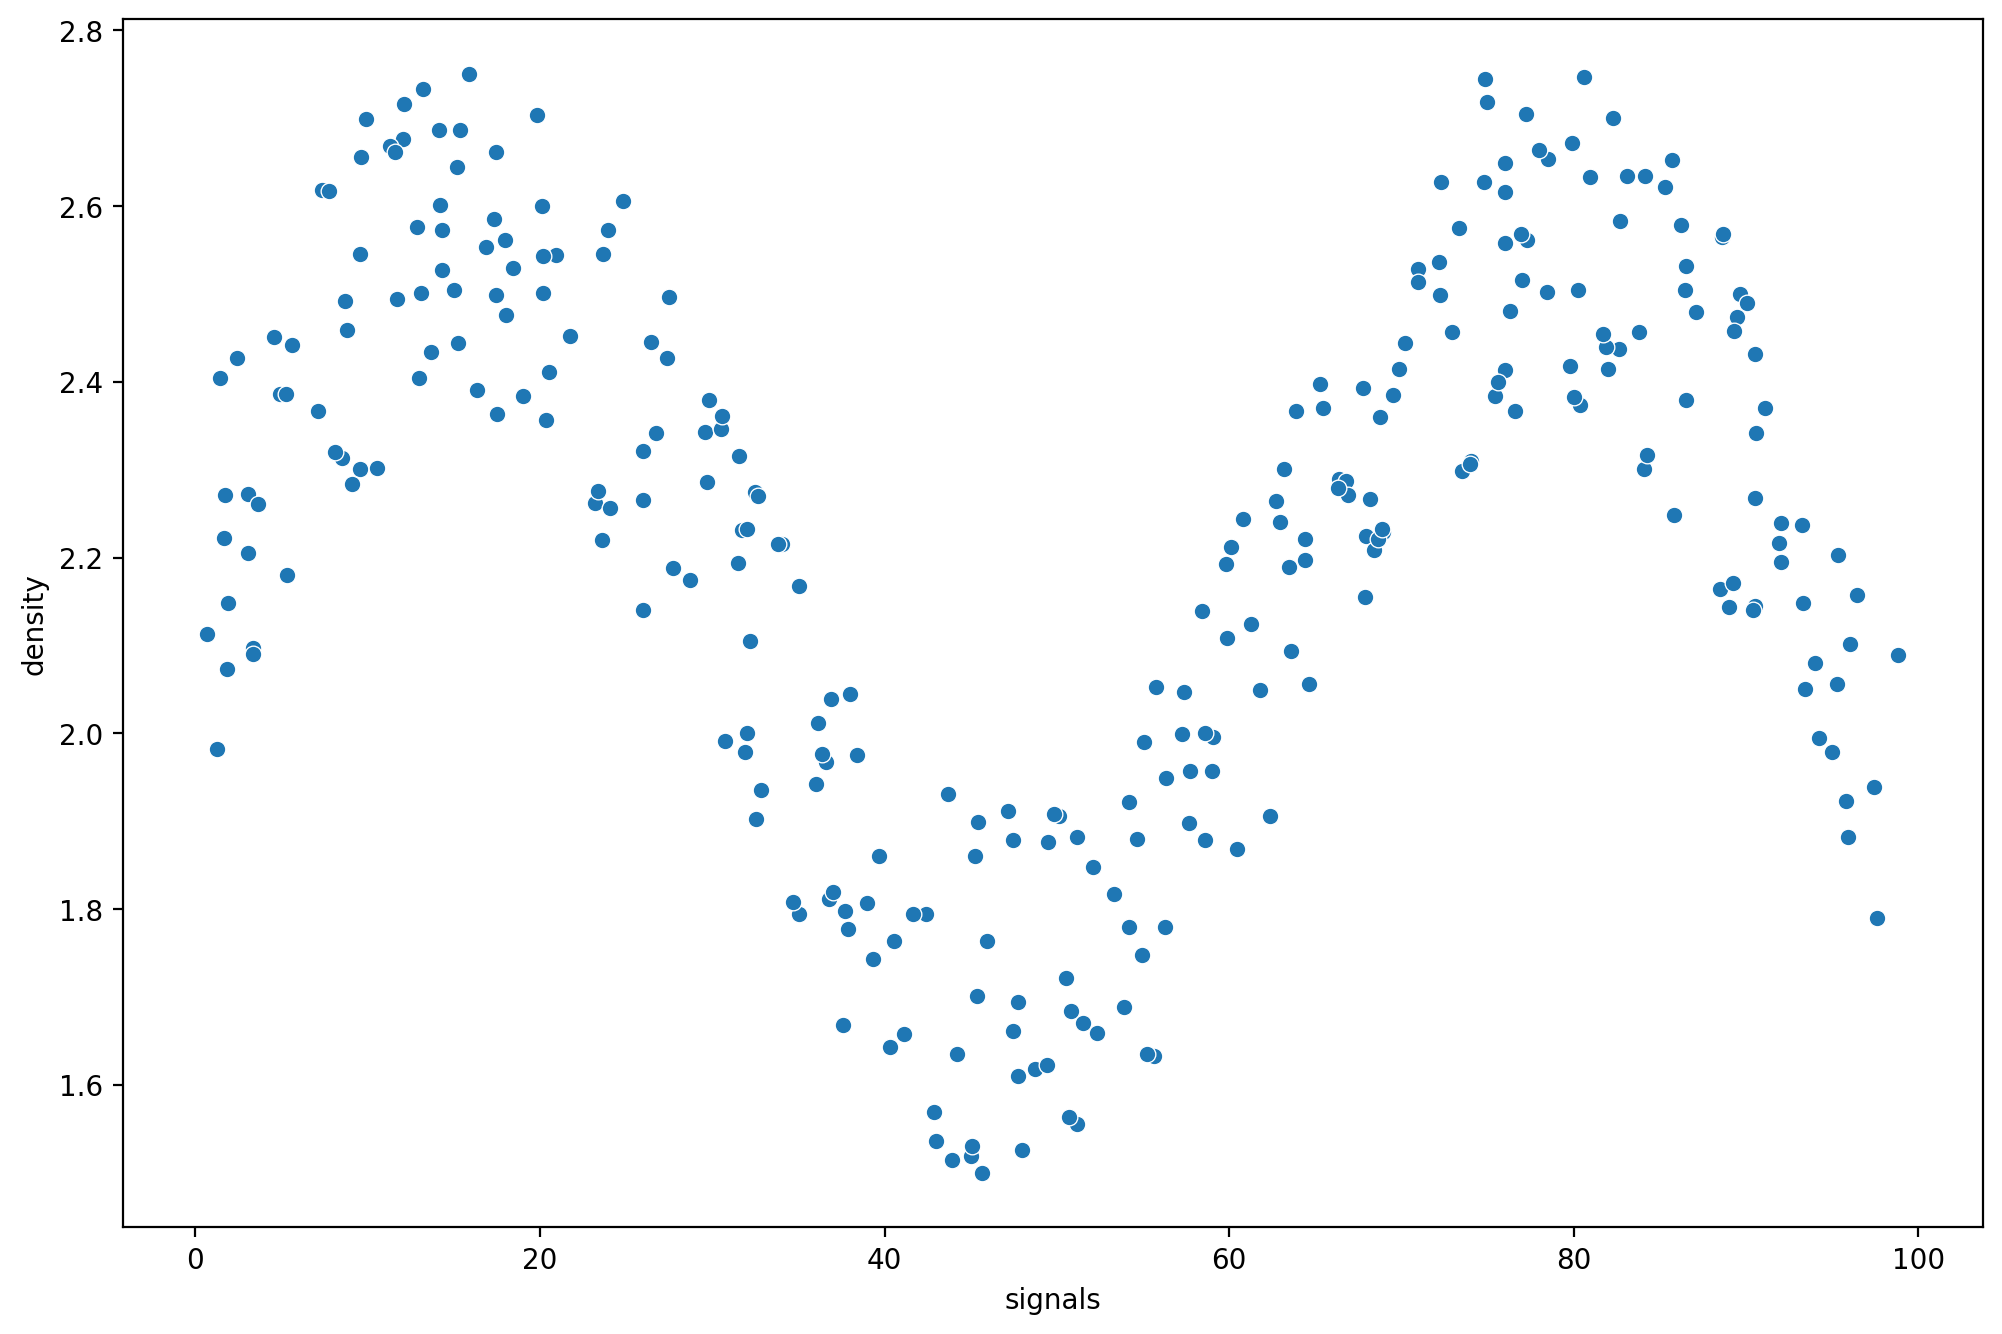

In [30]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df, x='signals',y='density');

## Train | Test Split

In [31]:
X = df.signals.values.reshape(-1,1)
y = df.density

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Linear Regression

In [34]:
# Training and prediting linear model on the data
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

In [36]:
# Evaluating Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test,lr_pred)
rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
print(f'MAE : {mae}')
print(f"RMSE : {rmse}")

MAE : 0.2369211828242142
RMSE : 0.29280140172610514


The result is not that much bad, but as we saw above from the scator plot that the there is sinusoidal graph of "signals" vs "density" so linear regression always find linear solution to the problem lets visualize the result here and see whats happing

In [37]:
# cNew preditions on whole X
lr_output  = lr_model.predict(X)

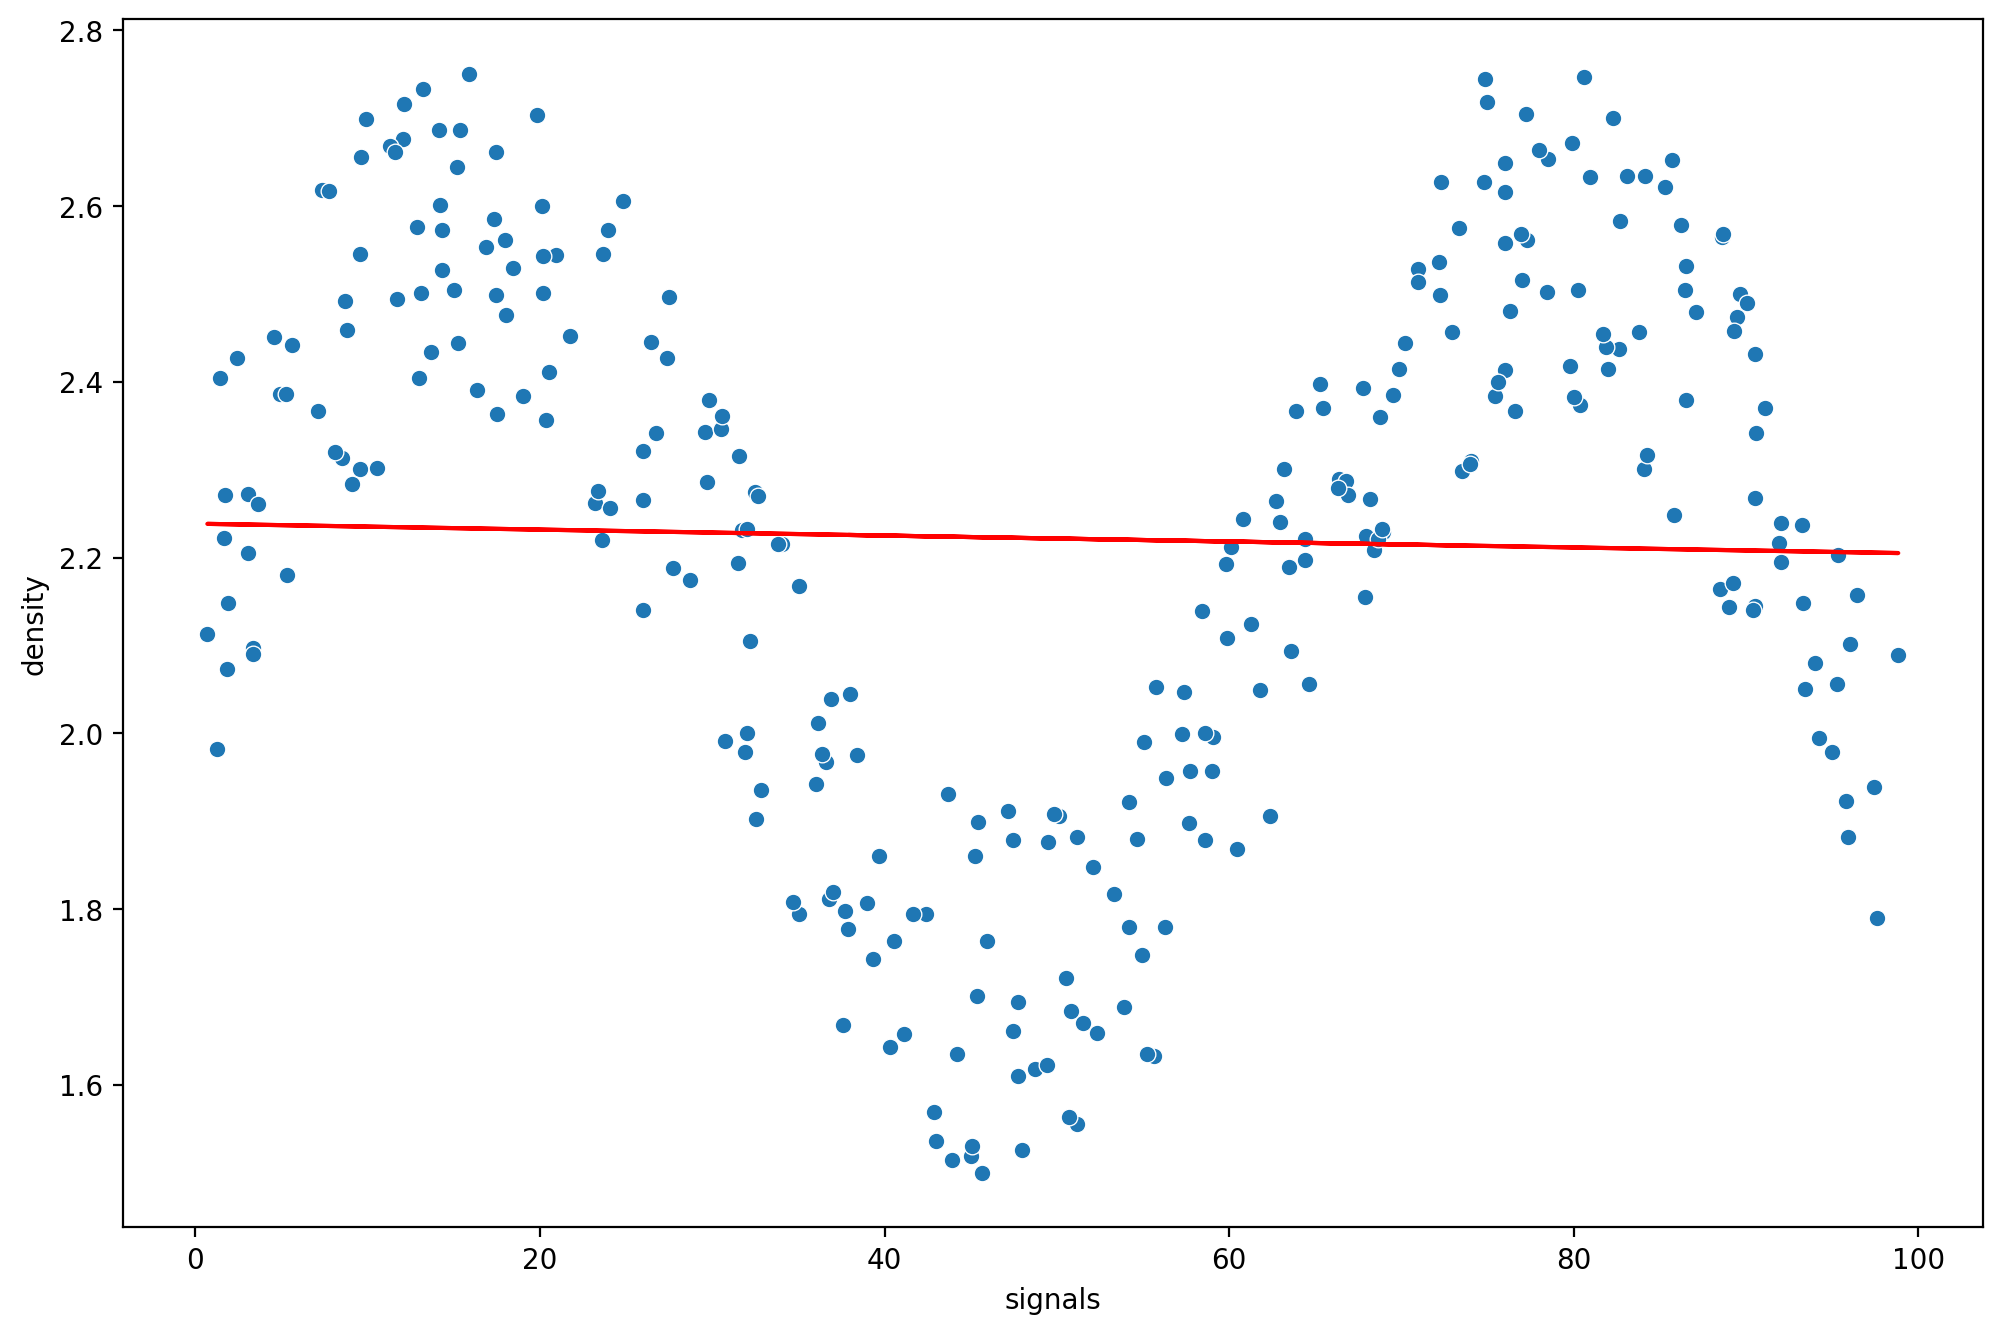

In [61]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df, x='signals',y='density')
# sns.scatterplot(x=X,y=y)
plt.plot(X,lr_output, color = "r");

This shows that linear regression is not the best model for the data.we can verify it fro the plot bellow that LR is not best fit for the data

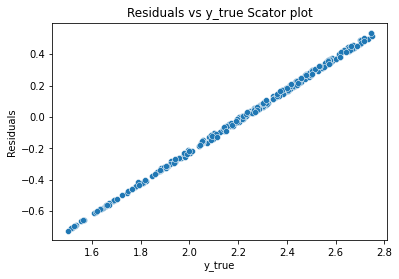

In [47]:
# Creating Residual vs y_true Plot
residuals = y - lr_output
sns.scatterplot(x=y,y = residuals)
plt.title("Residuals vs y_true Scator plot")
plt.xlabel("y_true")
plt.ylabel("Residuals");

## Creating fucntion

Creating a function it will take model and data as input then fit and evaluate a regression model and then creat a scattor plot to see it visually how the model works

In [112]:
def run_model(model,data):
    # Creating feature target
    X = data.signals.values.reshape(-1,1)
    y = data.density
    # Spliting into train test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    # Fiting model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    
    # Evaluating the model
    mea = mean_absolute_error(y_test,predictions)
    rmse = np.sqrt(mean_squared_error(y_test,predictions))
    
    print(f"MAE : {mae}")
    print(f"RMSE : {rmse}")
    print('-------------')
    
#     # Visualizing the results
#     signal_range = np.arange(0,100)
#     range_prediction  = model.predict(signal_range.reshape(-1,1))
#     plt.figure(figsize=(12,8),dpi=200)
#     sns.scatterplot(data=df, x='signals',y='density')
#     plt.plot(signal_range,range_prediction, color = "r");

    # Visualizing the results
    data = data.sort_values(by="signals")
    X_sort = data.signals.values.reshape(-1,1)
    y_sort = data.density
    prediction  = model.predict(X_sort)
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(data=df, x='signals',y='density')
    plt.plot(X_sort,prediction, color = "r");

MAE : 0.2369211828242142
RMSE : 0.29280140172610514
-------------


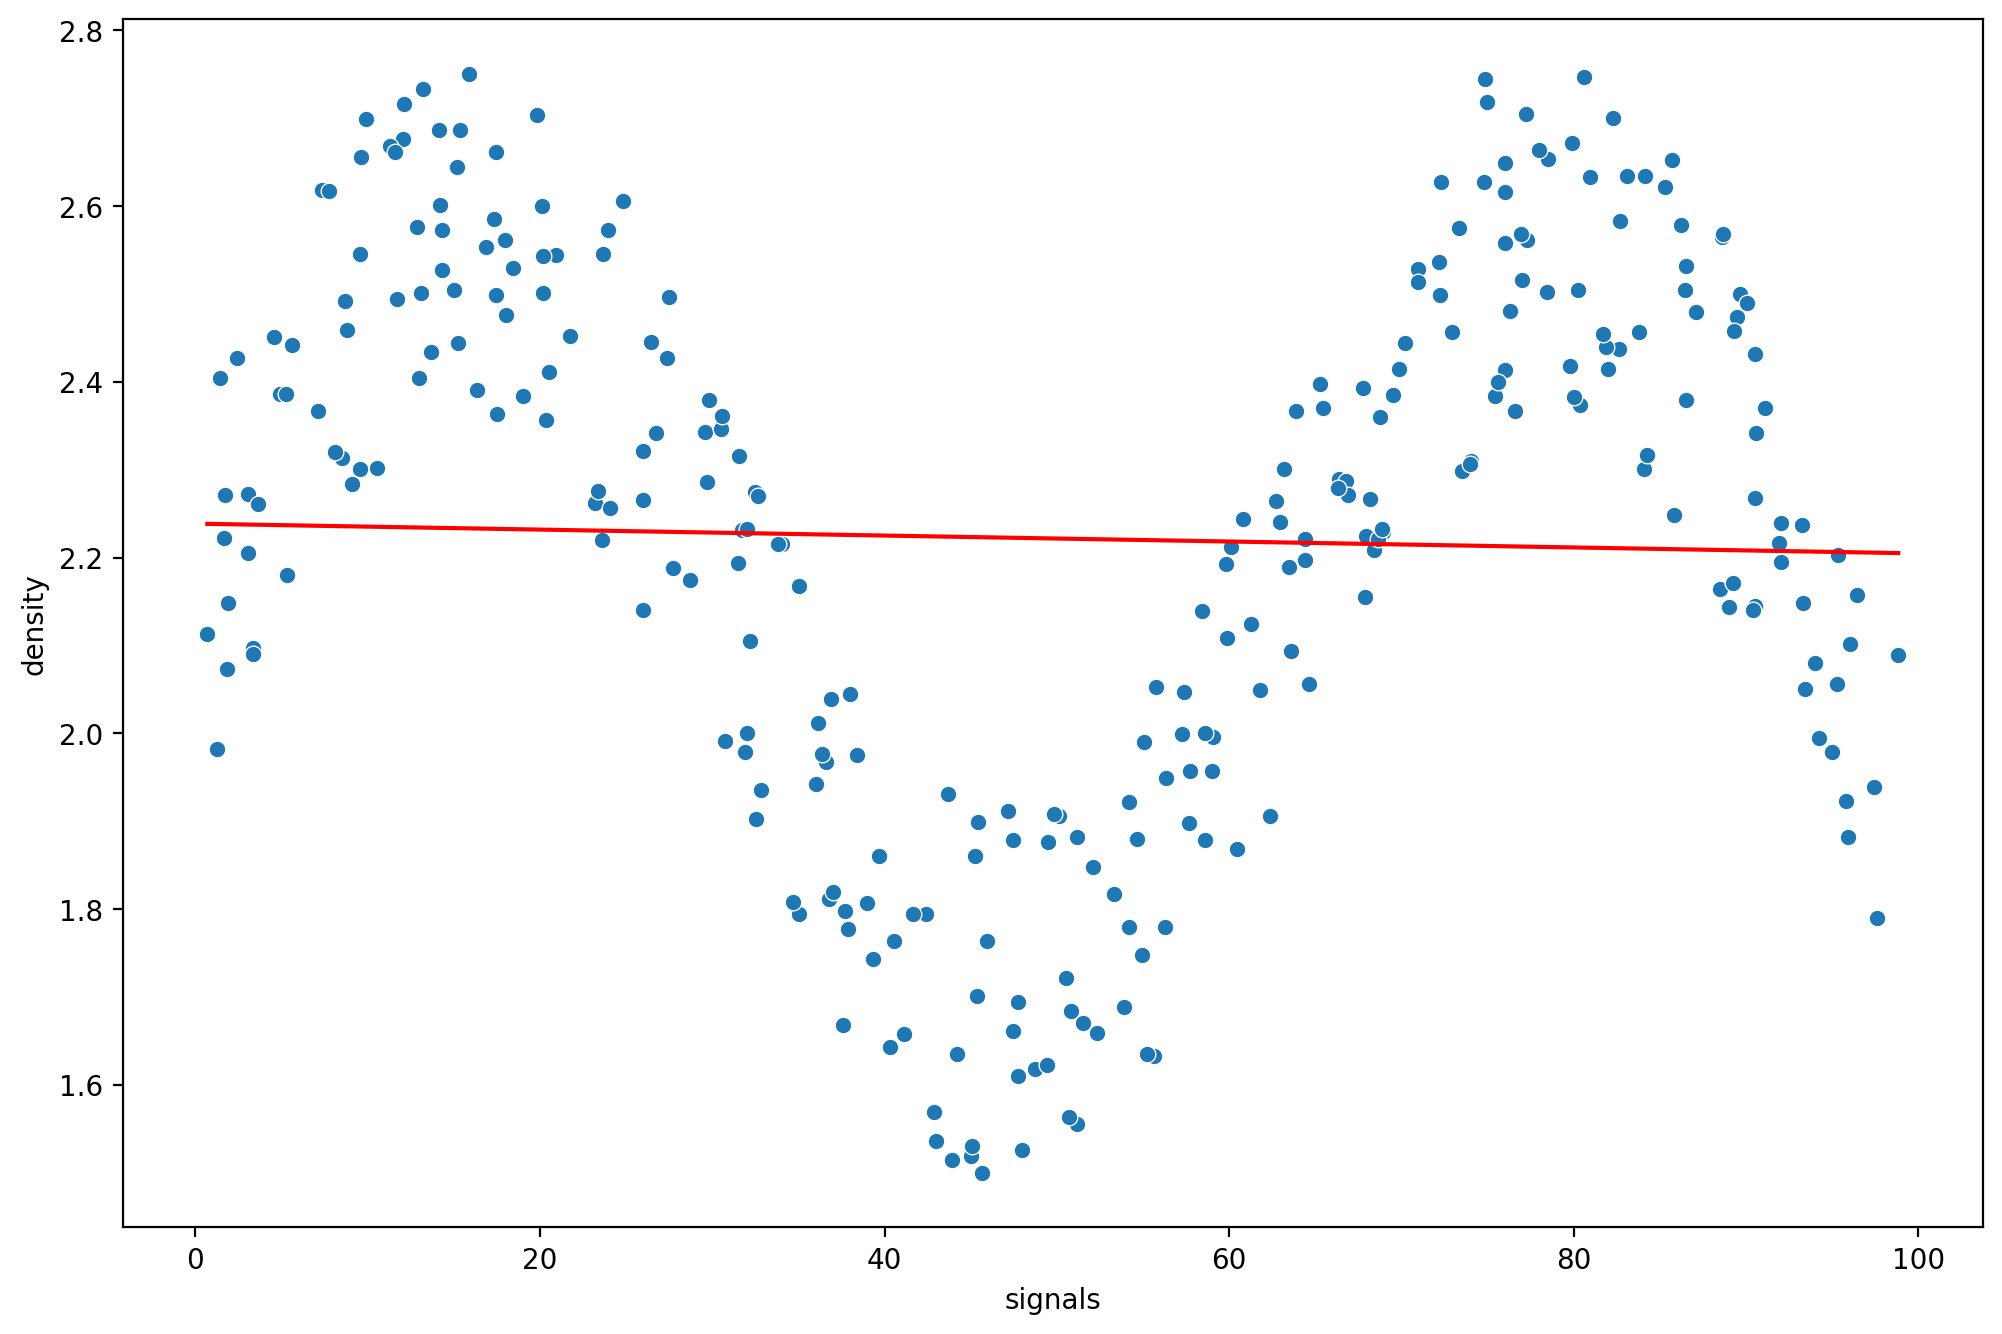

In [113]:
run_model(lr_model,df)

## Polynomial regression

In [66]:
from sklearn.pipeline import make_pipeline # Creating pipline
from sklearn.preprocessing import PolynomialFeatures # converting into polynomial features

MAE : 0.2369211828242142
RMSE : 0.28551731918264184
-------------
MAE : 0.2369211828242142
RMSE : 0.27448005553248184
-------------
MAE : 0.2369211828242142
RMSE : 0.14501569578591683
-------------
MAE : 0.2369211828242142
RMSE : 0.14351132635292826
-------------
MAE : 0.2369211828242142
RMSE : 0.13328125119121412
-------------
MAE : 0.2369211828242142
RMSE : 0.13270377332783595
-------------
MAE : 0.2369211828242142
RMSE : 0.13218253446288356
-------------
MAE : 0.2369211828242142
RMSE : 0.13148961546433724
-------------


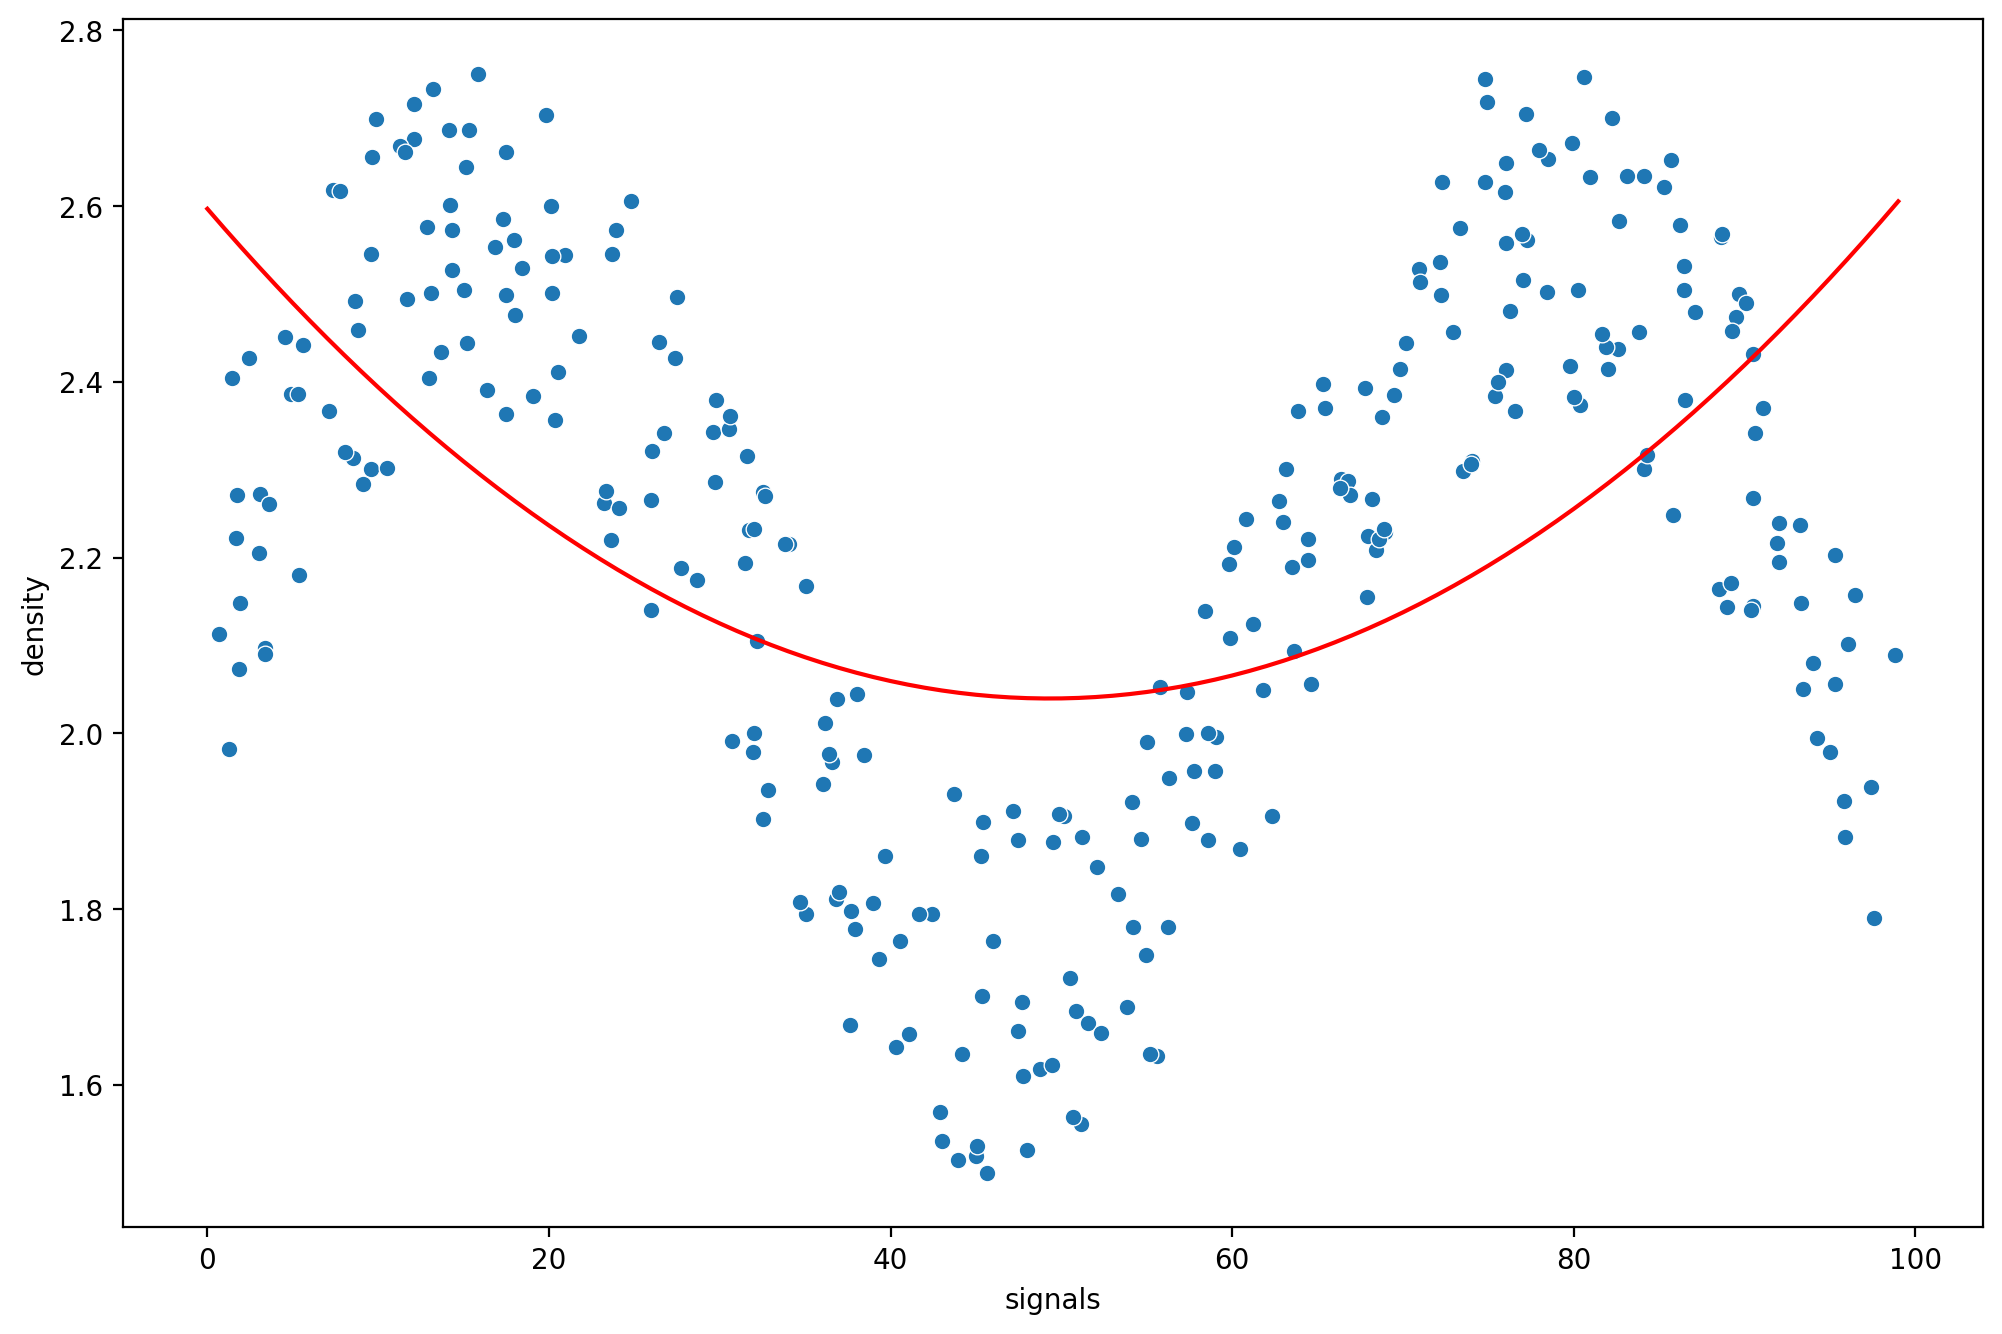

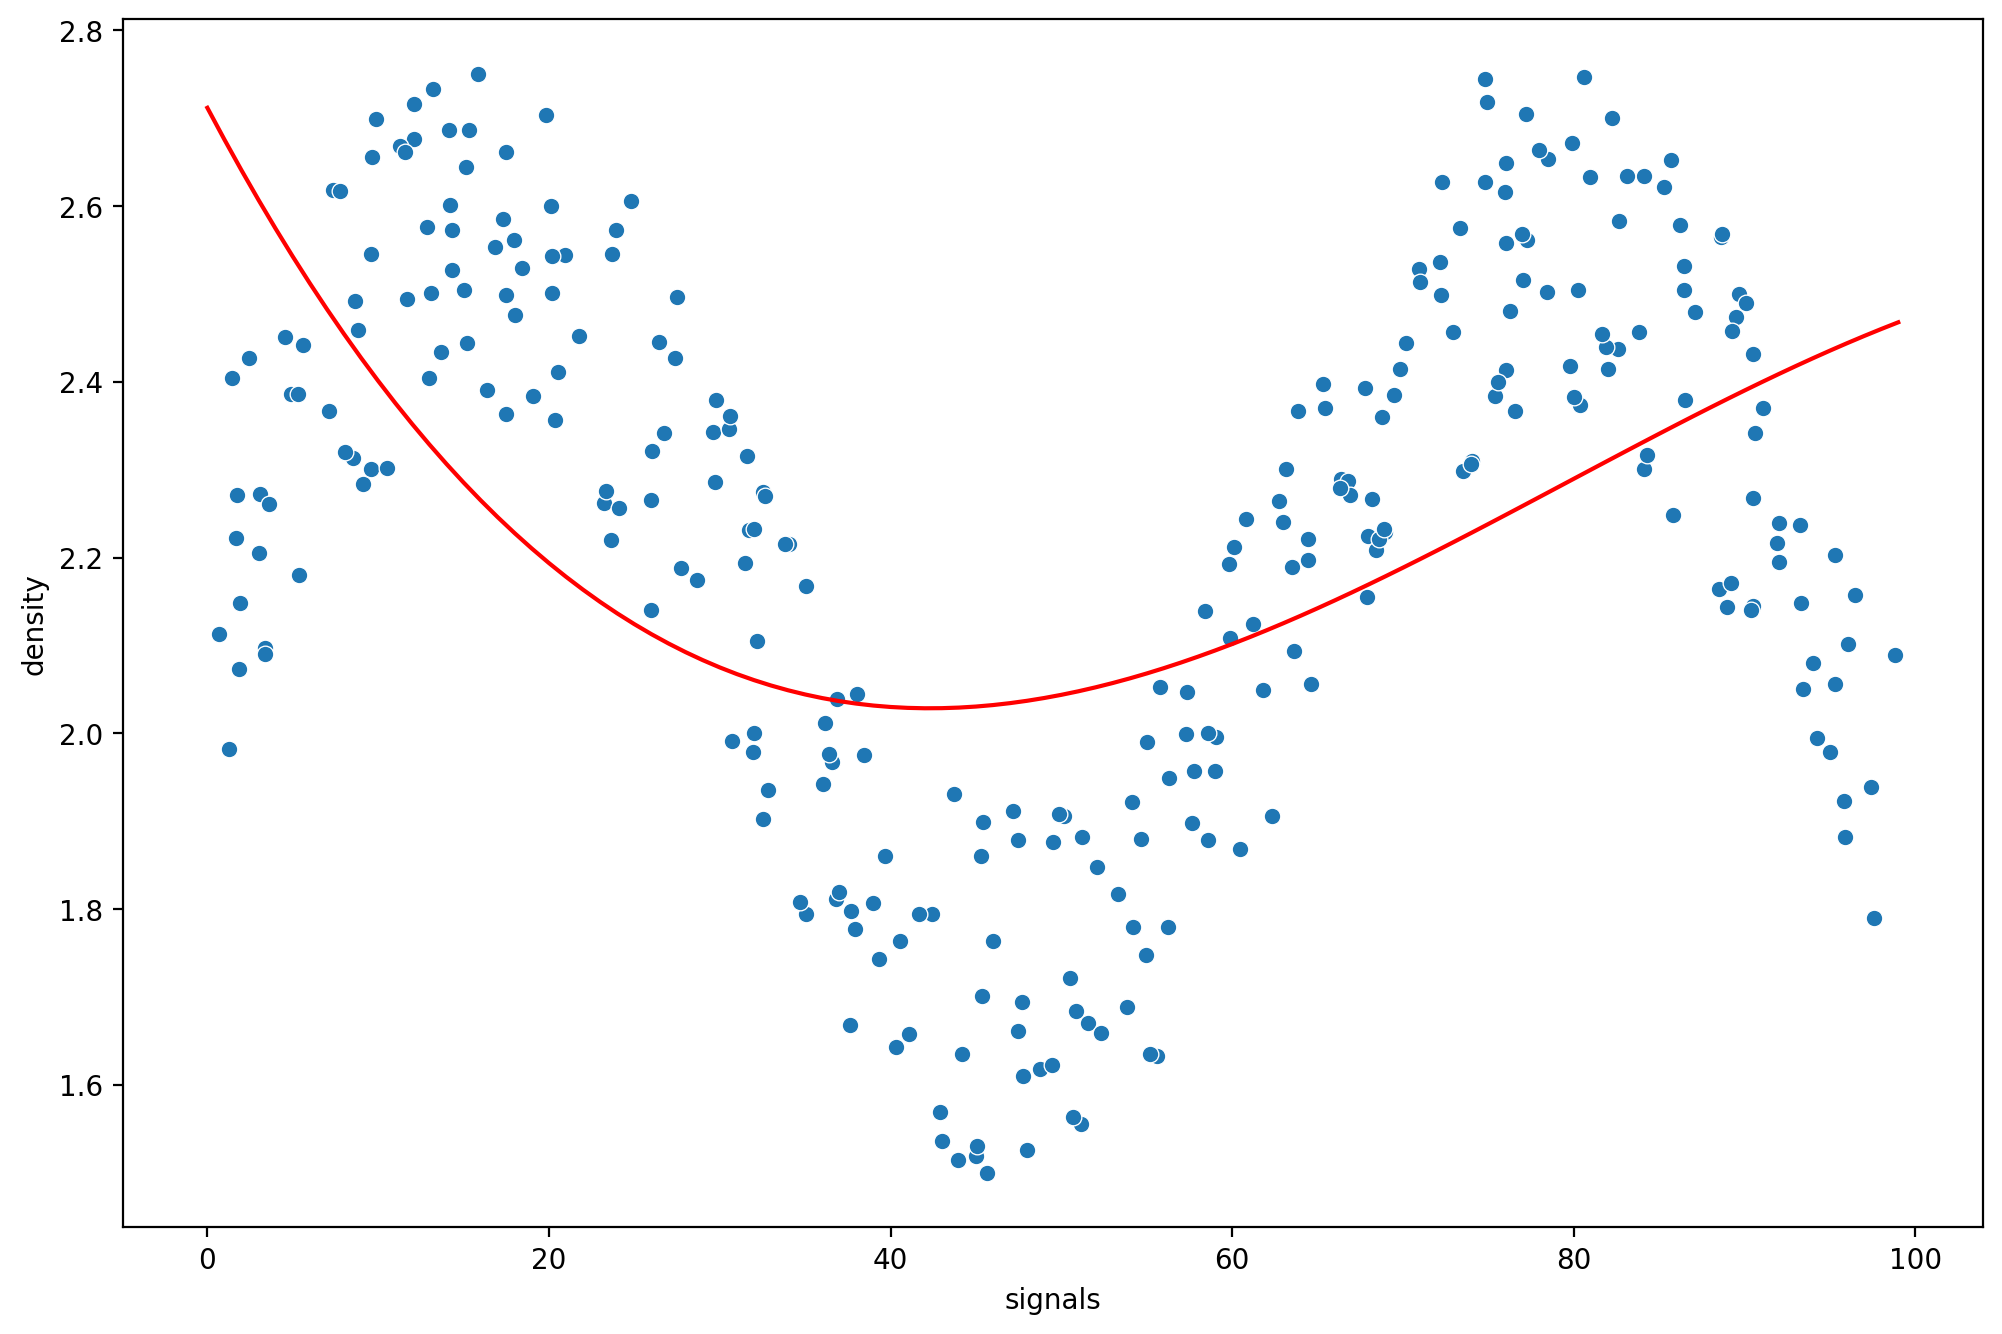

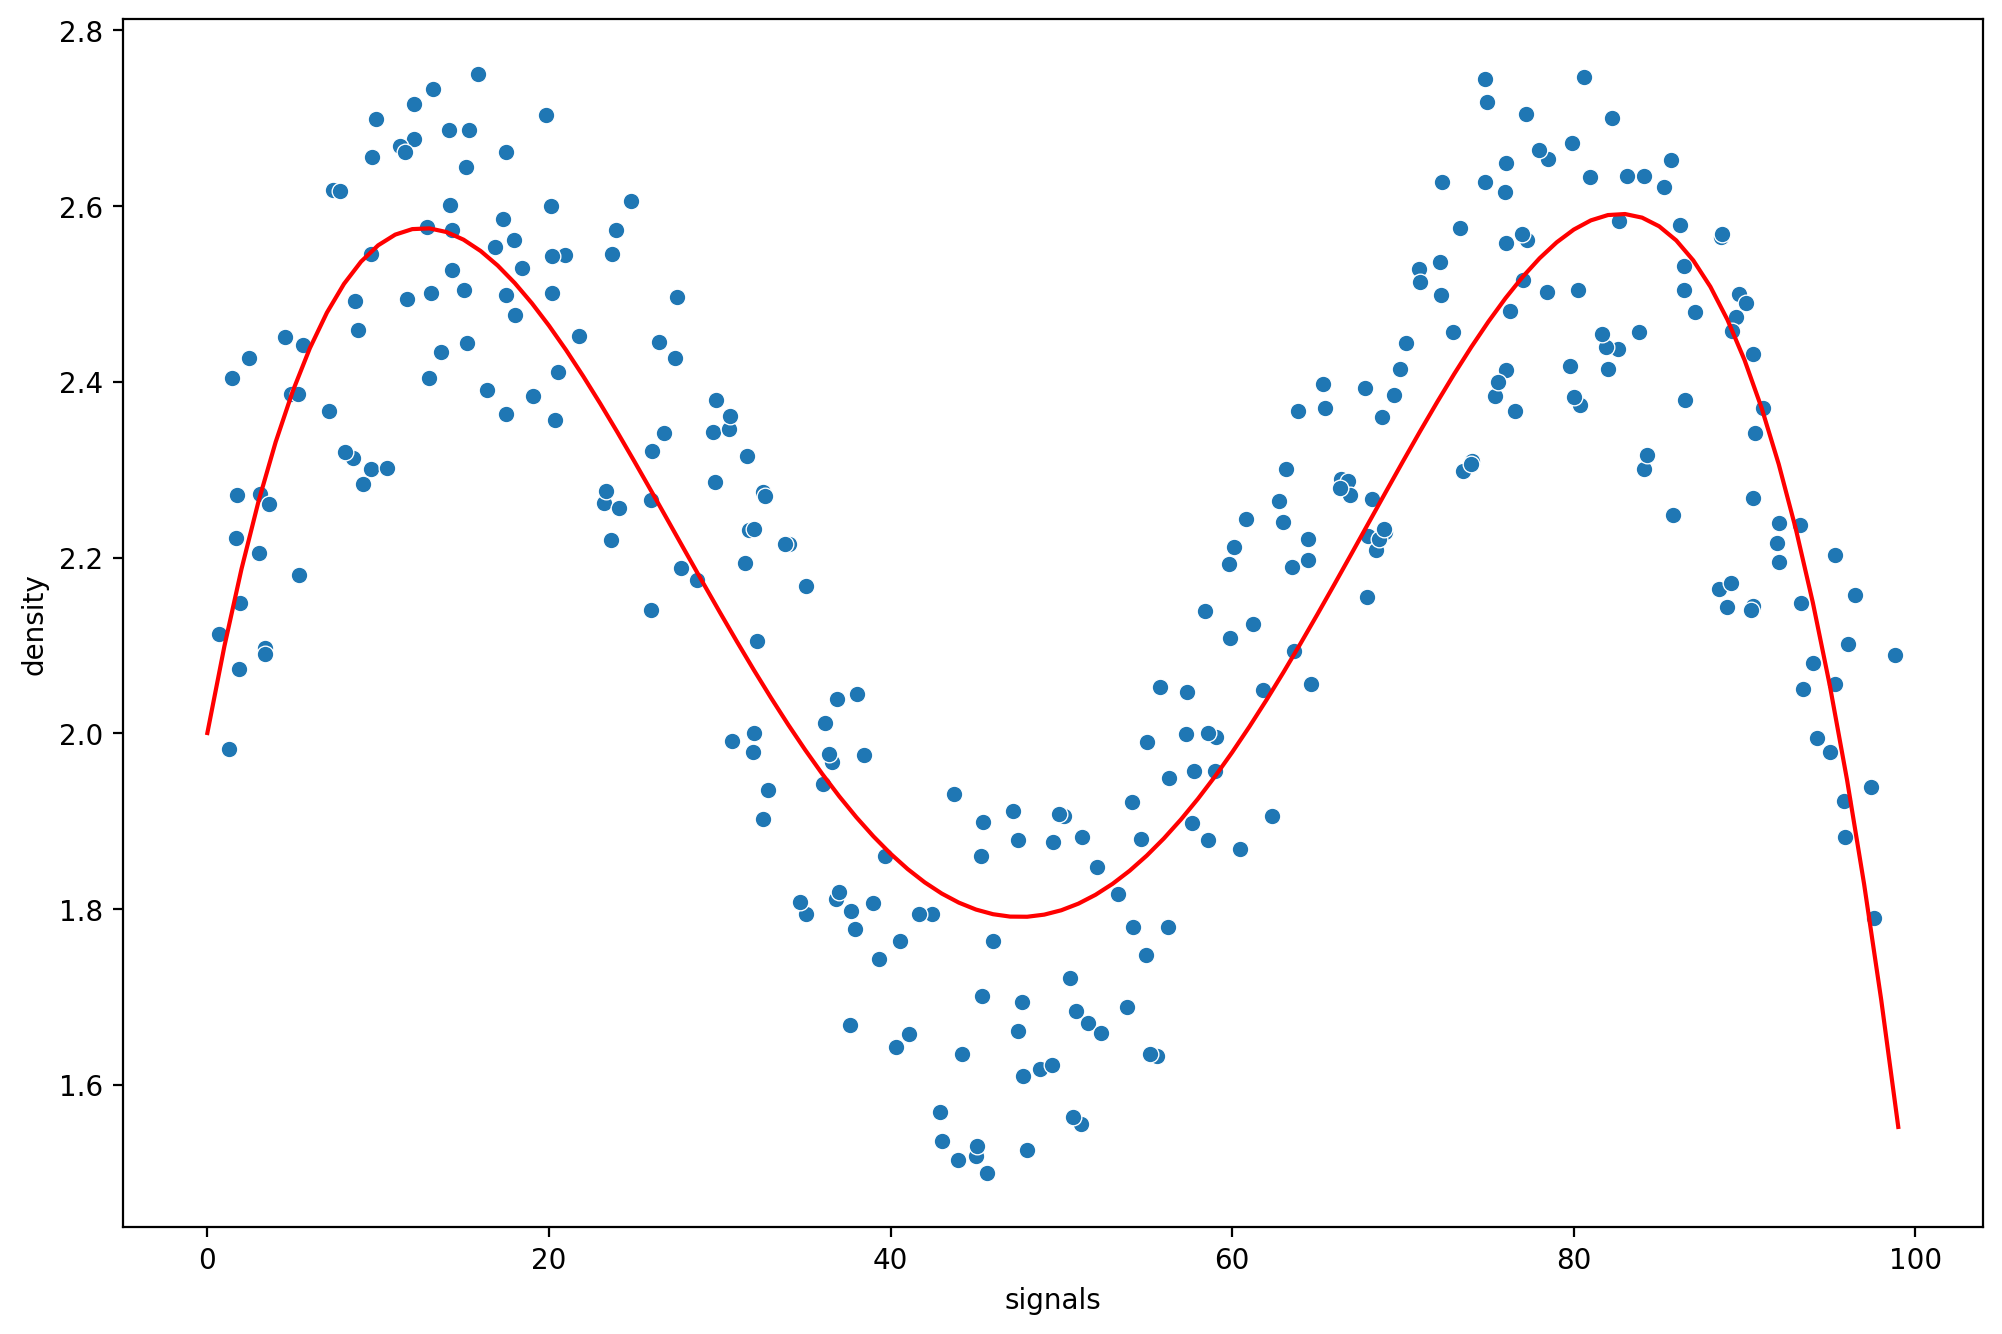

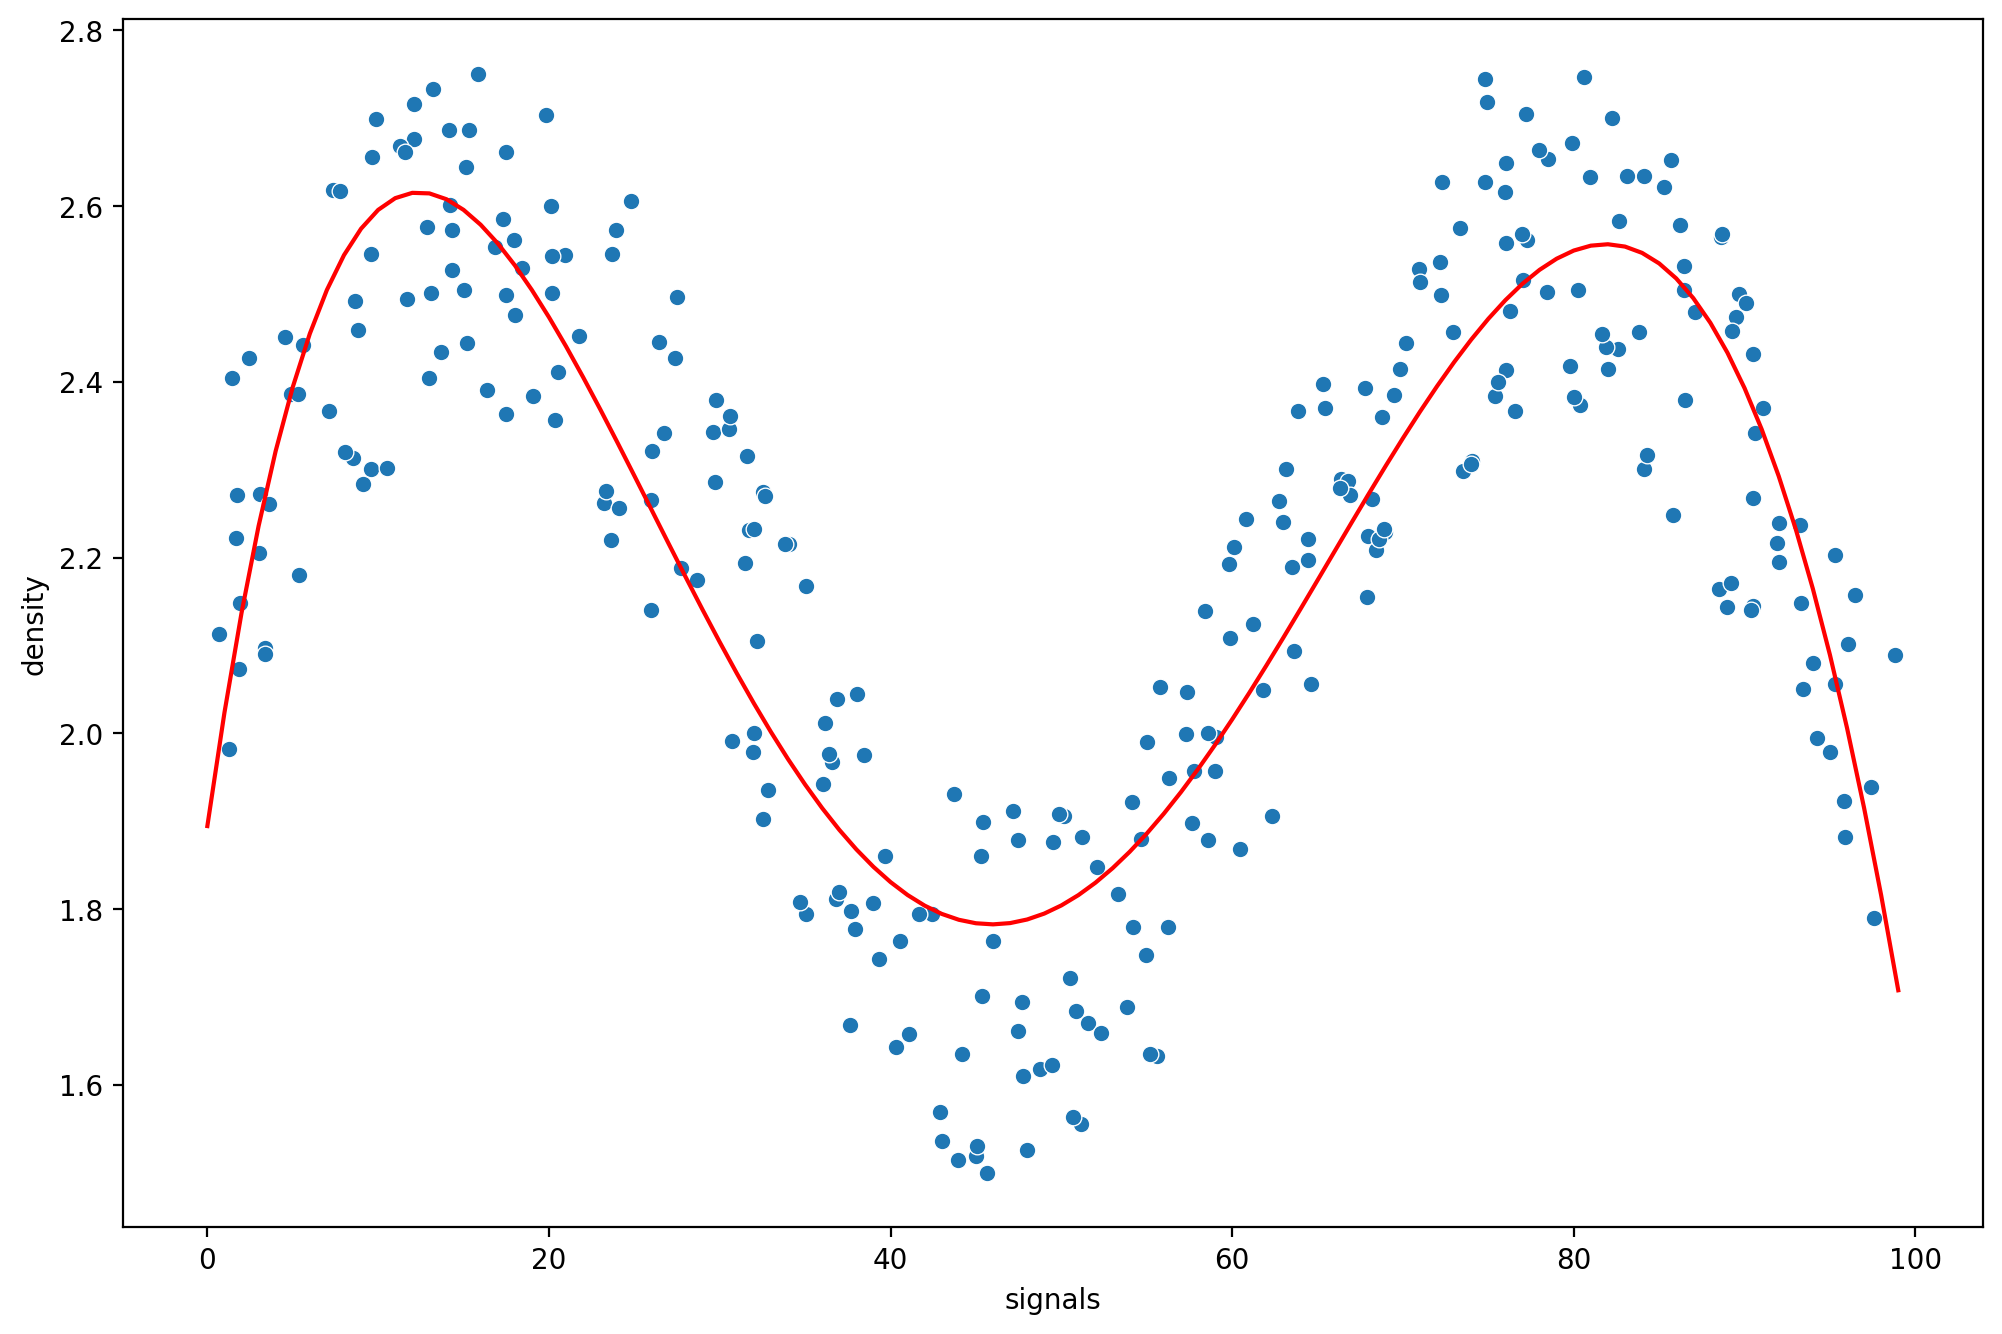

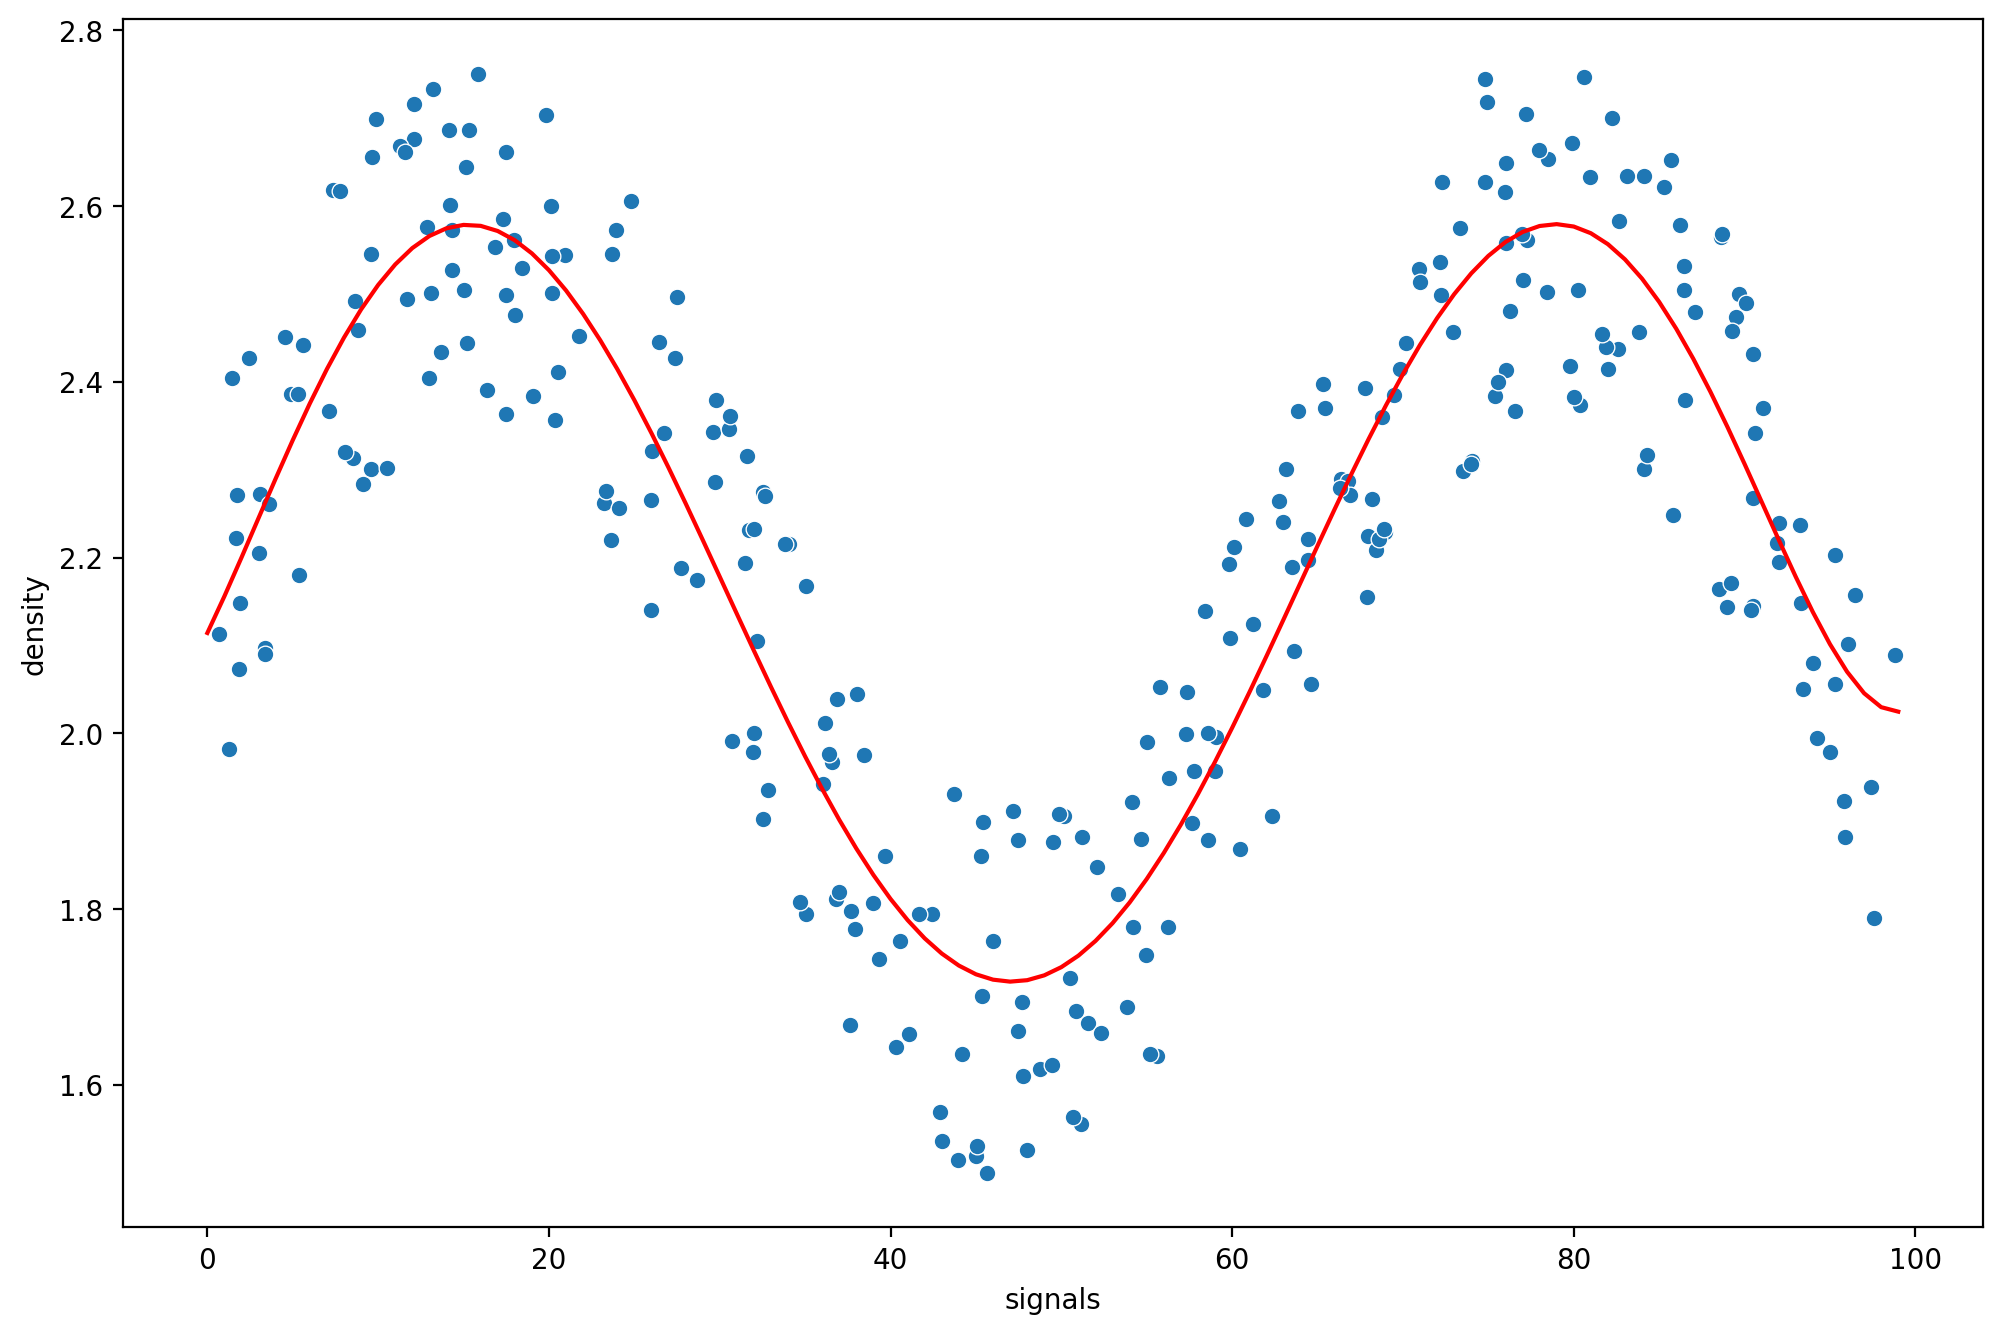

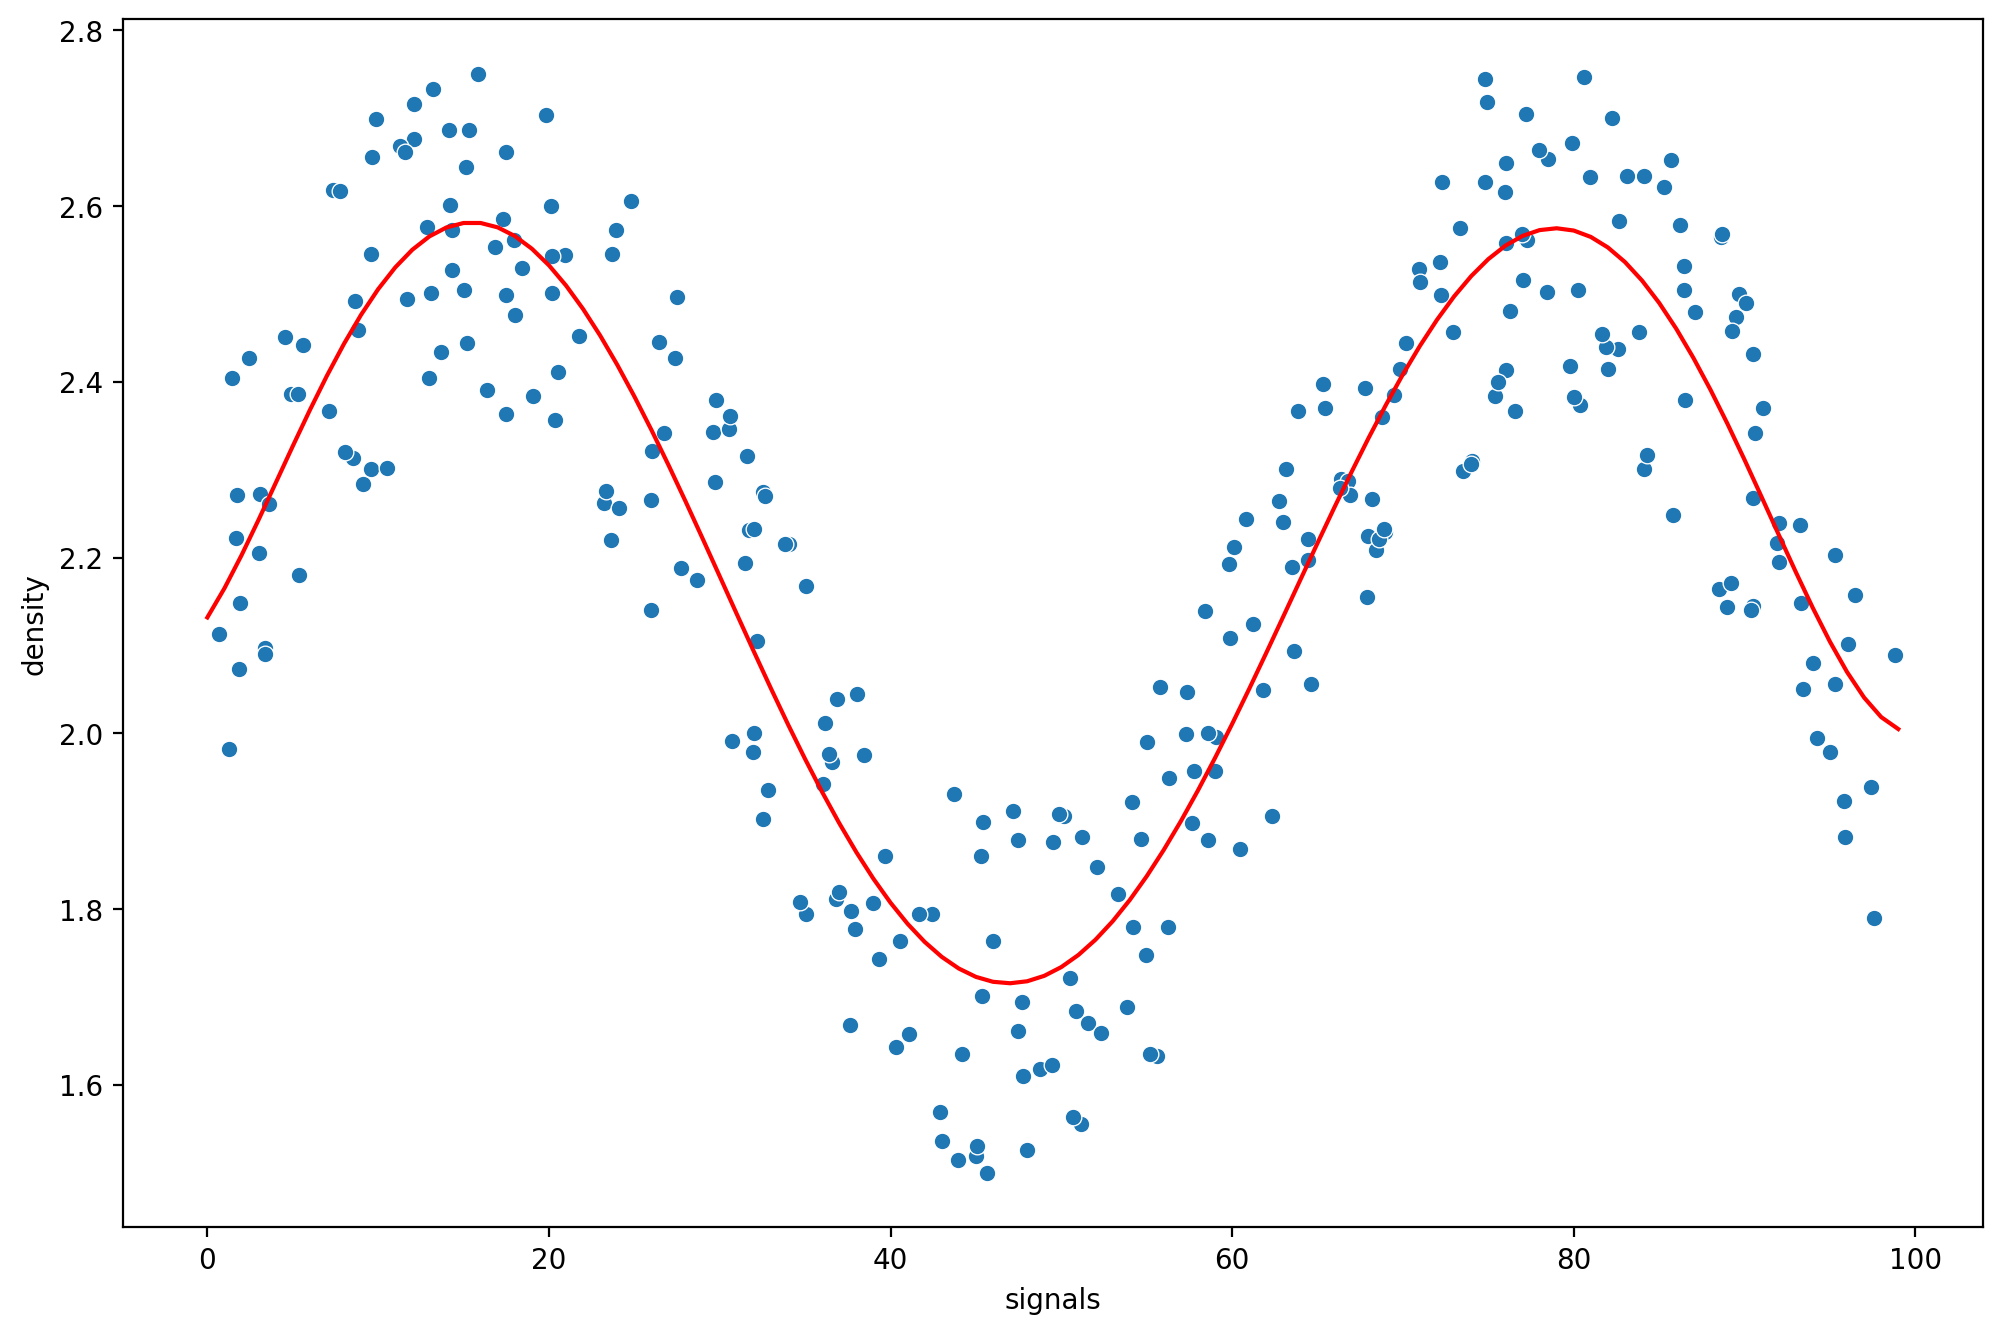

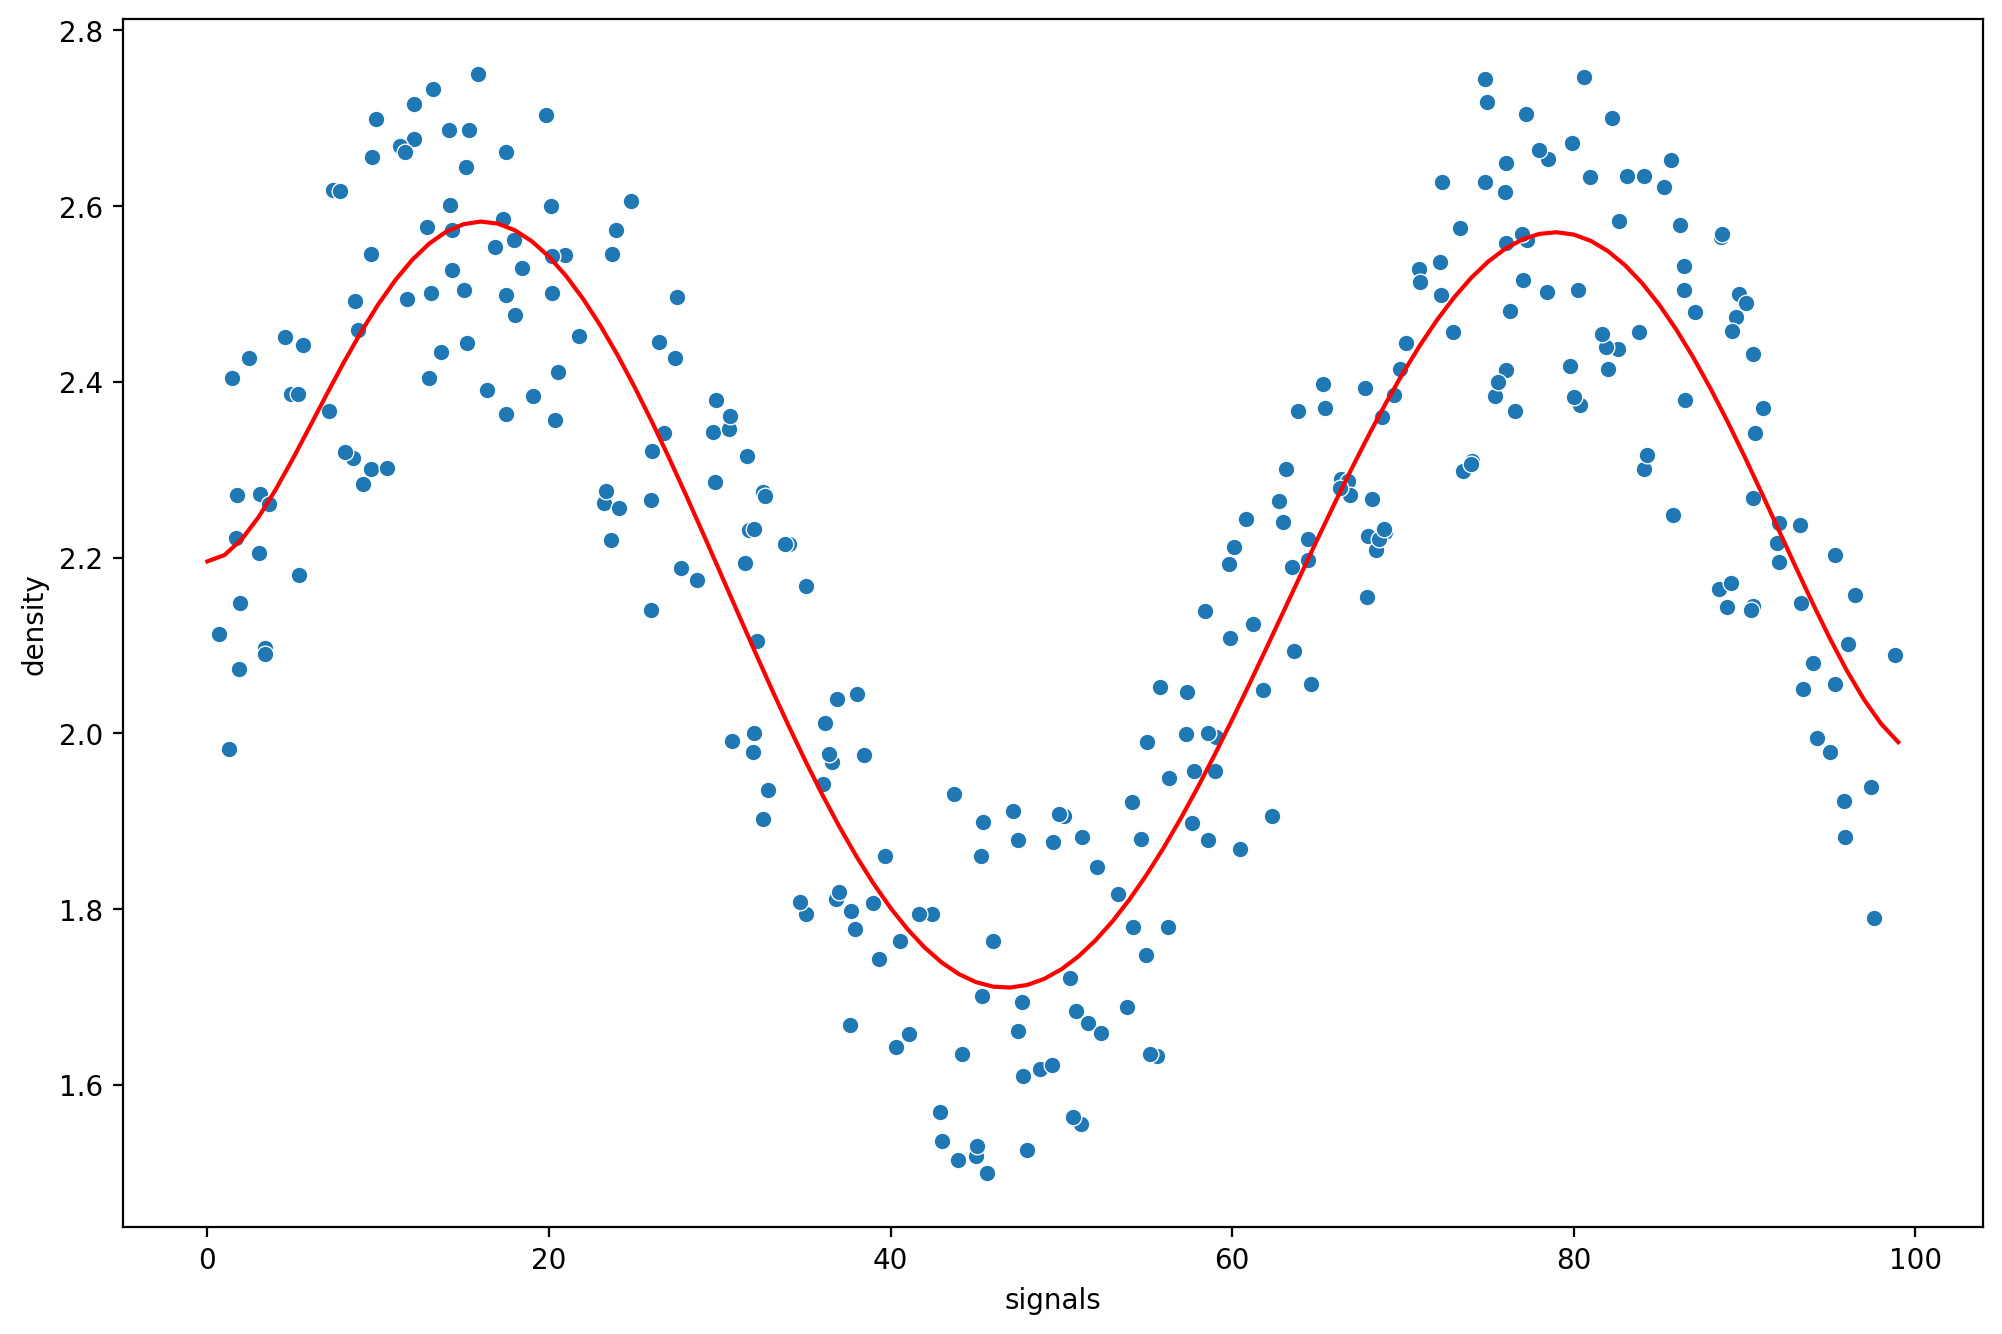

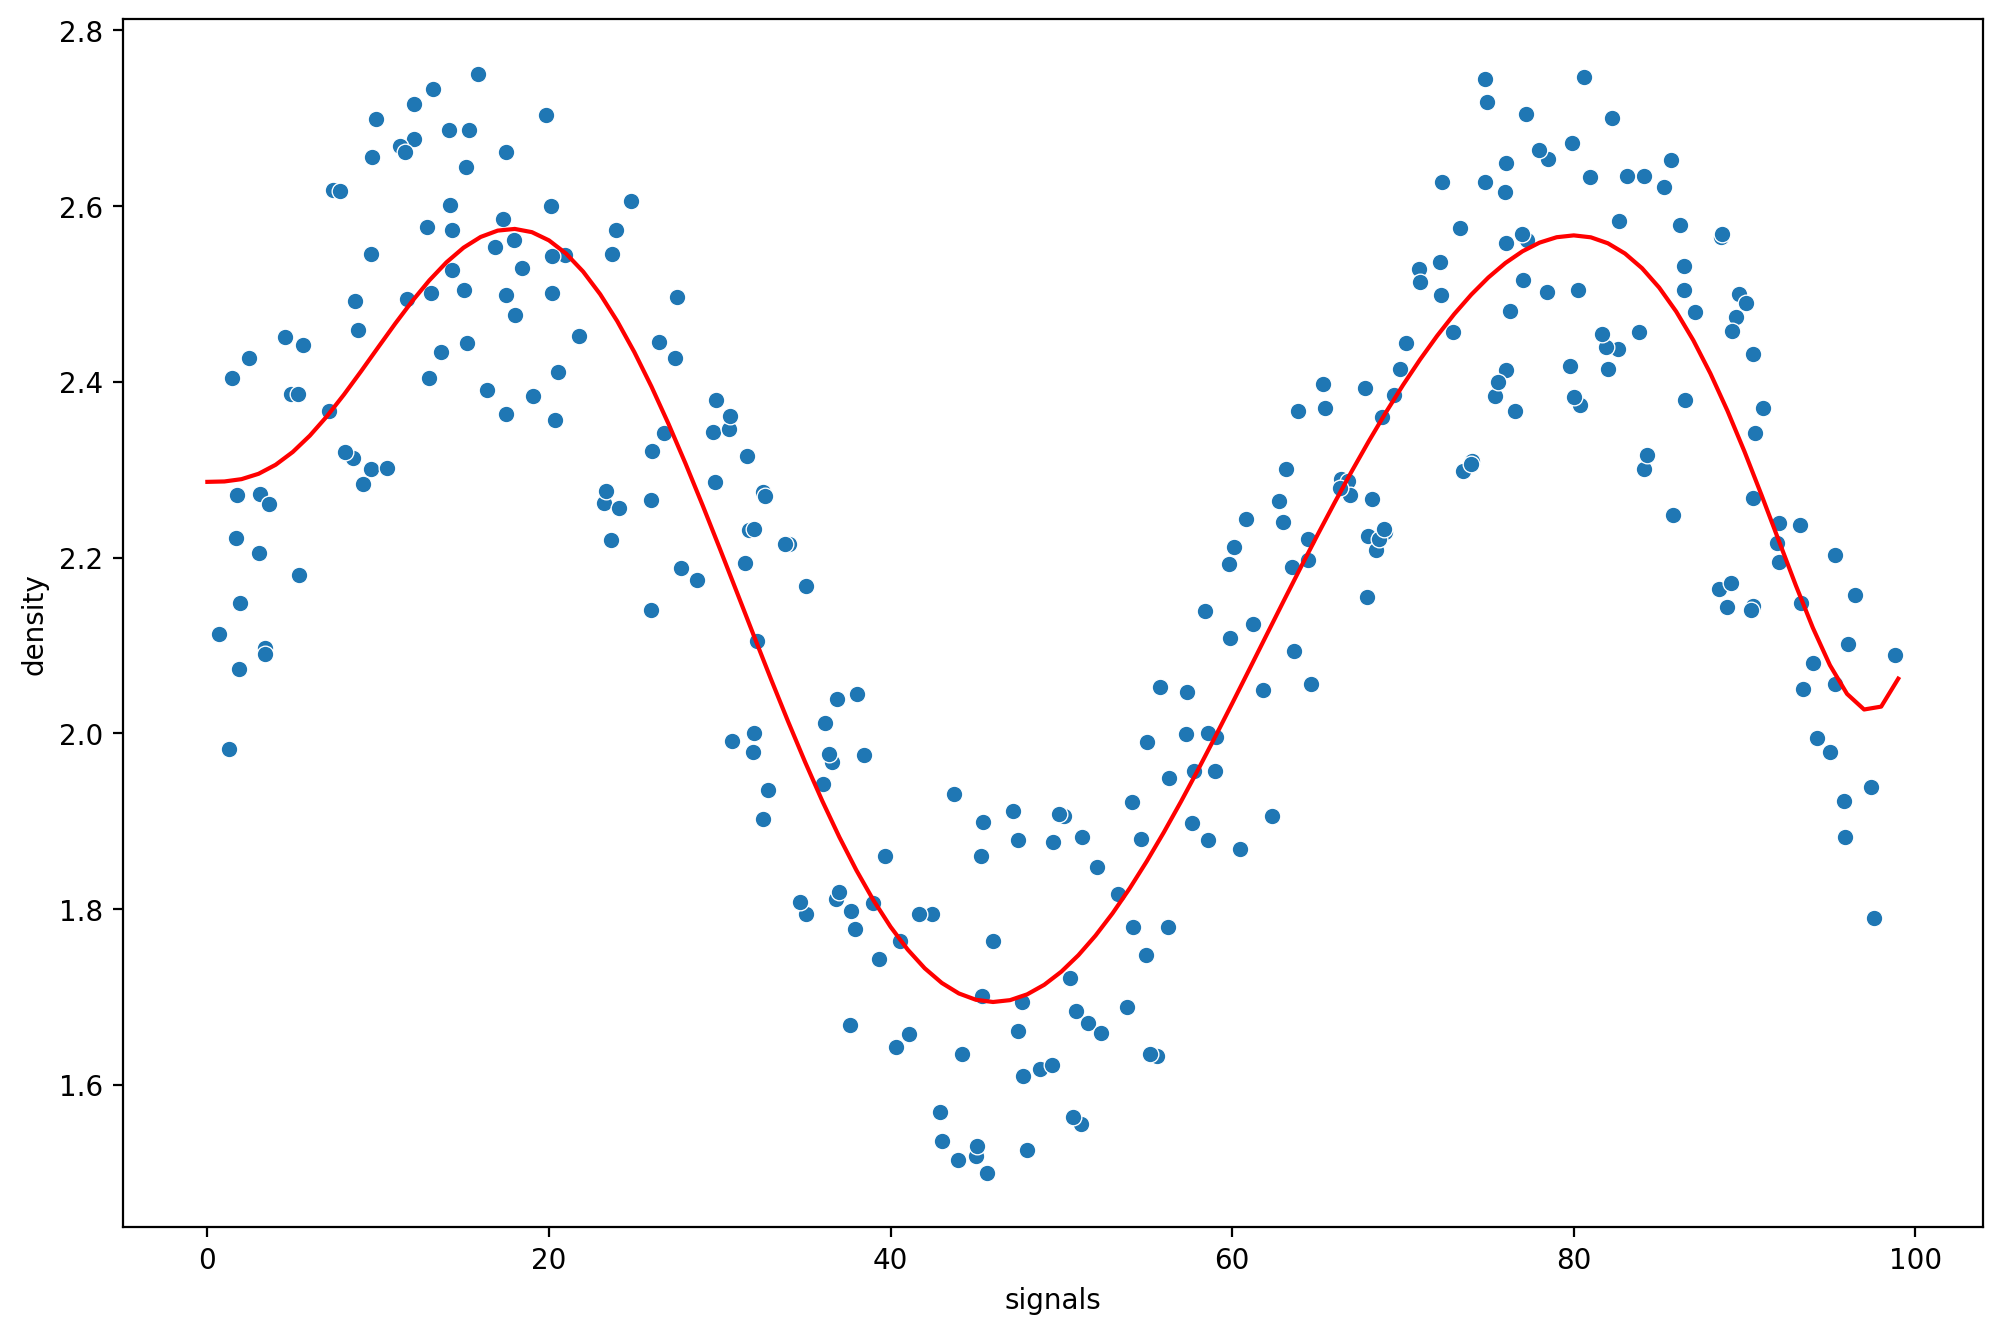

In [87]:
# Cheacking for degree 2 - 10
for d in range(2,10):
    pipe = make_pipeline(PolynomialFeatures(degree=d),LinearRegression())
    
    run_model(pipe,df)

We checked for degree 2 - 10 and degree 6 looks to good for the data

## KNN Regressor

In [89]:
# imporing model
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.2369211828242142
RMSE : 0.14472002981763873
-------------
MAE : 0.2369211828242142
RMSE : 0.14105554982439858
-------------
MAE : 0.2369211828242142
RMSE : 0.14068386928683893
-------------
MAE : 0.2369211828242142
RMSE : 0.1400166117231861
-------------
MAE : 0.2369211828242142
RMSE : 0.13875028455158084
-------------
MAE : 0.2369211828242142
RMSE : 0.14241802817457844
-------------
MAE : 0.2369211828242142
RMSE : 0.13878141365701324
-------------
MAE : 0.2369211828242142
RMSE : 0.13913570547842963
-------------


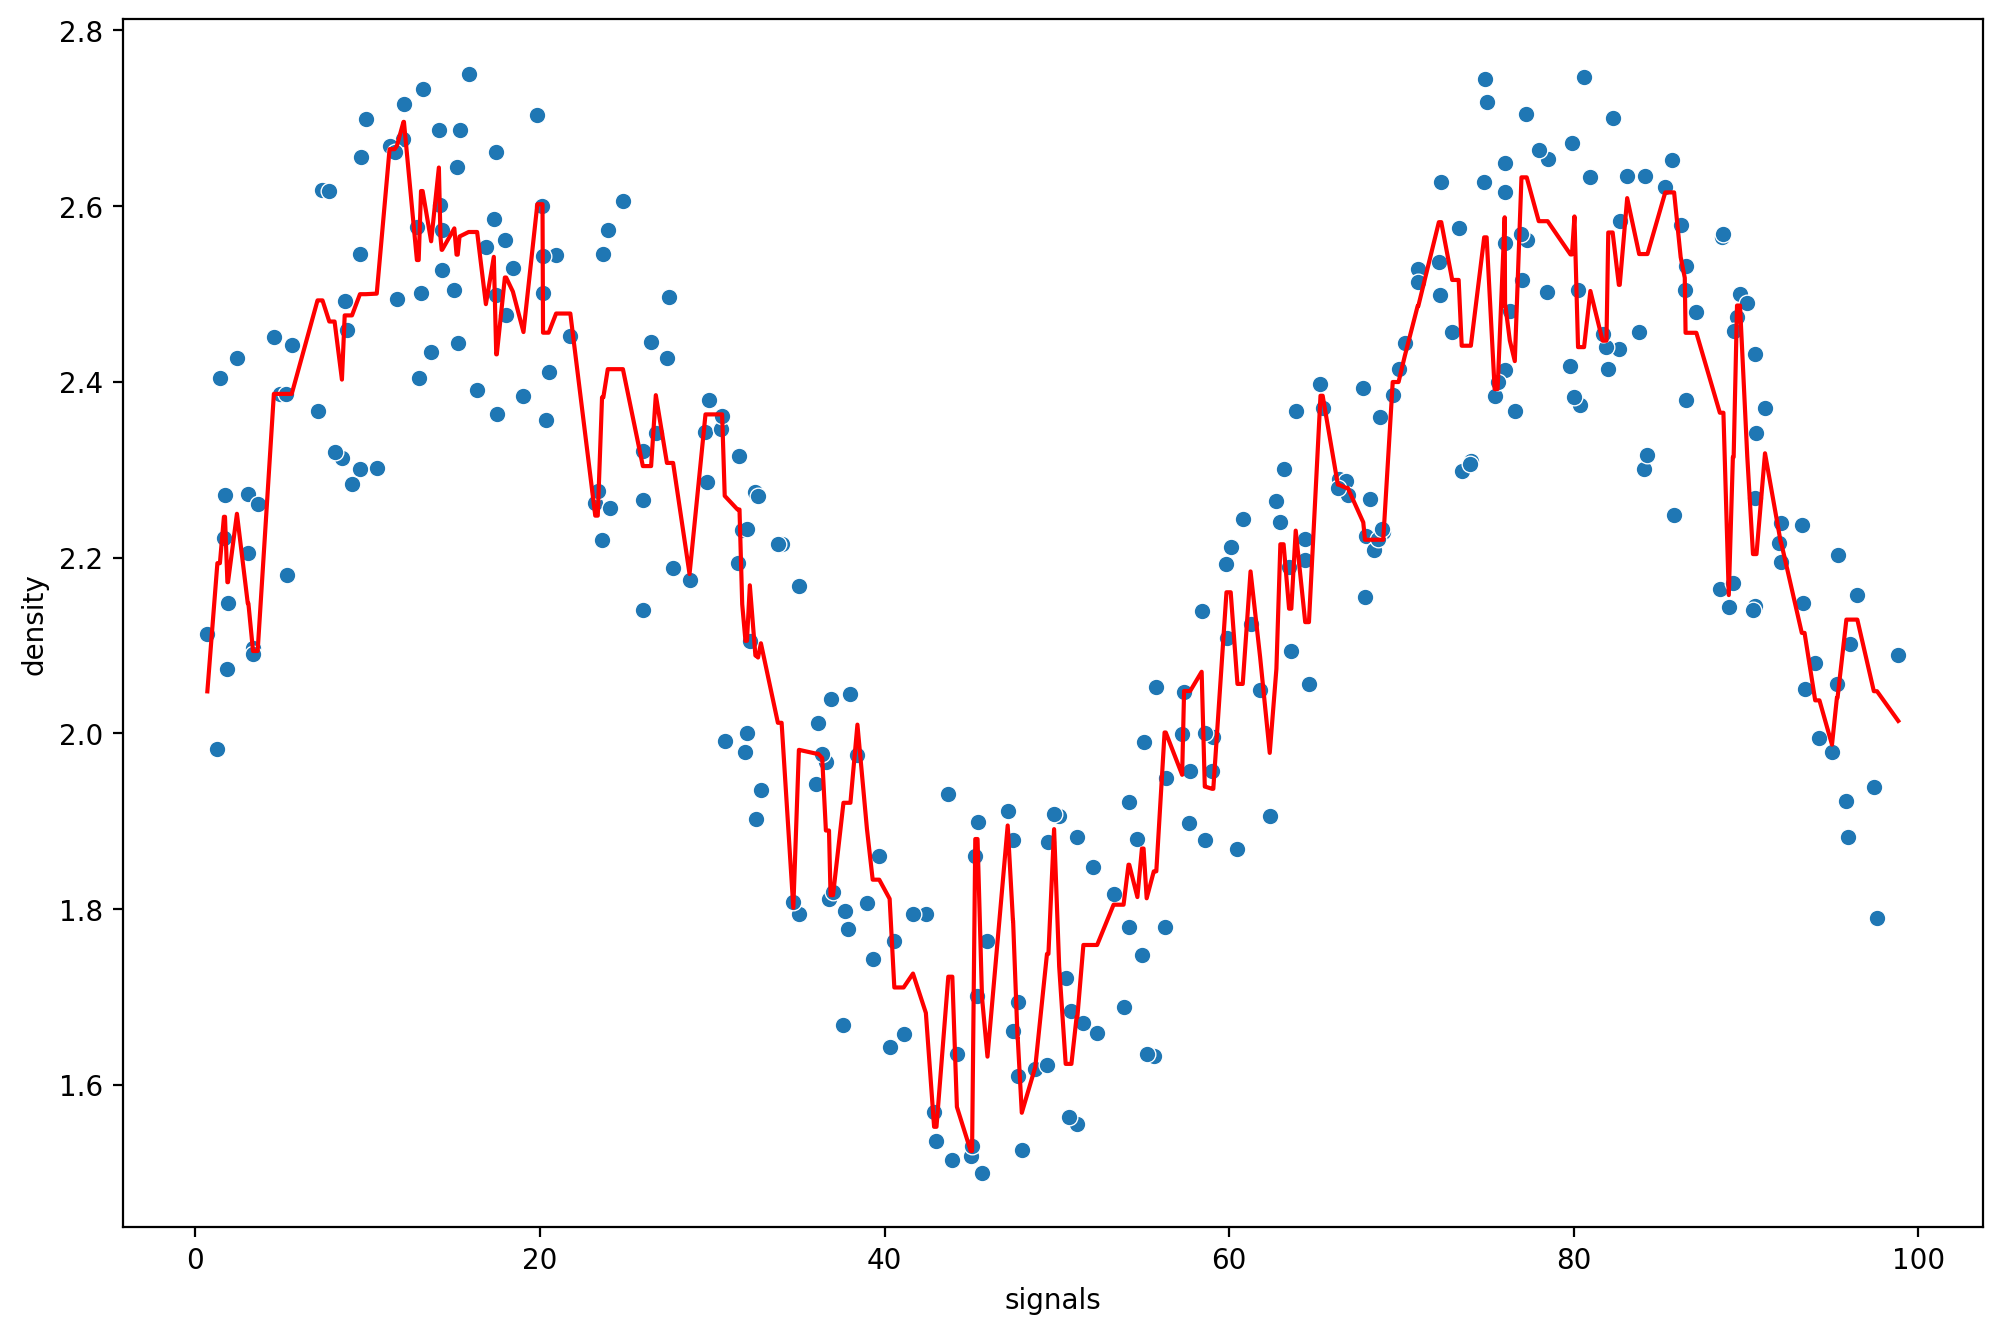

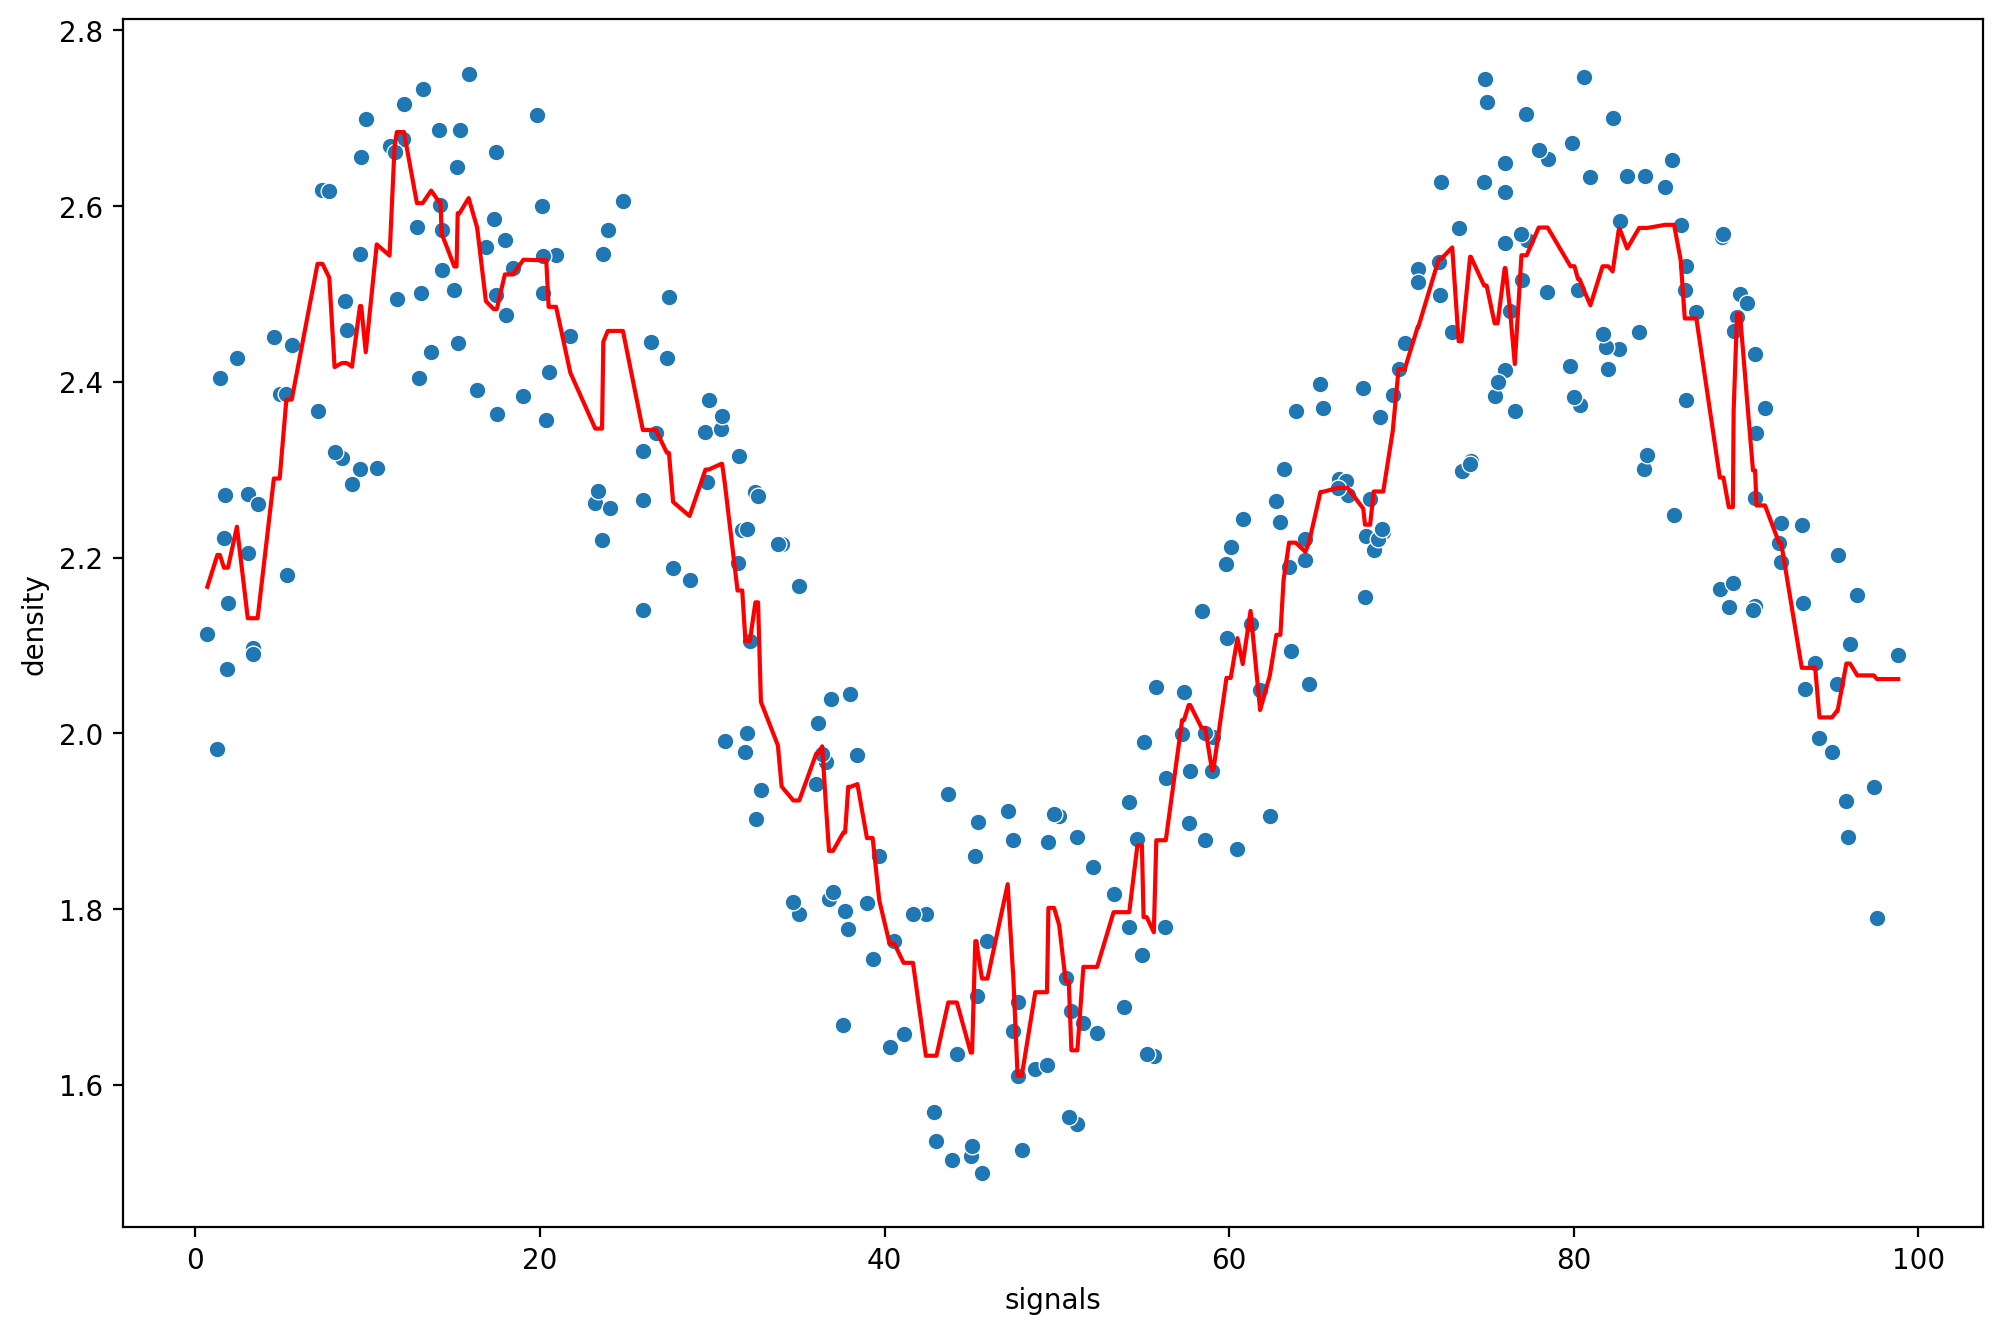

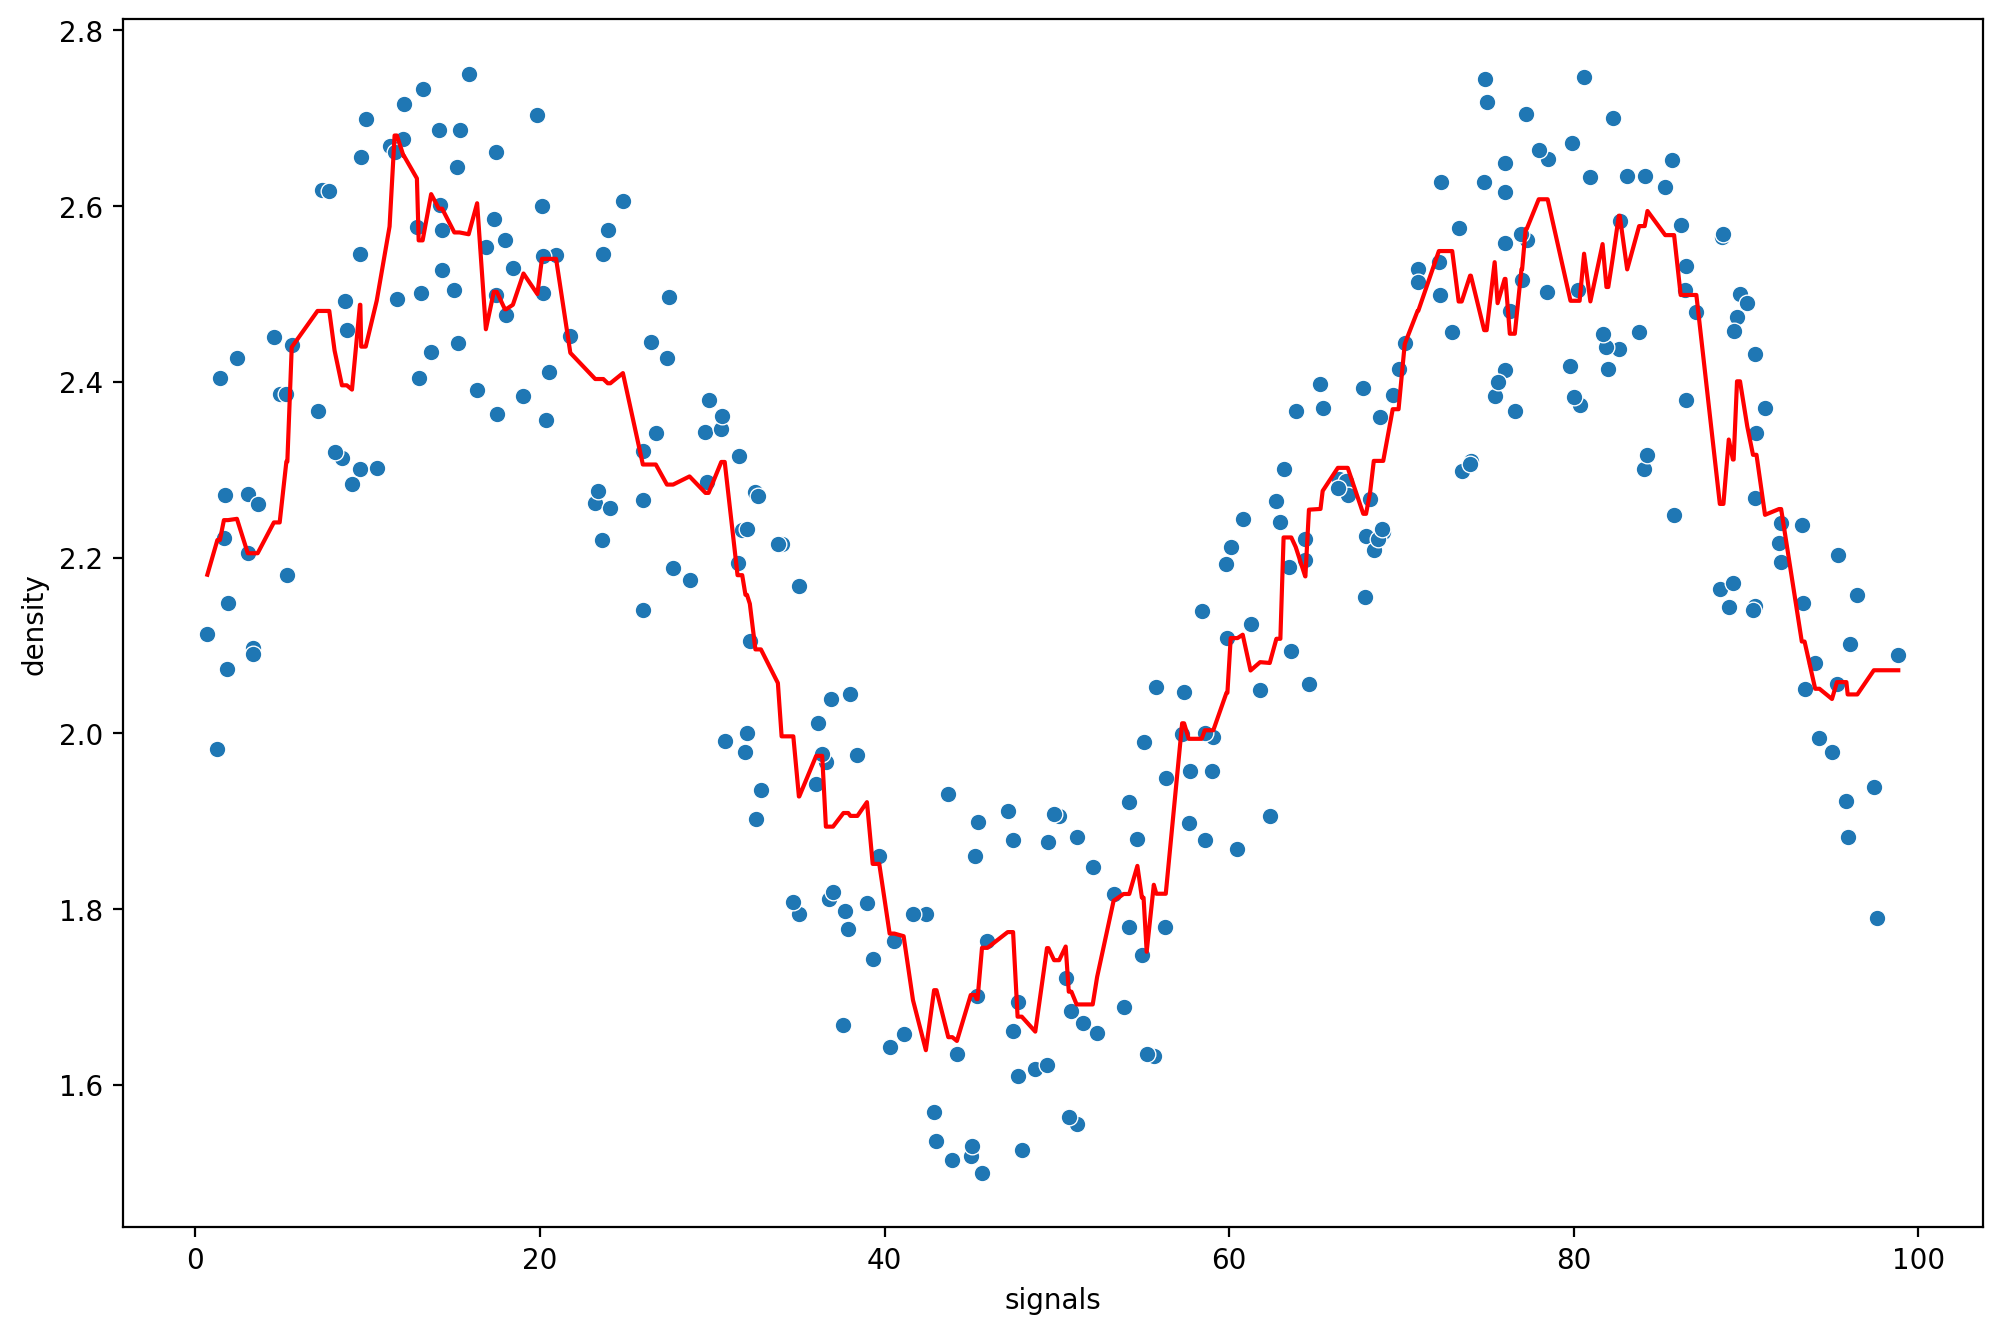

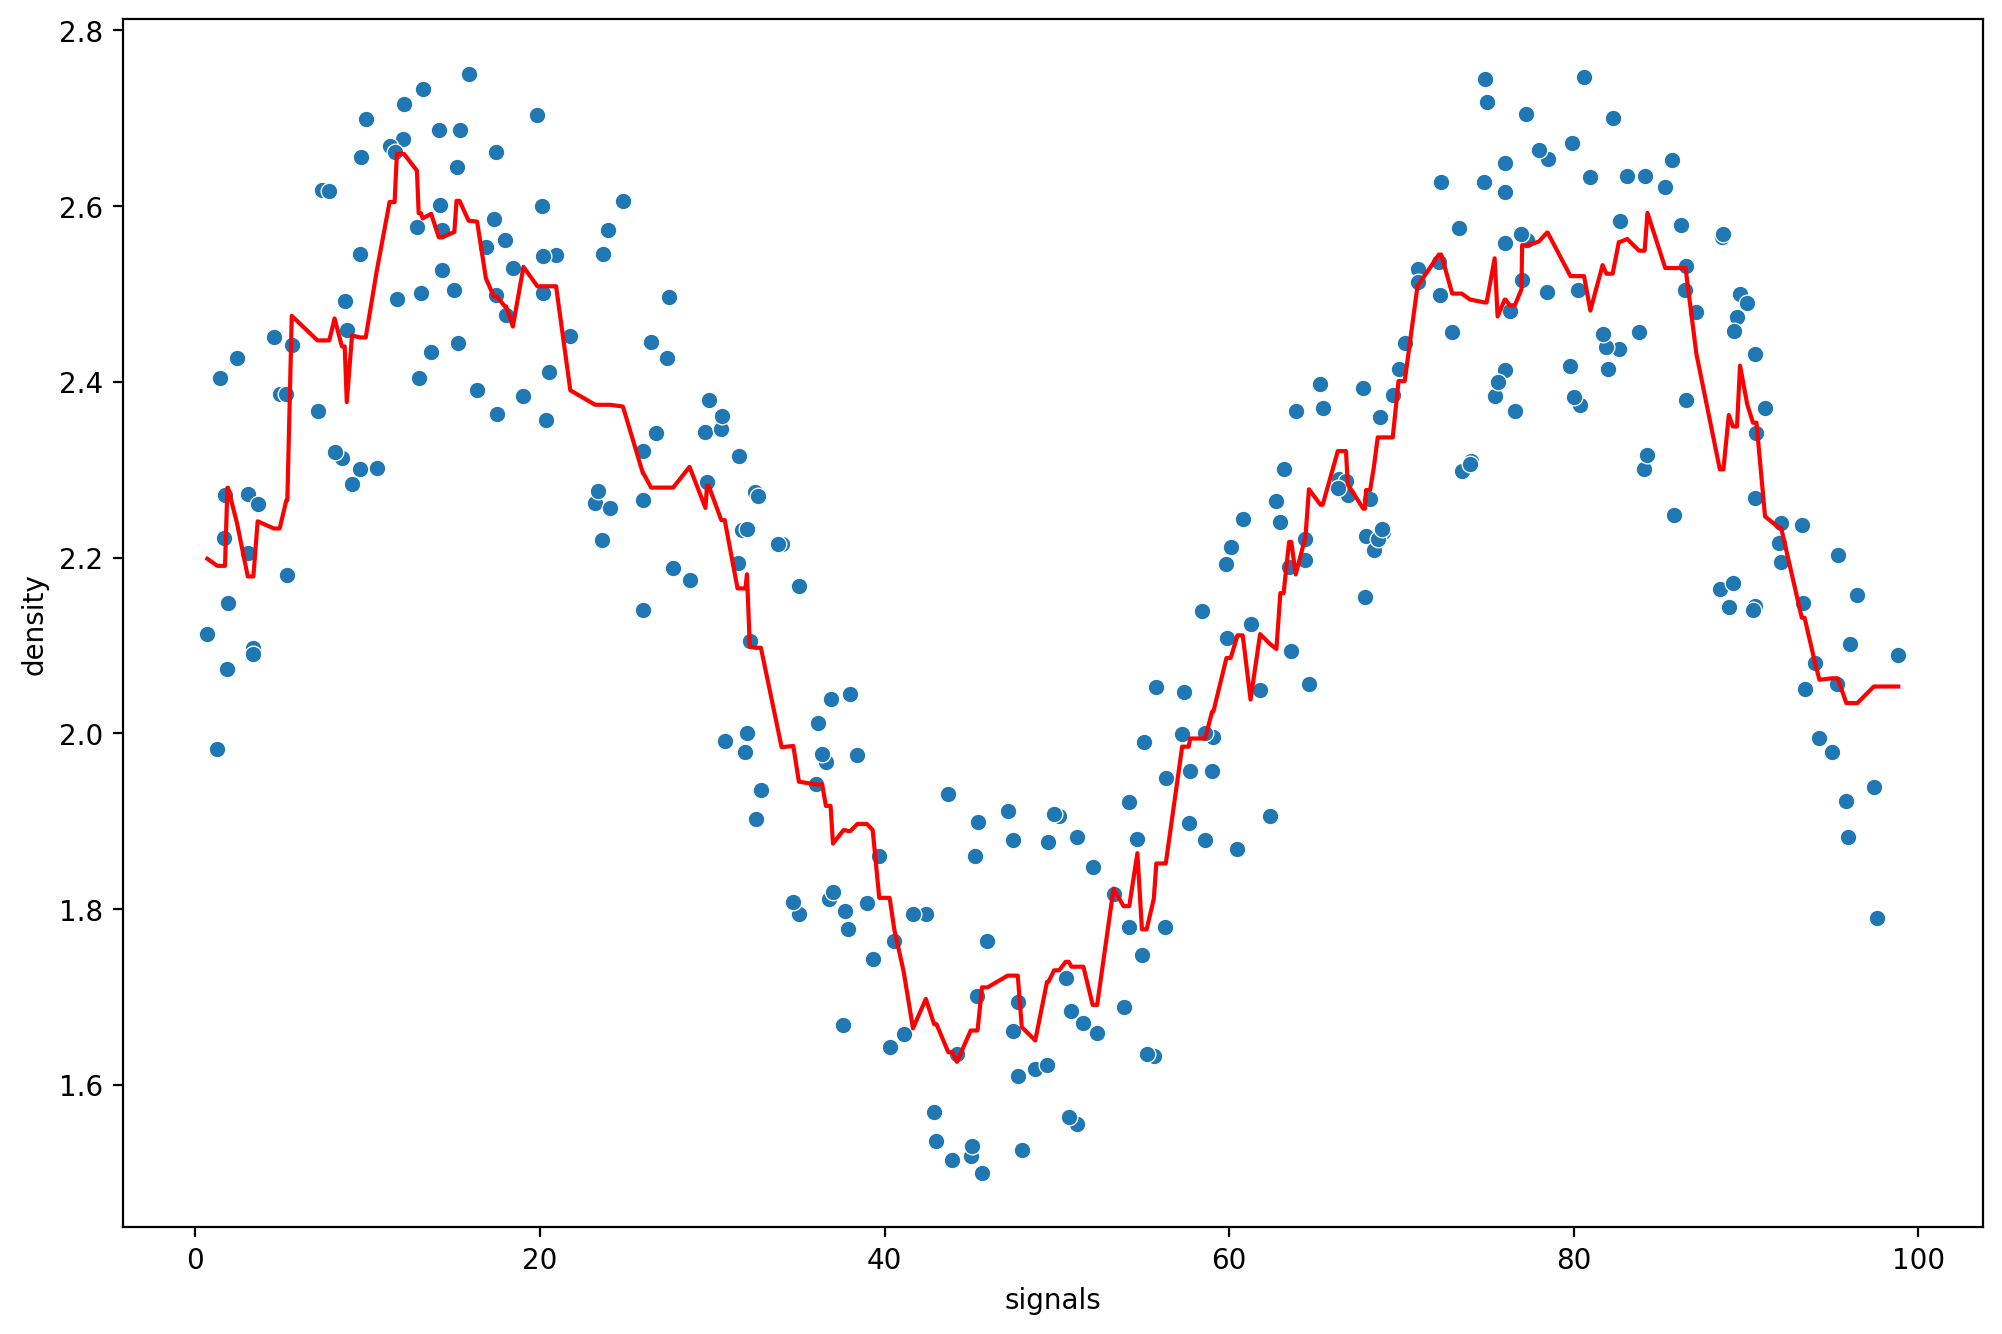

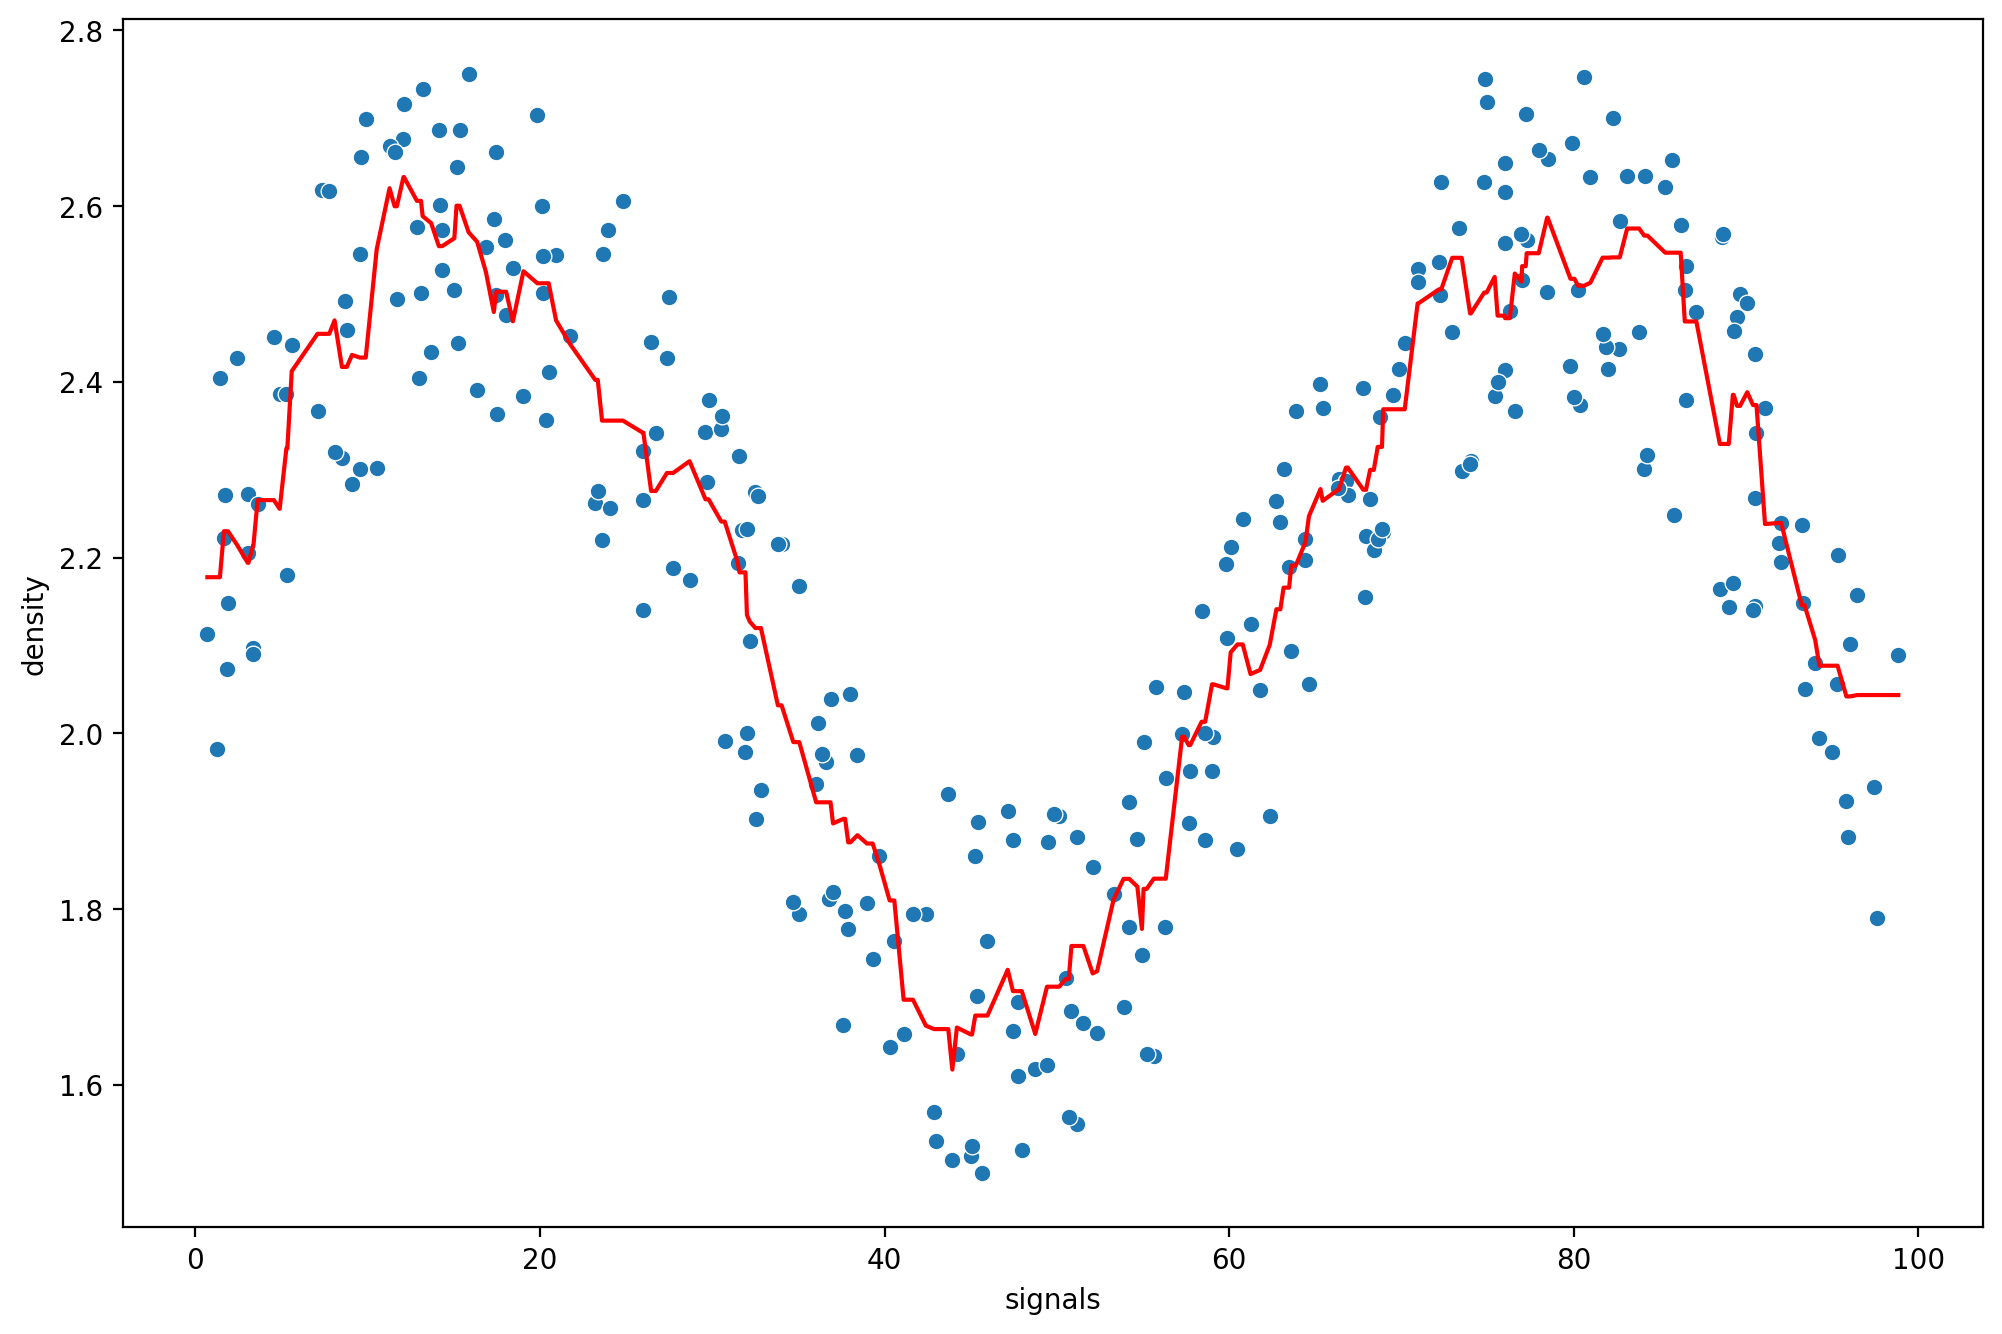

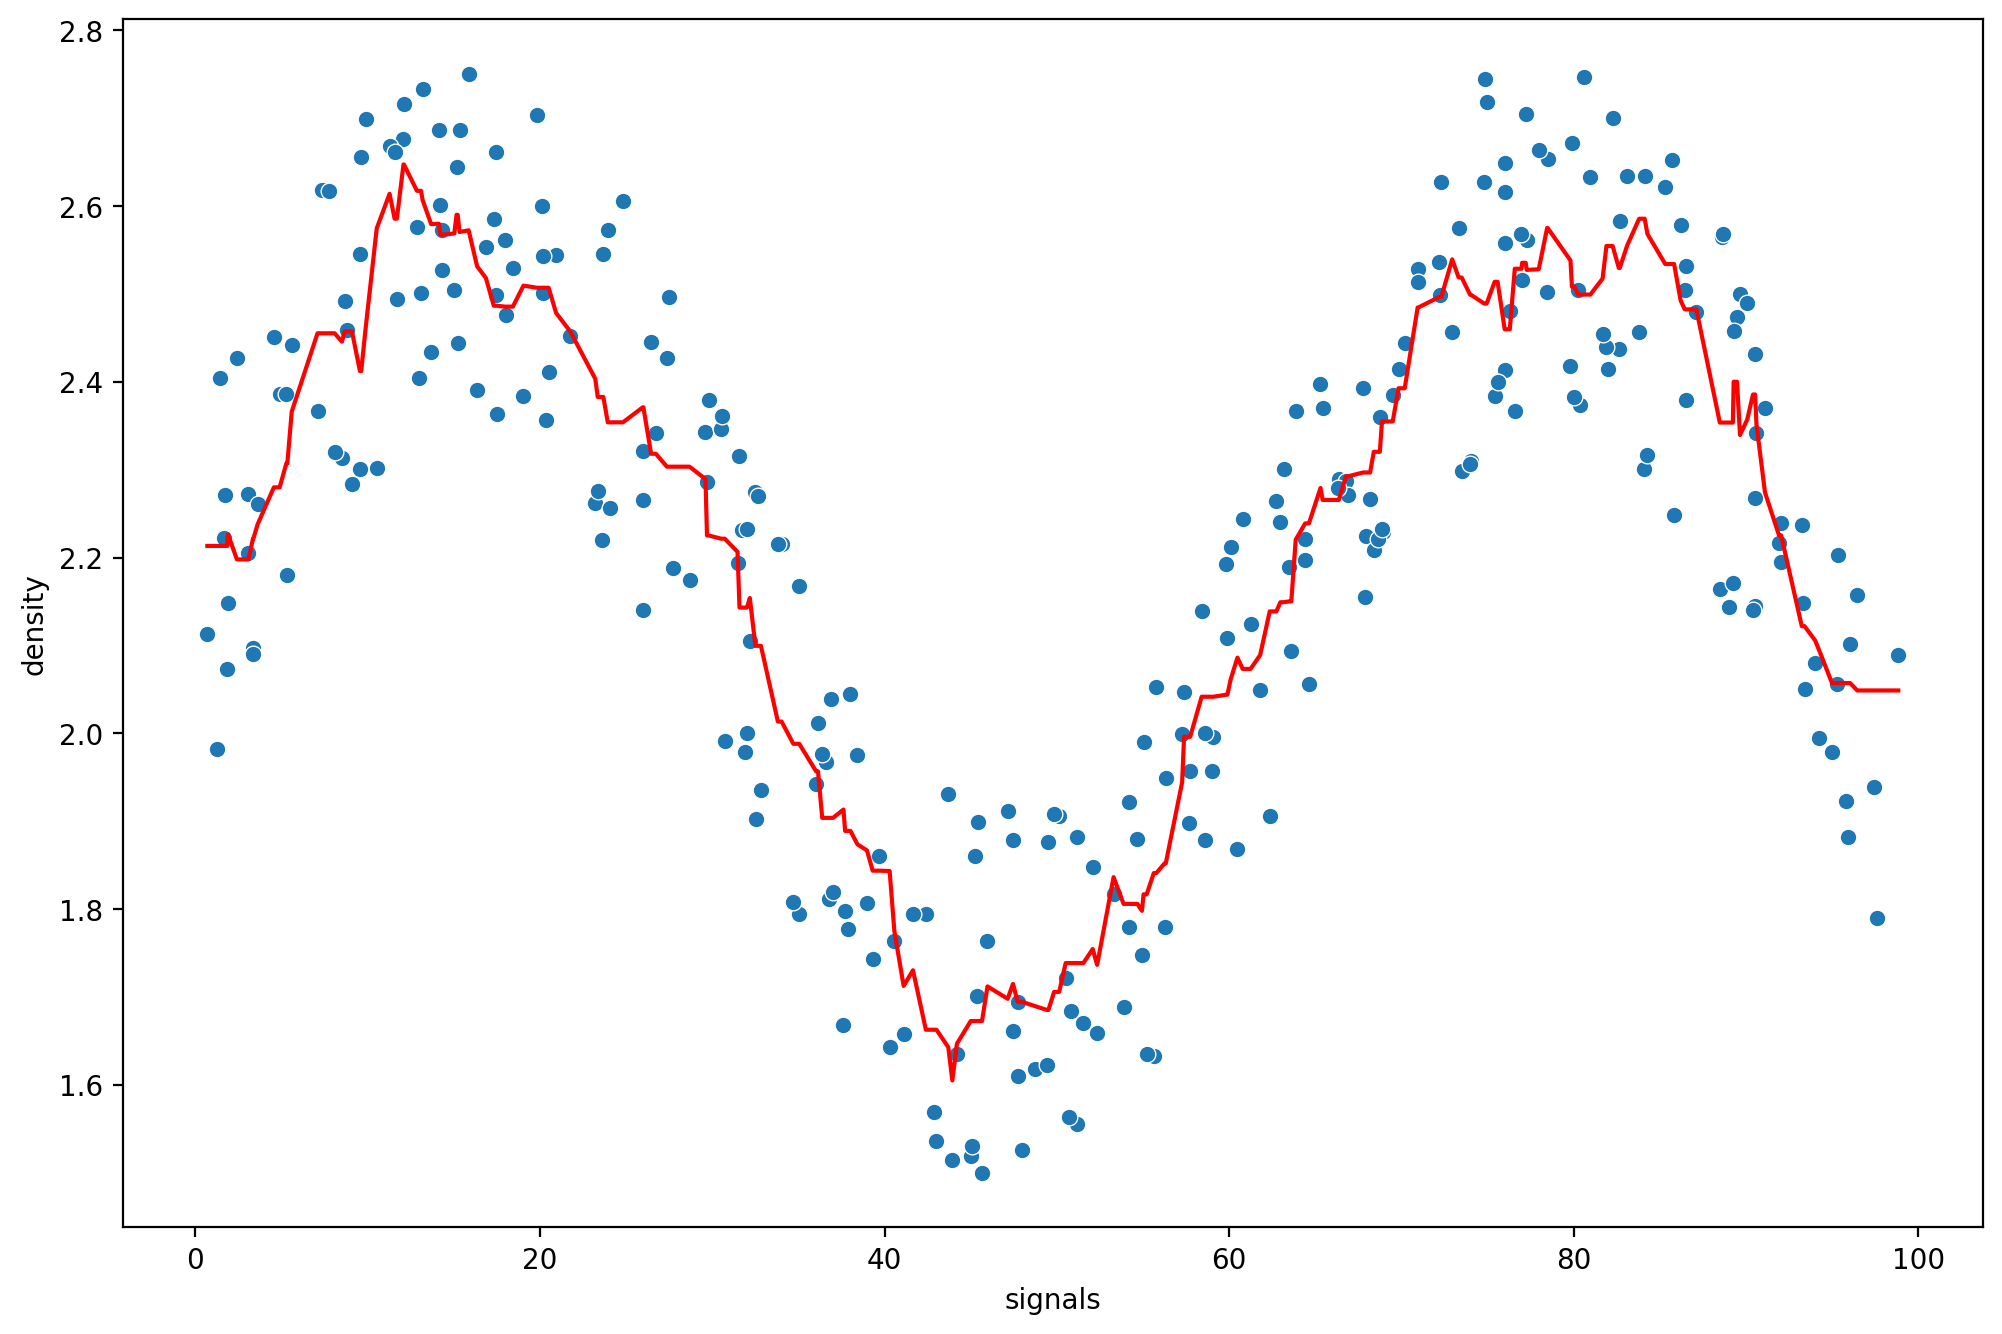

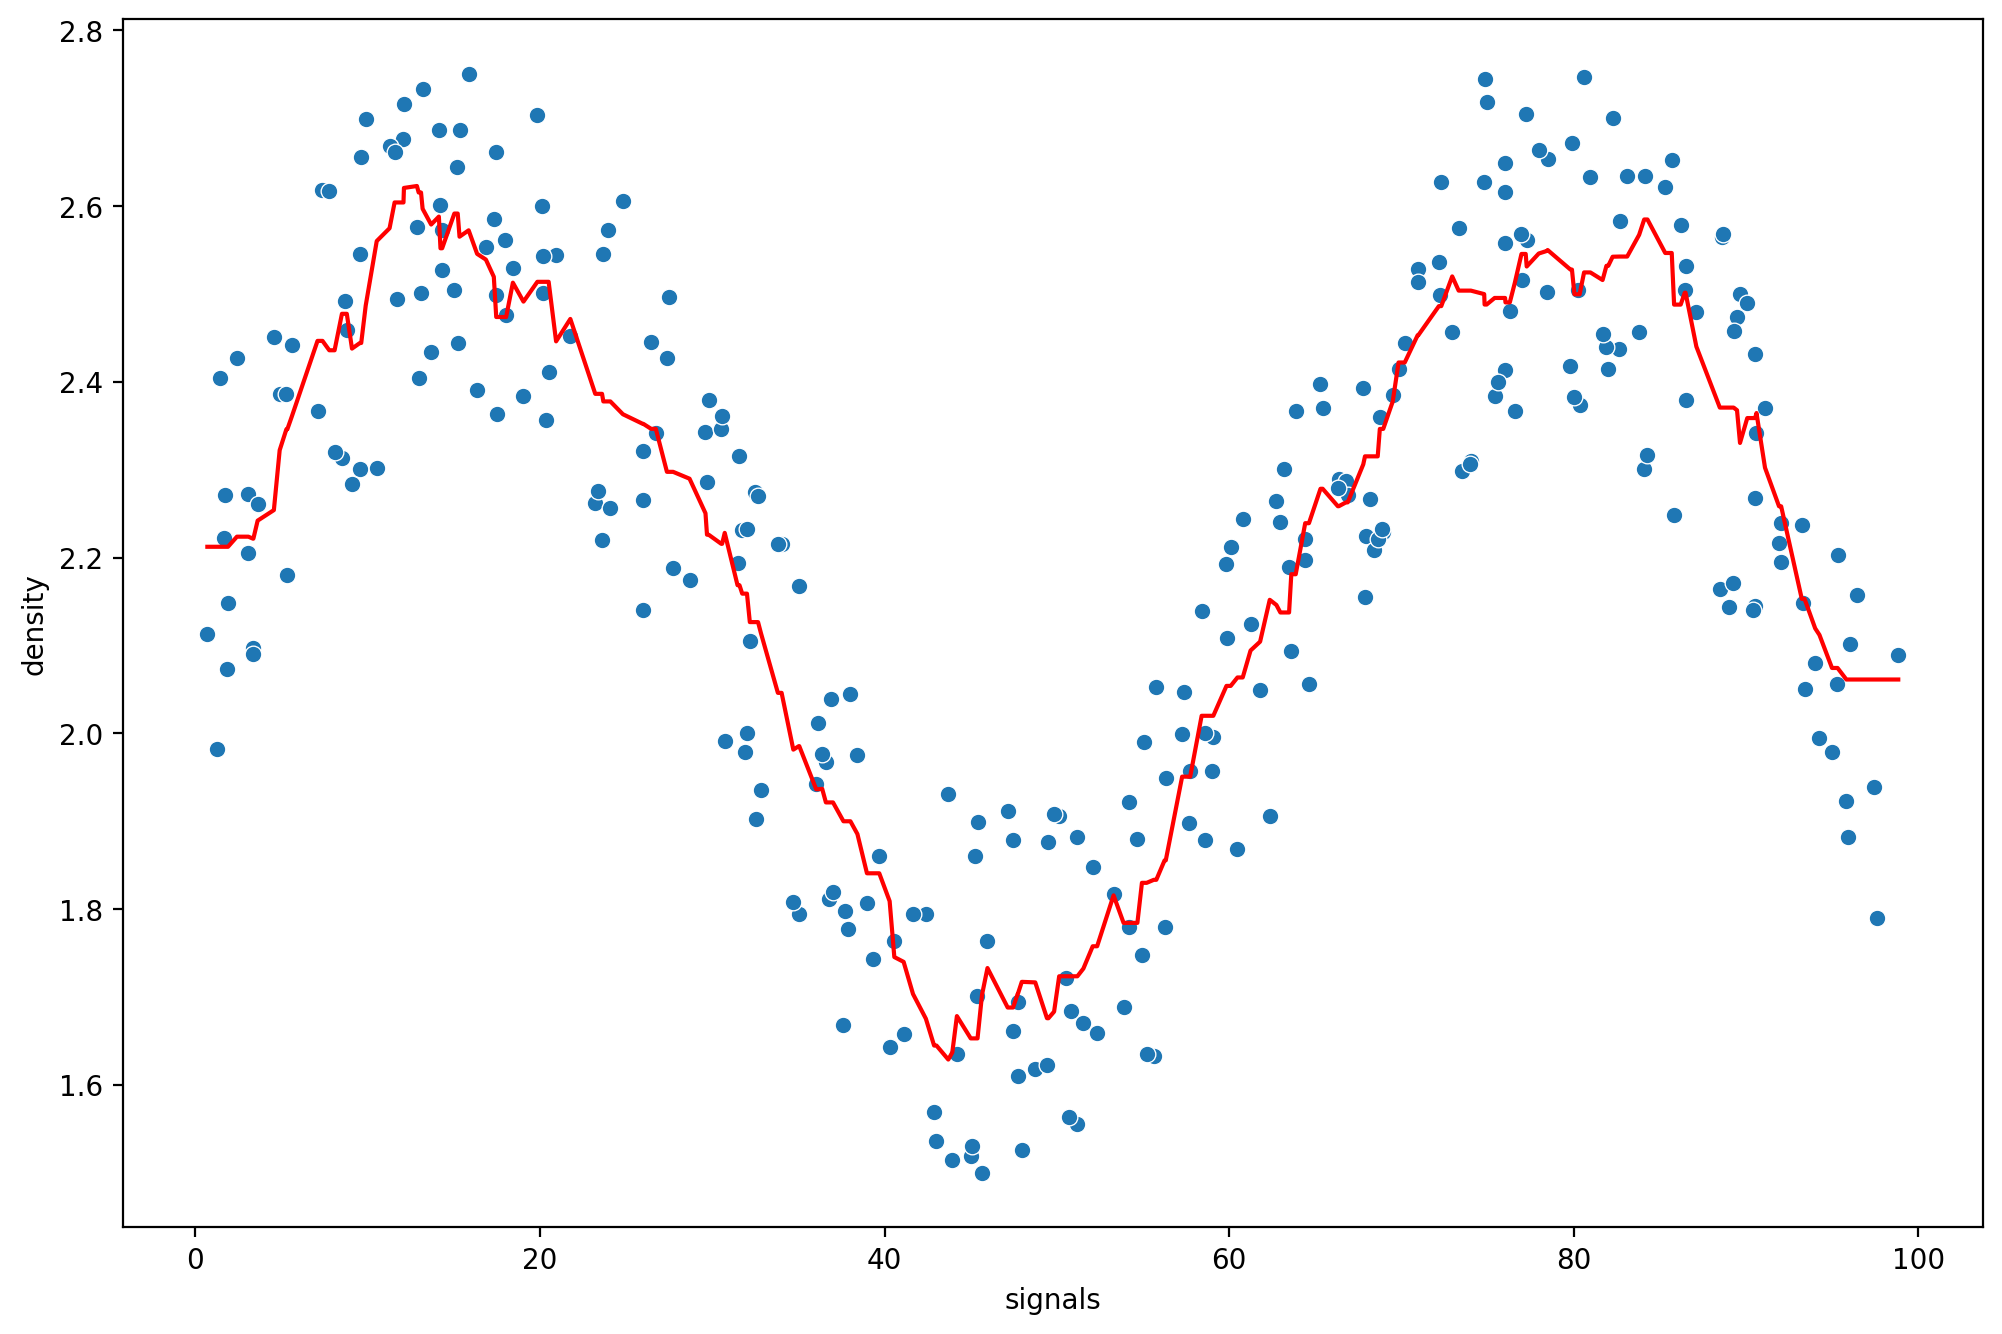

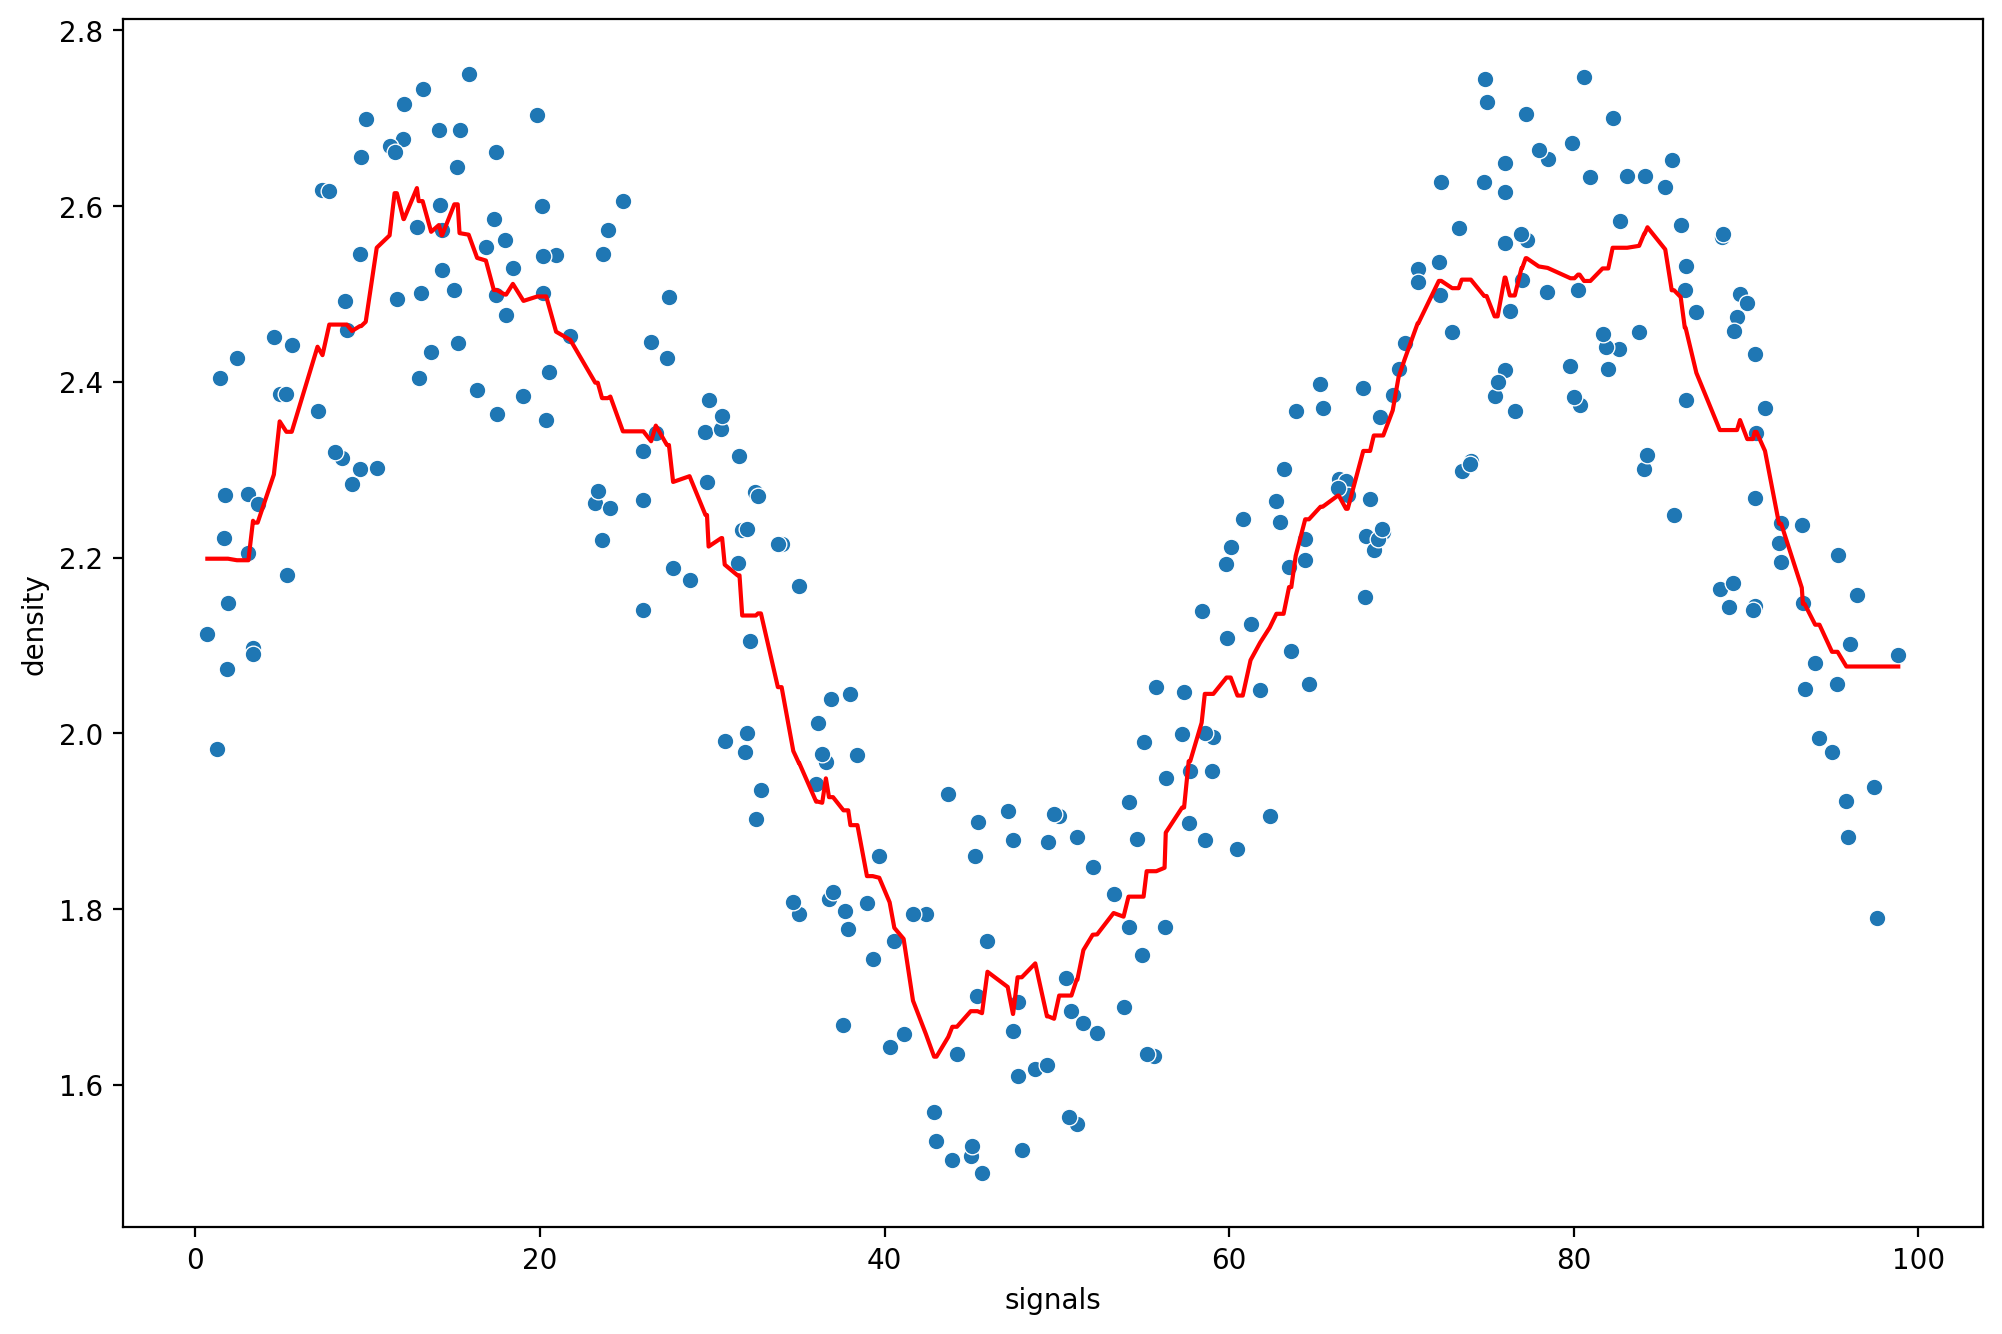

In [114]:
for k in range(2,10):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    run_model(knn_model,df)

As the value of k increasing the model picks less bais

## Support vector Regression

In [92]:
# importing model
from sklearn.svm import SVR
# for best svm we always need to do grid search to find best parameters
from sklearn.model_selection import GridSearchCV # For grid search of hyperparametes

In [98]:
param_grid = {"C": [0.001,0.01,.1,1,10,30,50,100,300,500], 'gamma':["auto","scale"]}
svr = SVR()

In [99]:
grid_model = GridSearchCV(estimator=svr,param_grid=param_grid)

MAE : 0.2369211828242142
RMSE : 0.13038031206444592
-------------


{'C': 500, 'gamma': 'scale'}

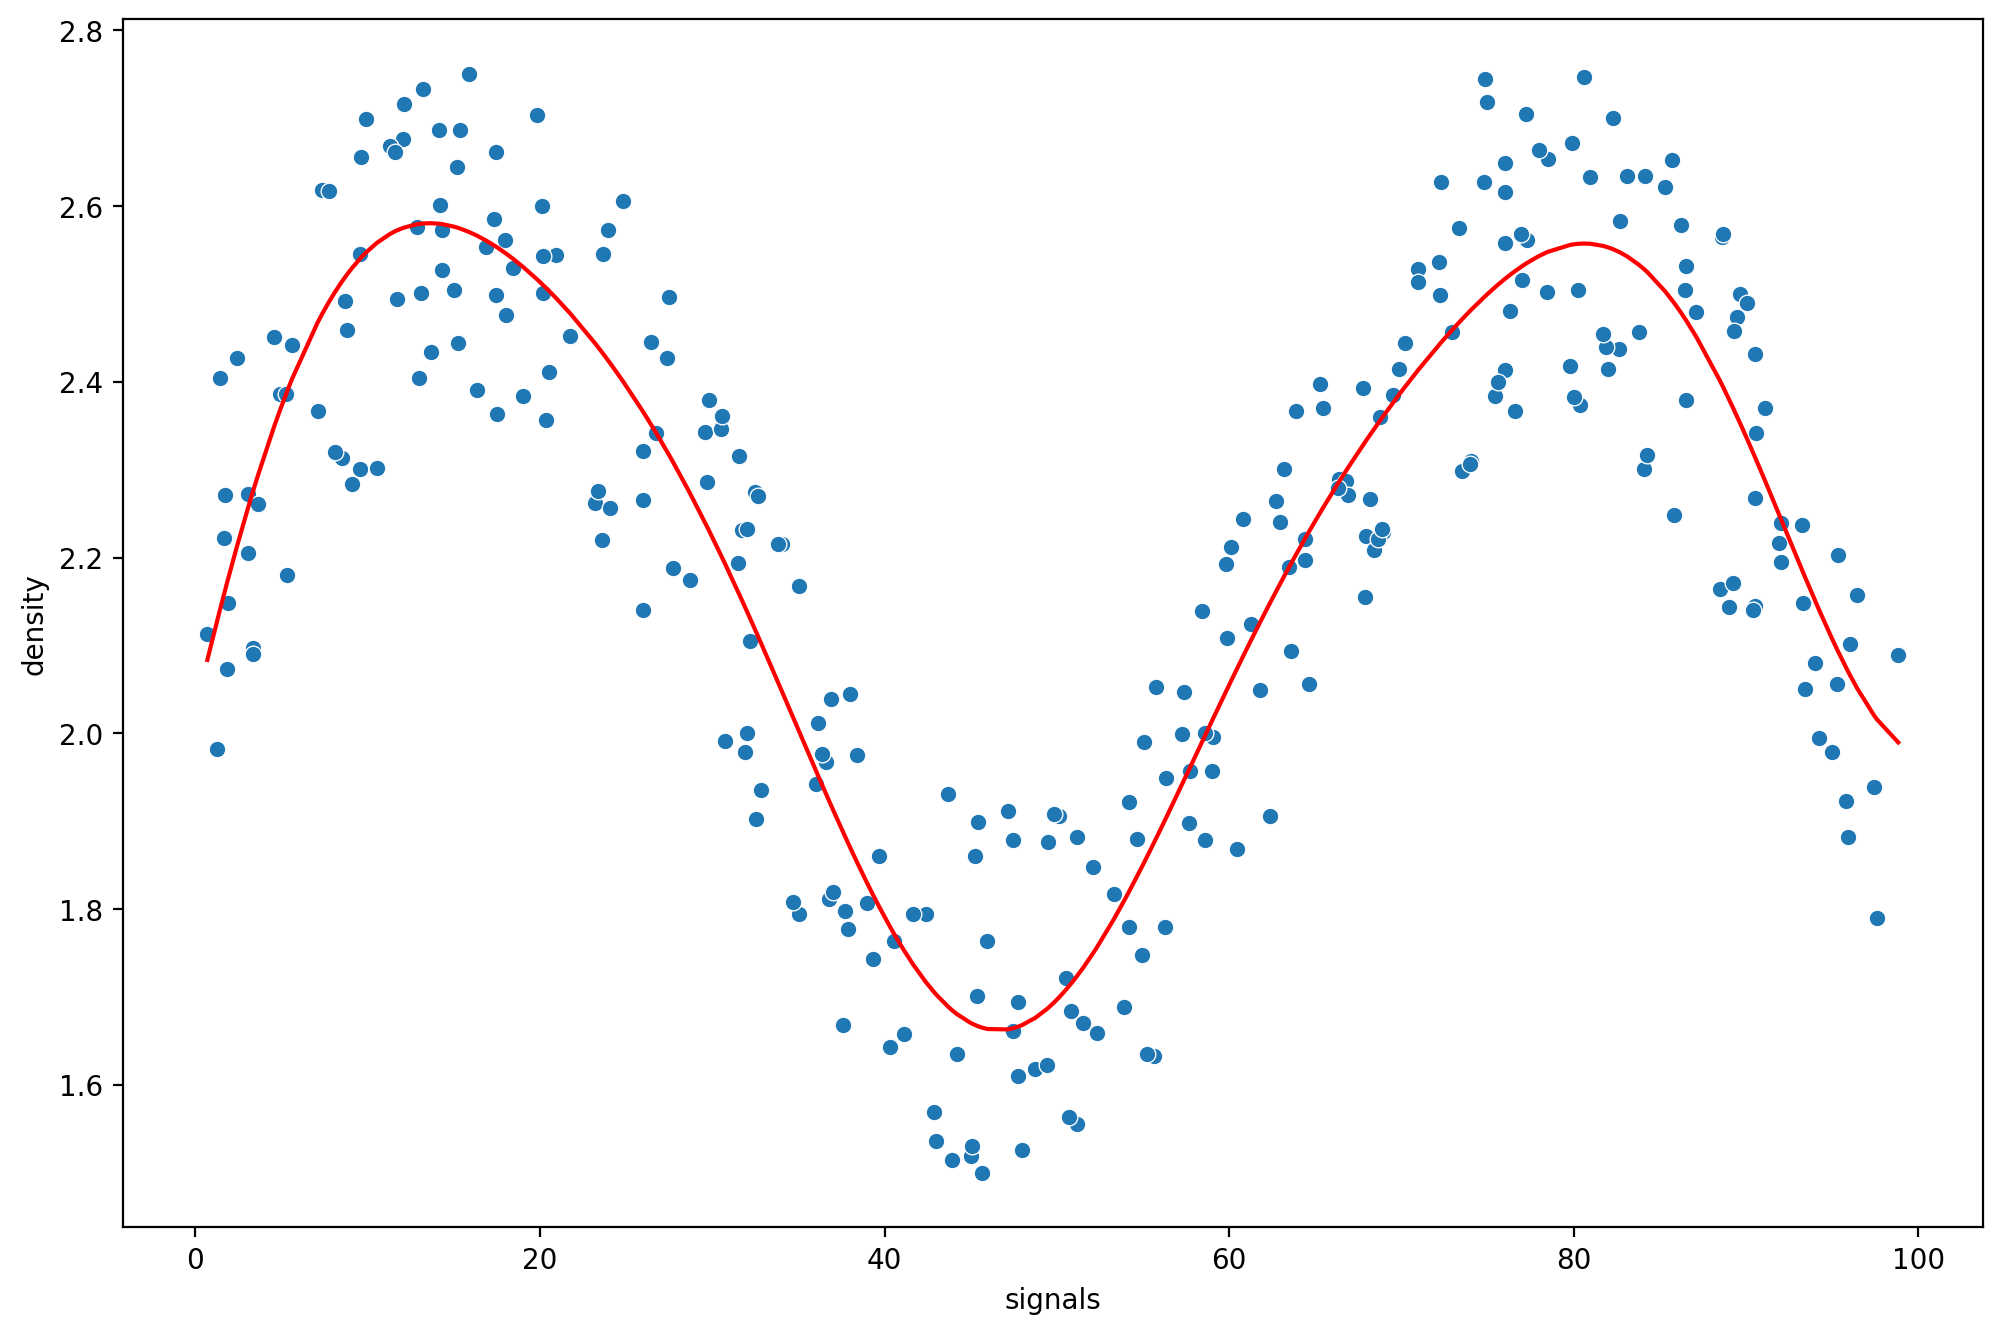

In [115]:
run_model(grid_model,df)
grid_model.best_params_

## Decision Tree

In [101]:
# importing model
from sklearn.tree import DecisionTreeRegressor

In [102]:
tree_model = DecisionTreeRegressor() # As there is only one feature in the data lets leave the parametes default

MAE : 0.2369211828242142
RMSE : 0.16153547162673088
-------------


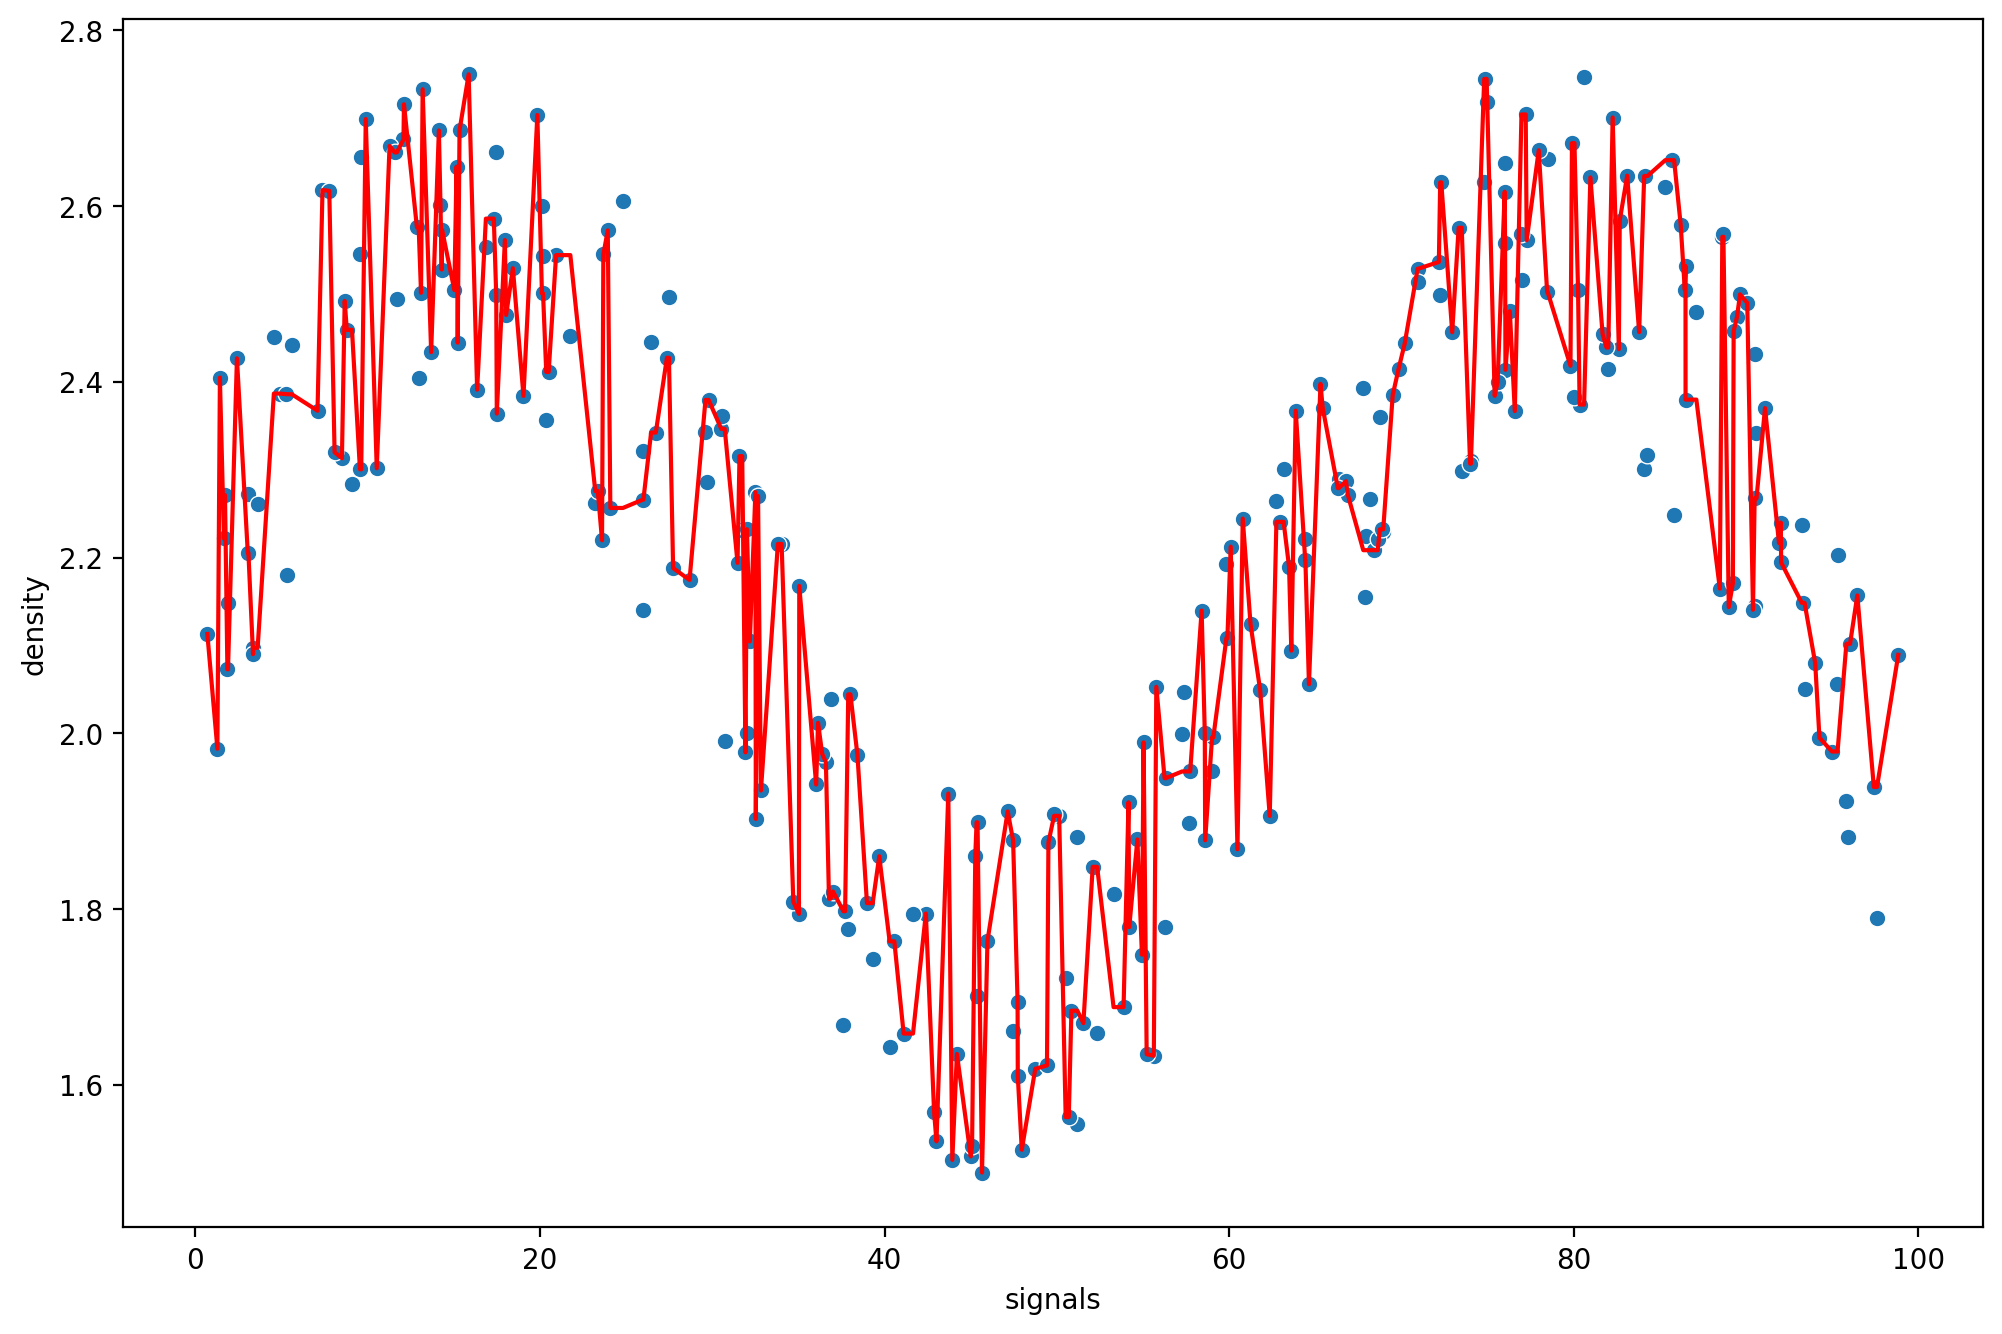

In [116]:
run_model(tree_model,df)

The model is very noisy trying to pick every point...  although it follows the genreal trend in the data

## Random Forest Regression

In [117]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor

In [118]:
rfc_model = RandomForestRegressor()

MAE : 0.2369211828242142
RMSE : 0.14112539361822454
-------------


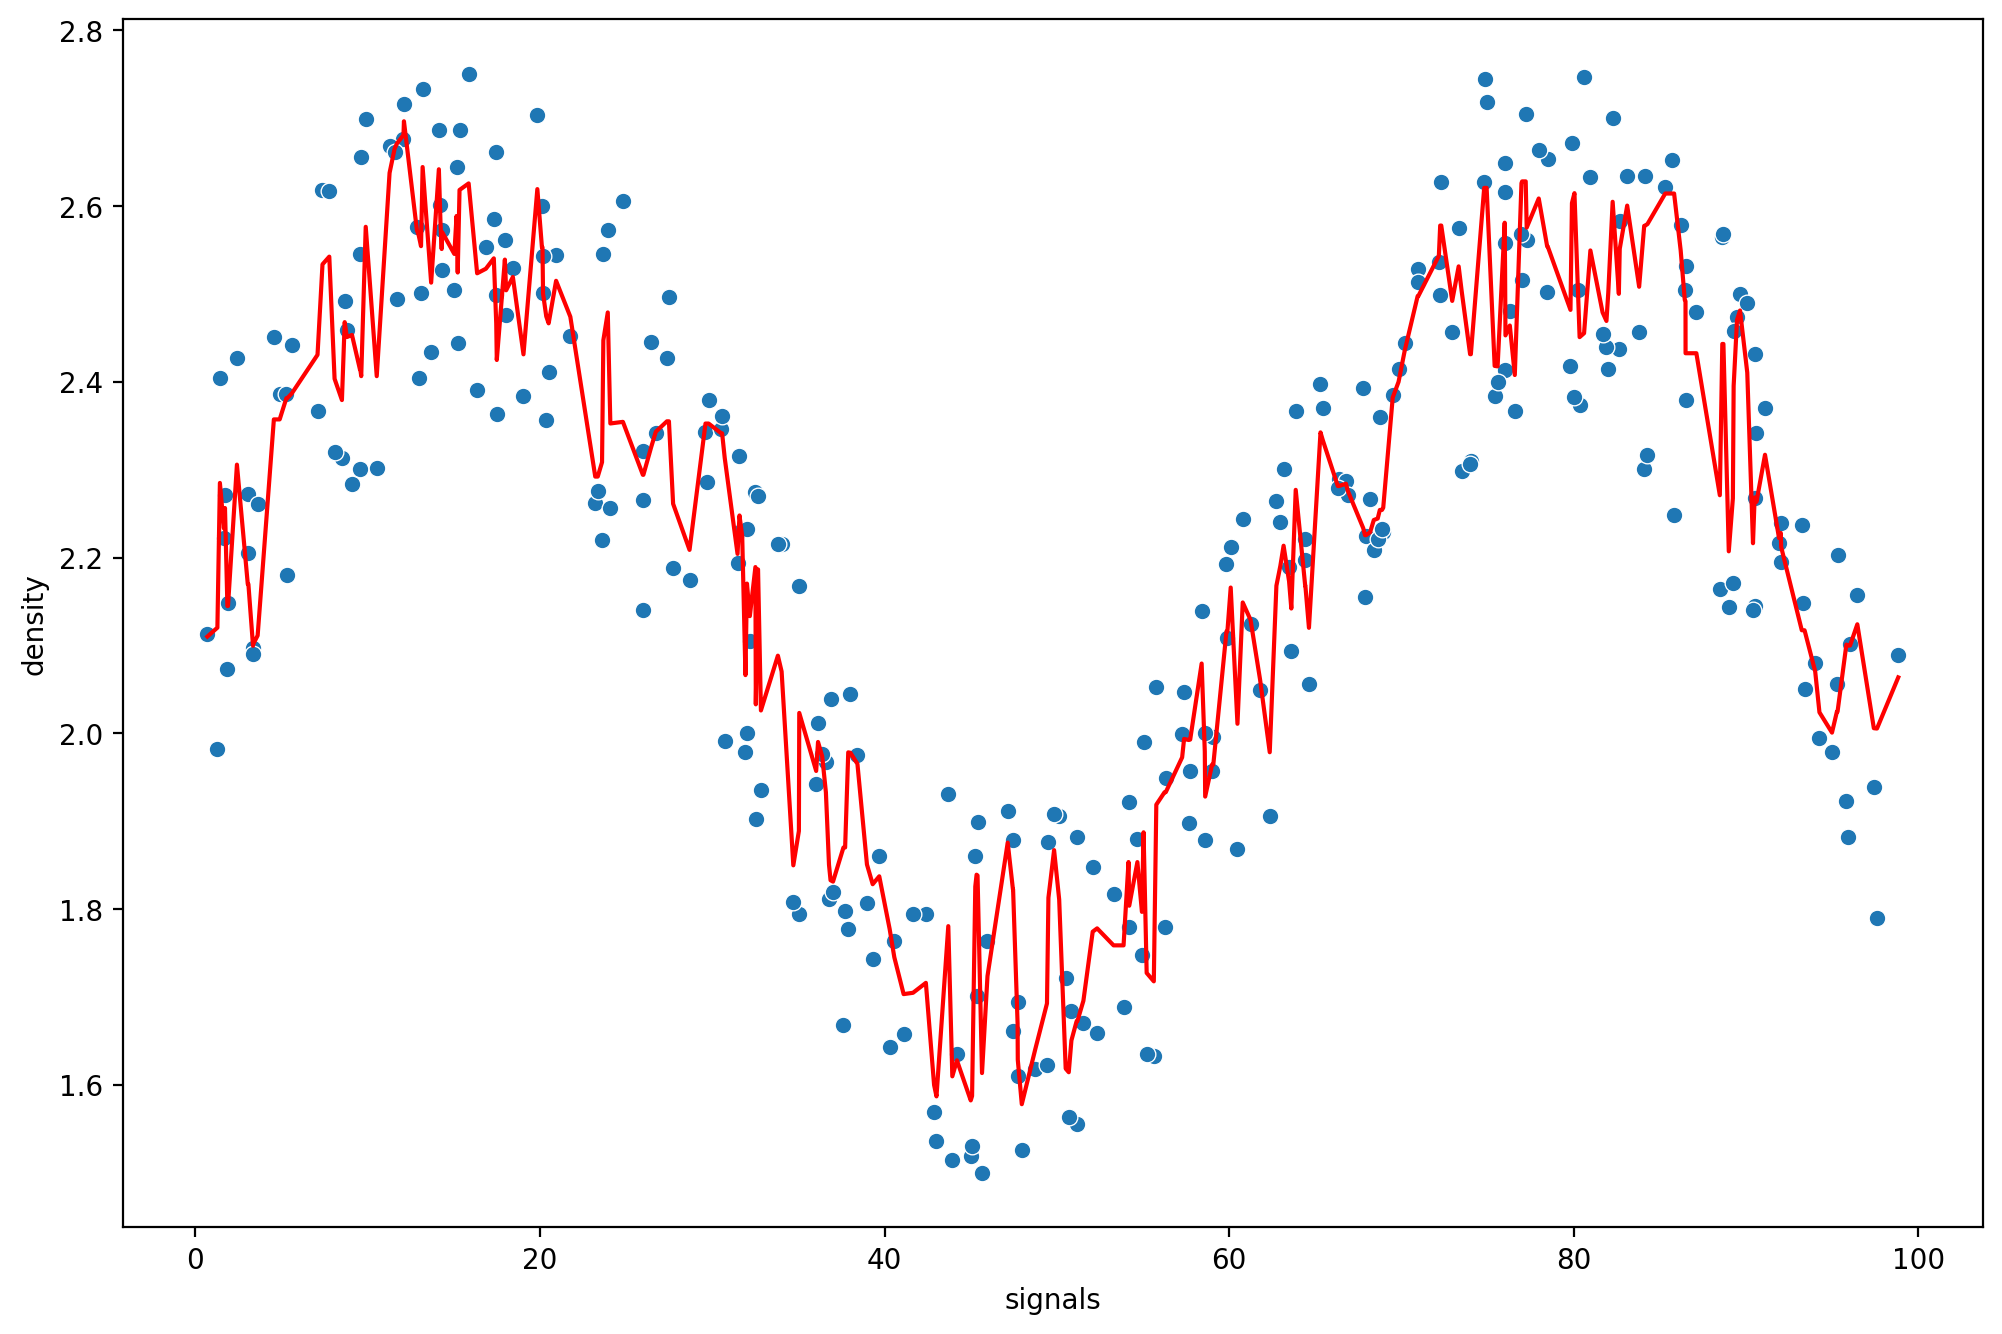

In [119]:
run_model(rfc_model,df)

## Ada Boost

In [120]:
# imporing model
from sklearn.ensemble import AdaBoostRegressor

MAE : 0.2369211828242142
RMSE : 0.13084569887906963
-------------


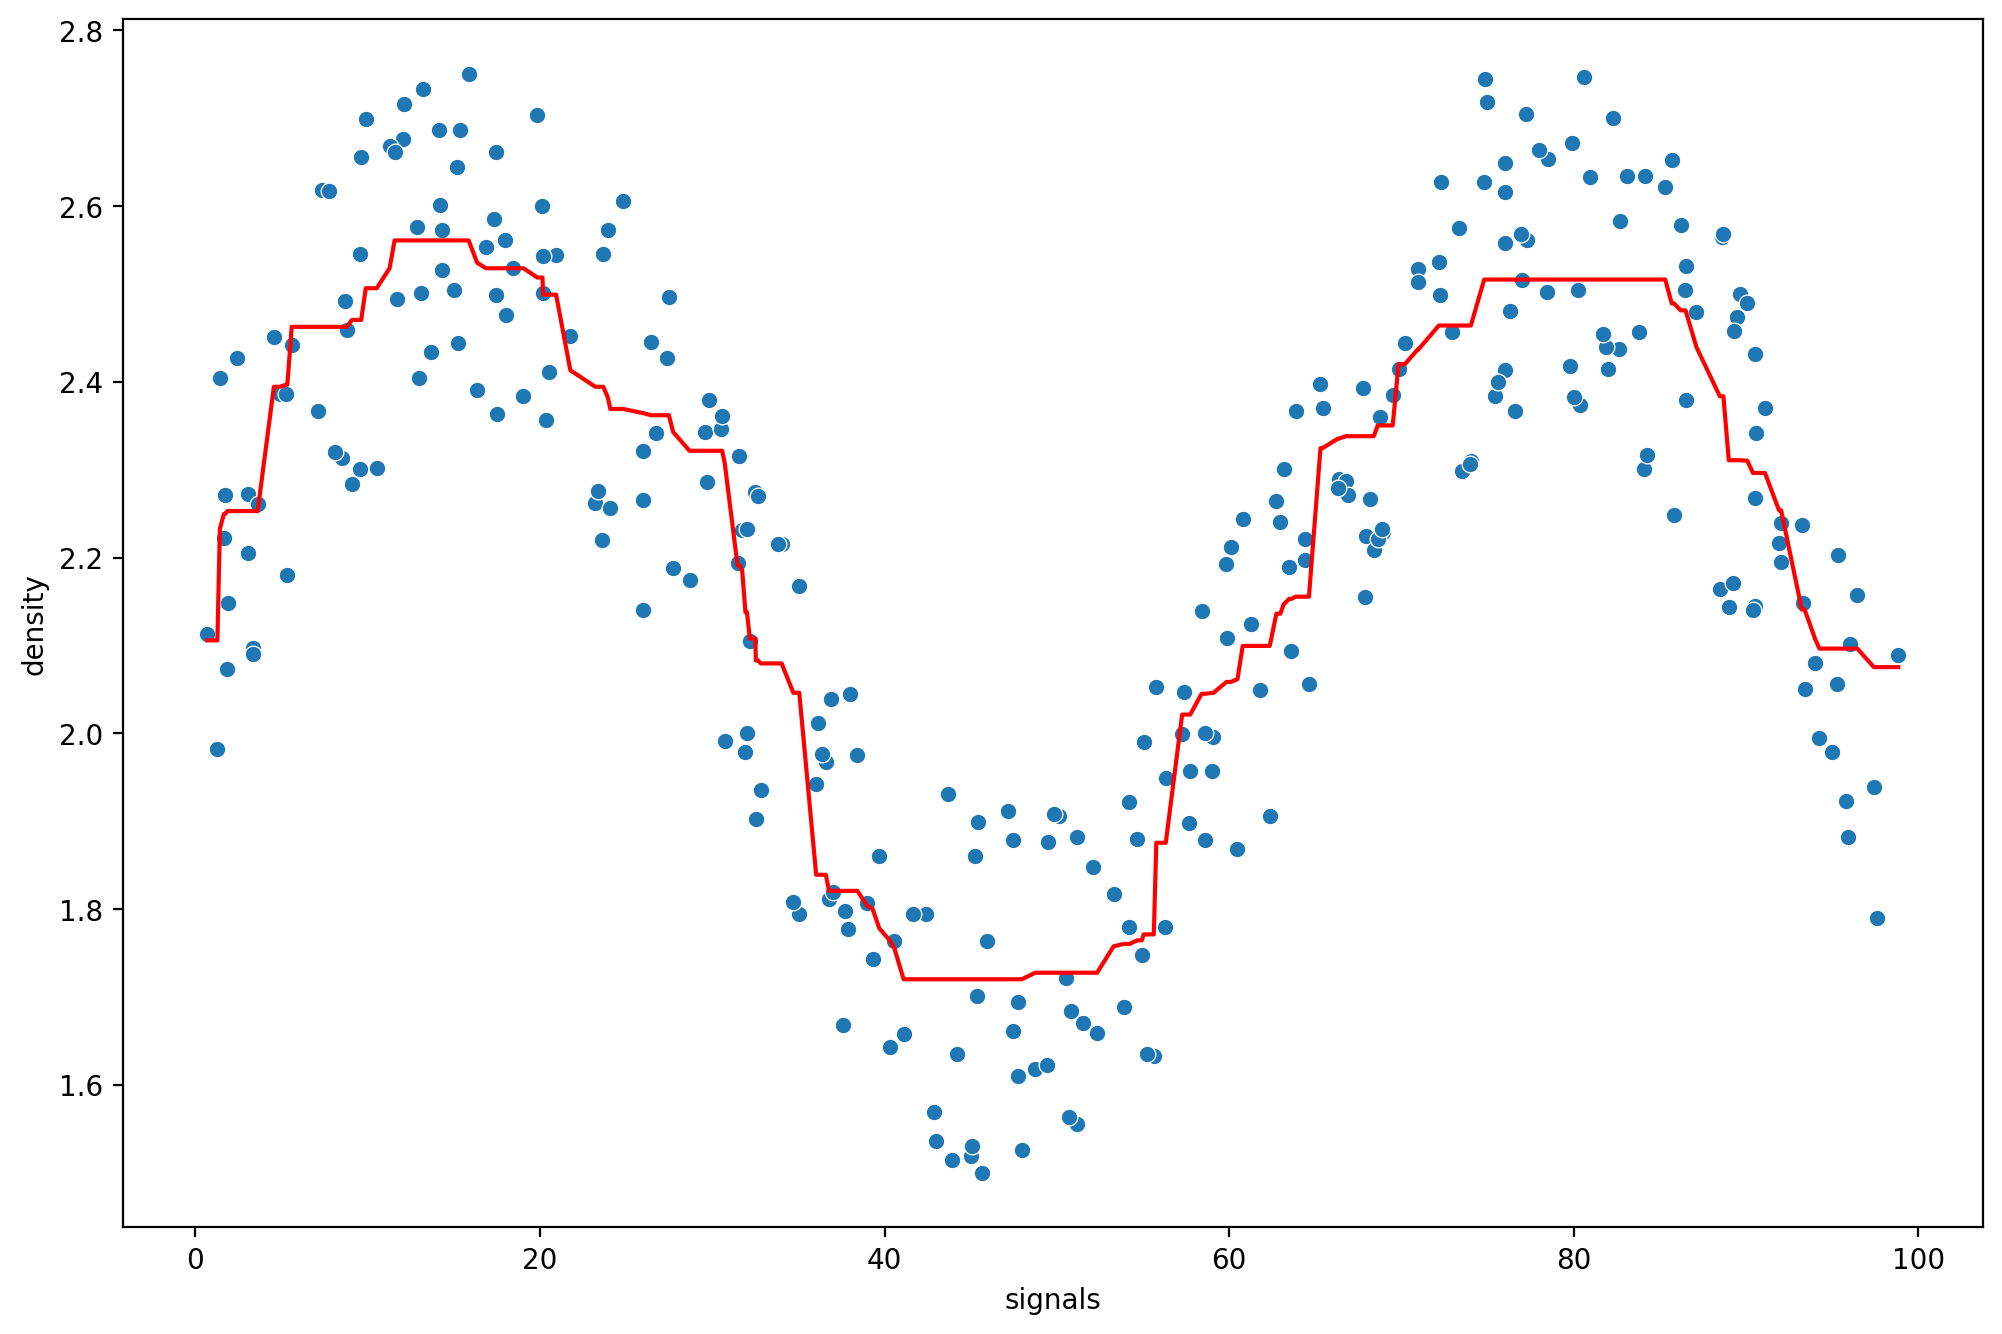

In [121]:
ada_boost = AdaBoostRegressor()
run_model(ada_boost,df)

## Gradiant boost

In [122]:
from sklearn.ensemble import GradientBoostingRegressor

MAE : 0.2369211828242142
RMSE : 0.13336766447799286
-------------


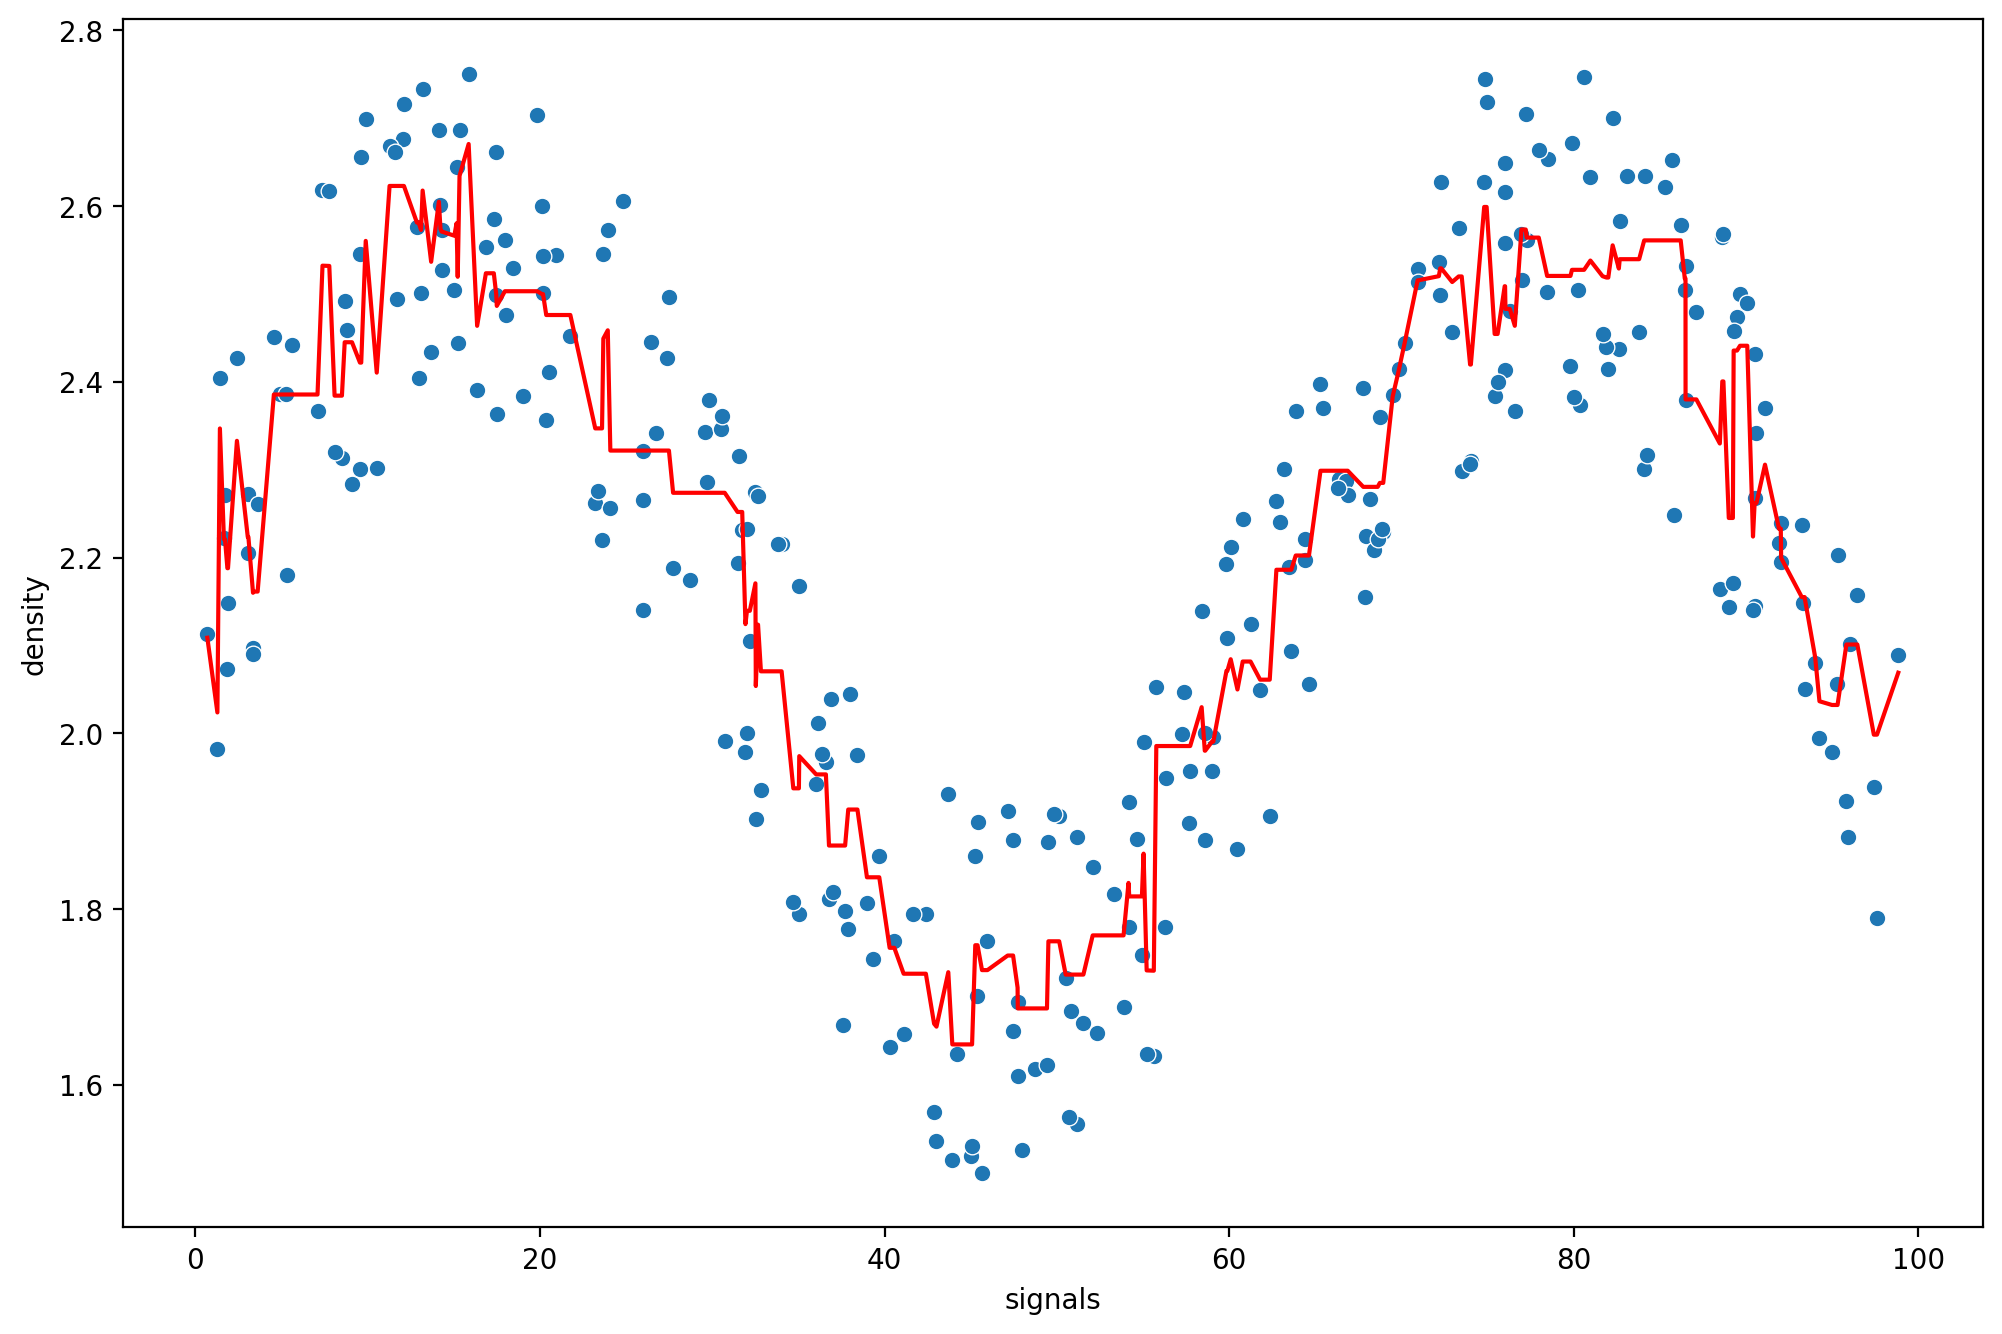

In [123]:
g_boost = GradientBoostingRegressor()
run_model(g_boost,df)

## Bagging Regressor

In [126]:
from sklearn.ensemble import BaggingRegressor

MAE : 0.2369211828242142
RMSE : 0.13996694297989346
-------------


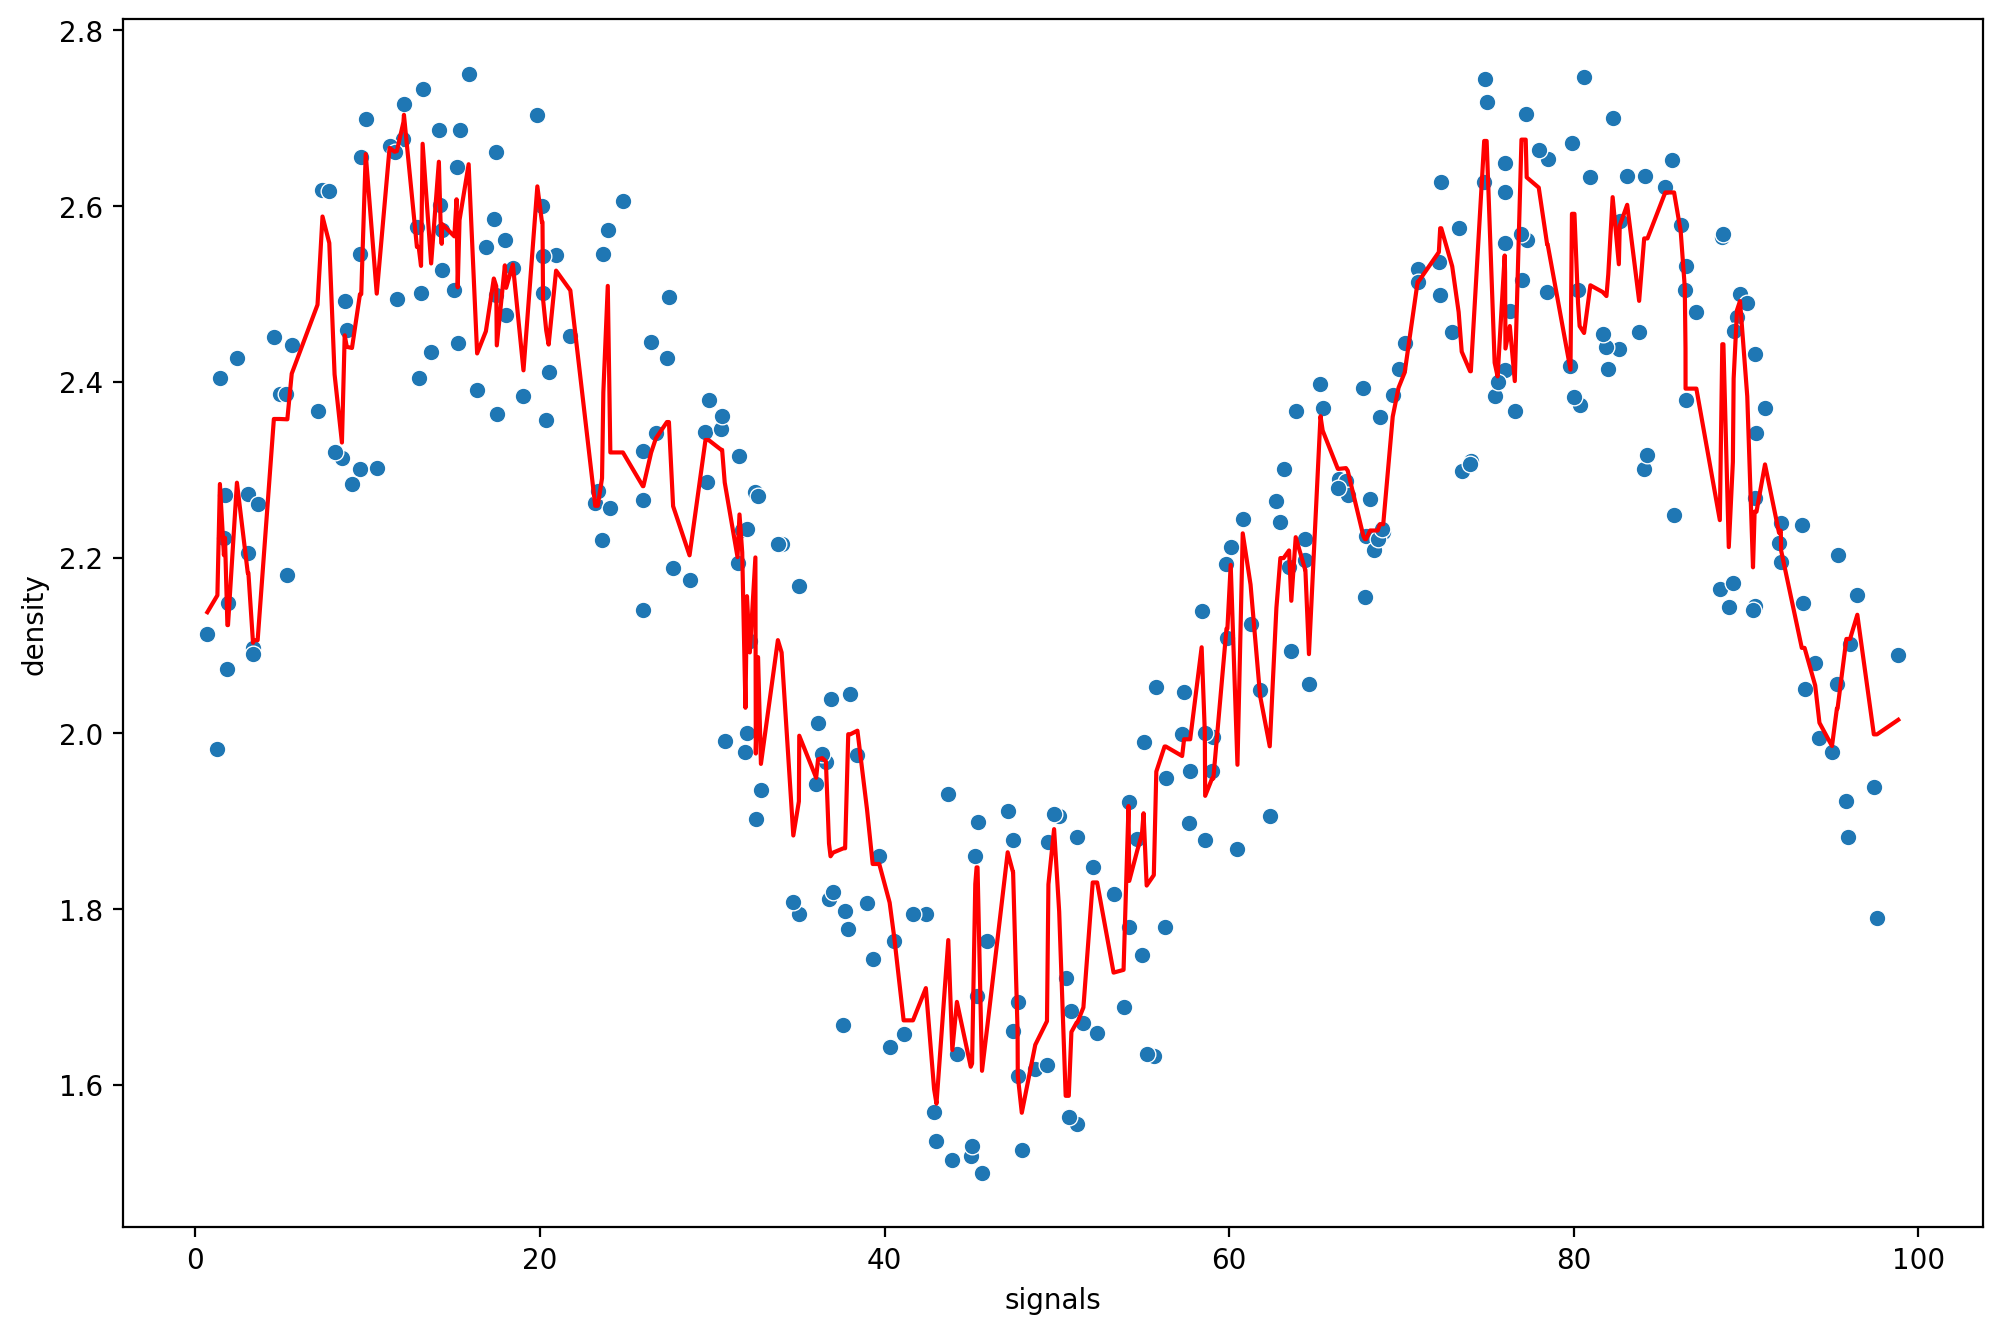

In [125]:
bag_model = BaggingRegressor()
run_model(bag_model,df)

## ExtraTreesRegressor

In [127]:
from sklearn.ensemble import ExtraTreesRegressor

MAE : 0.2369211828242142
RMSE : 0.14970555518992545
-------------


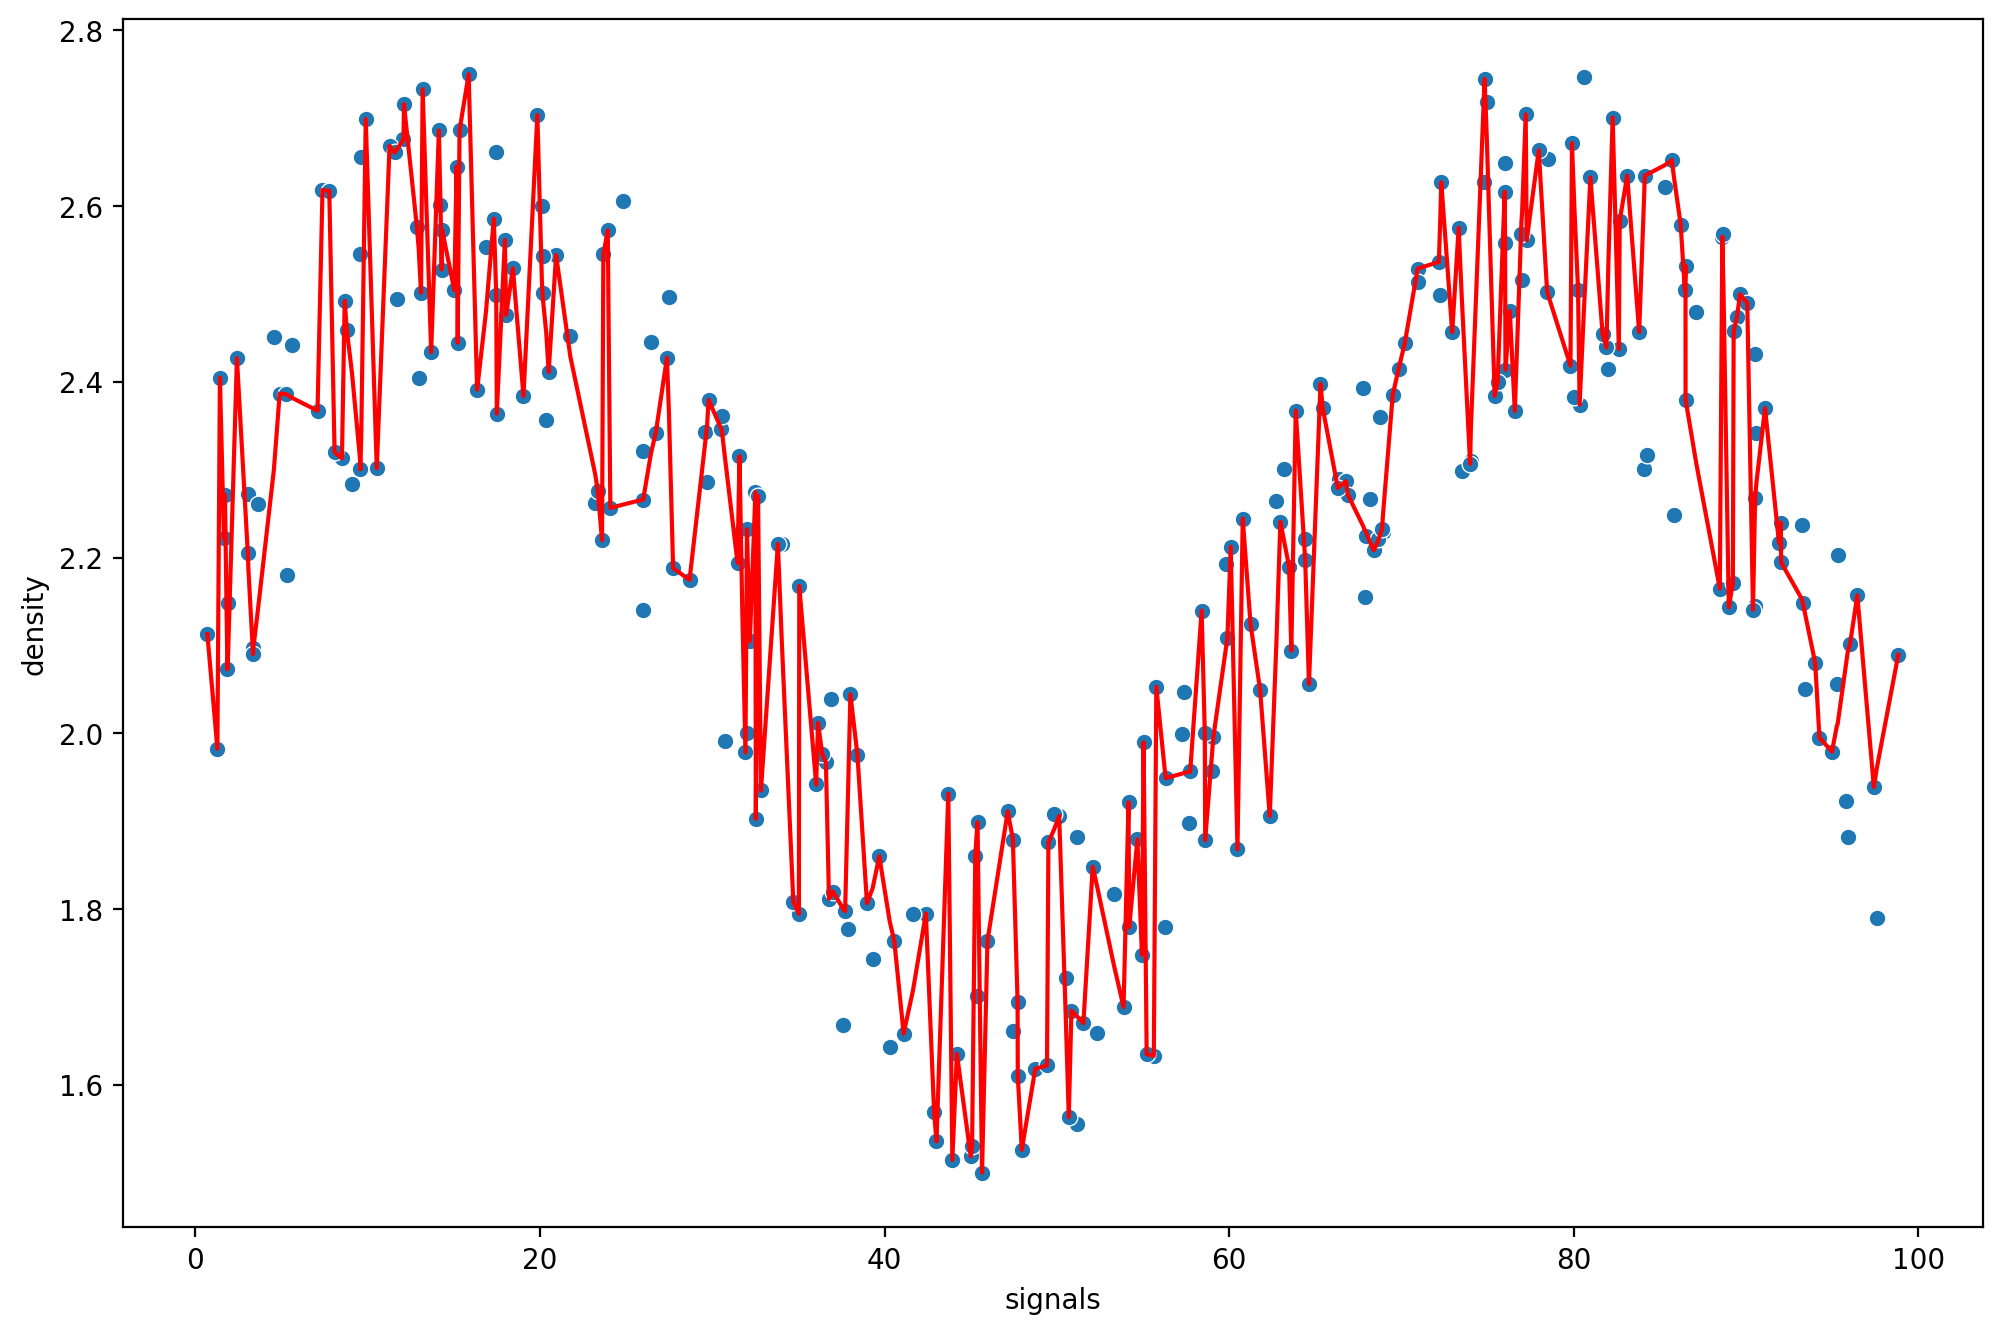

In [128]:
extra_tree = ExtraTreesRegressor()
run_model(extra_tree,df)

## HistGradientBoosting Regressor

In [129]:
from sklearn.ensemble import HistGradientBoostingRegressor

MAE : 0.2369211828242142
RMSE : 0.15139427892070523
-------------


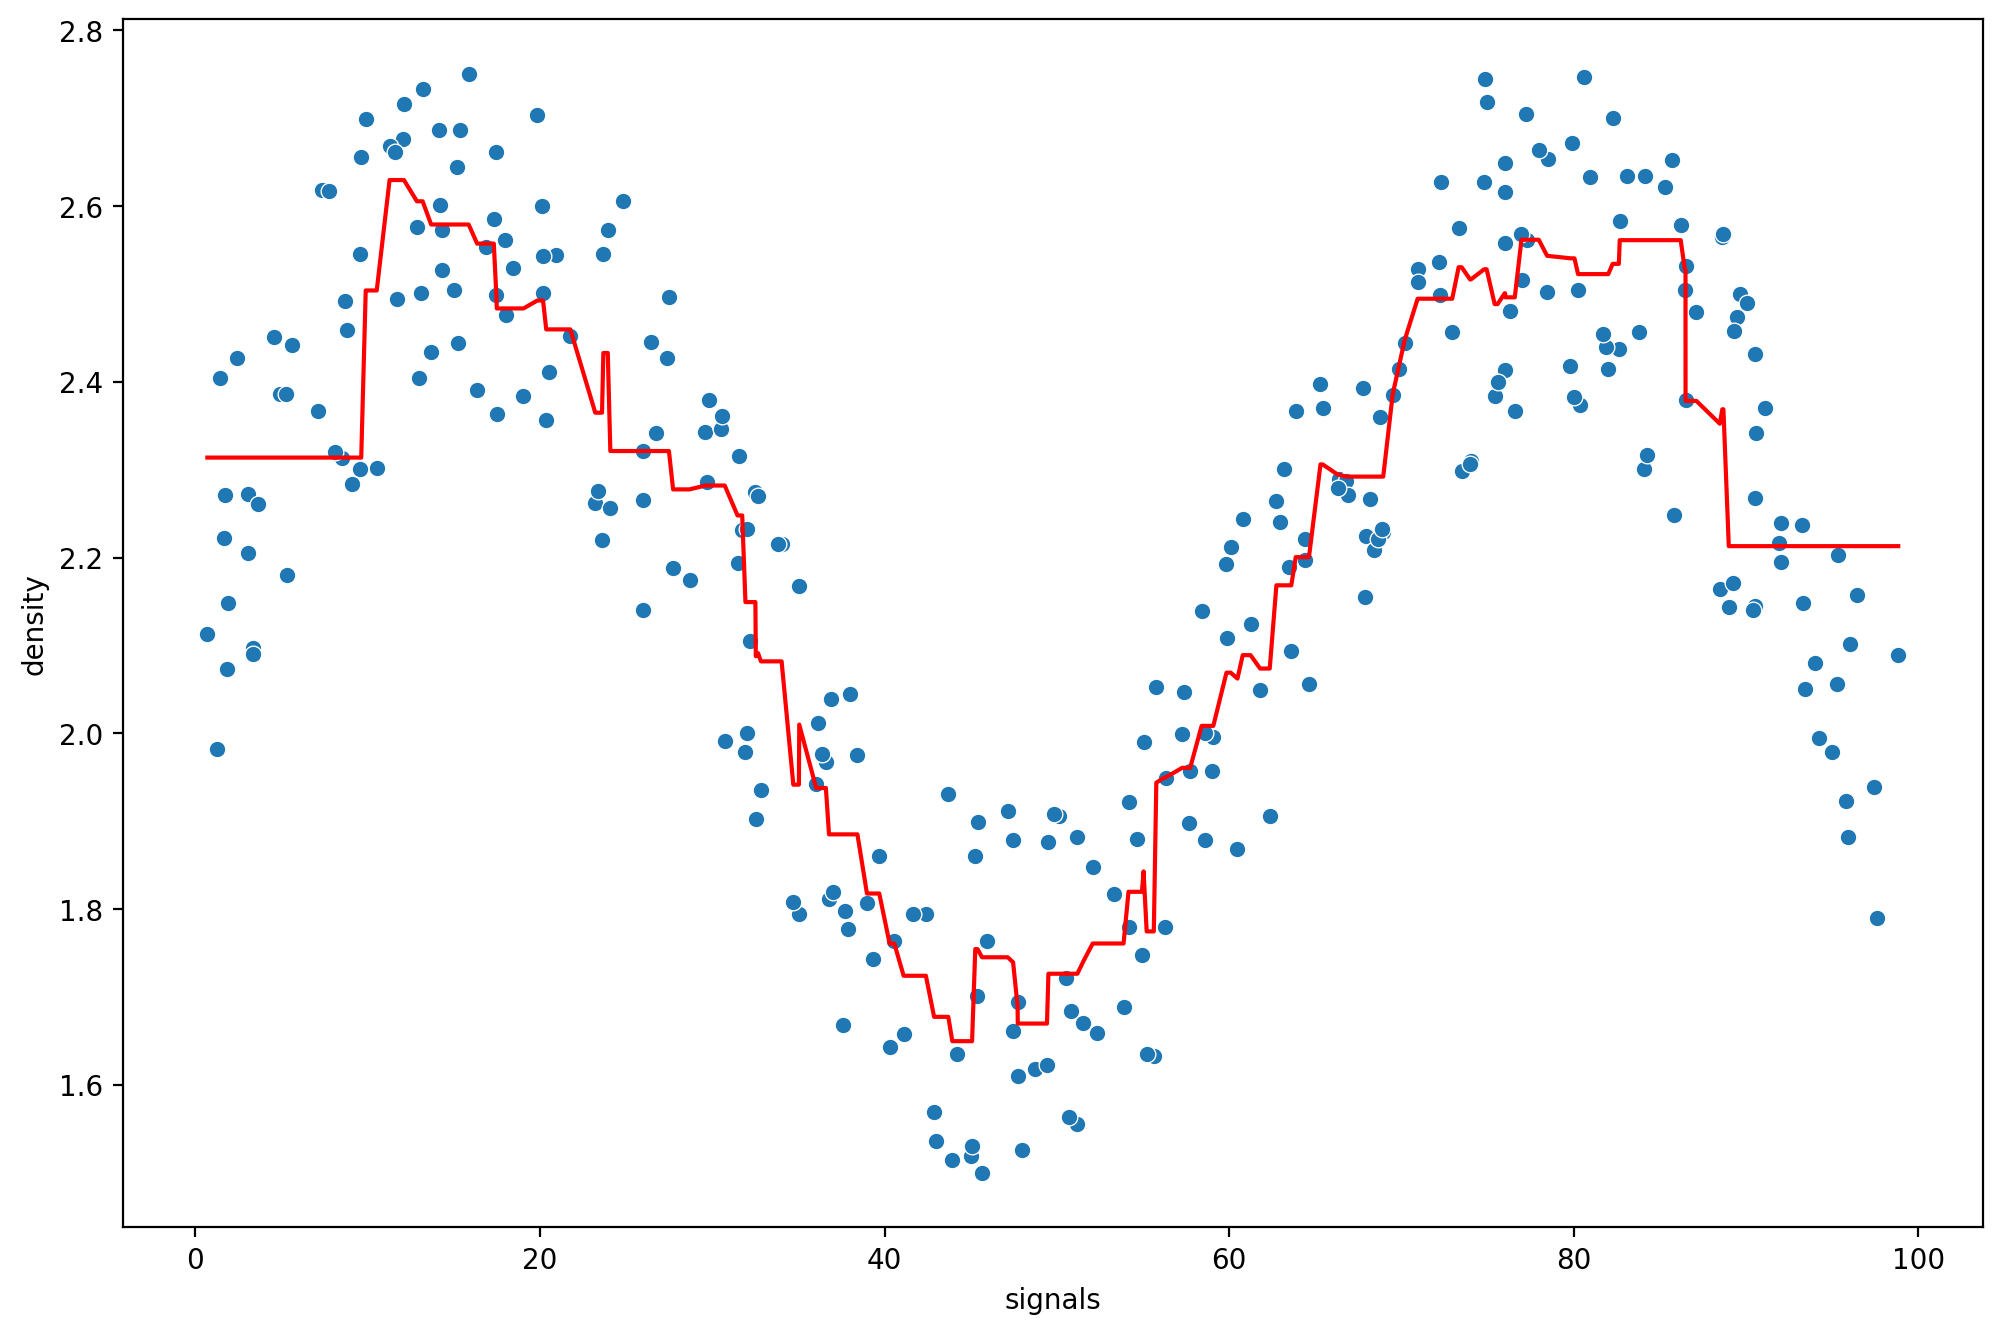

In [130]:
hg_boost = HistGradientBoostingRegressor()
run_model(hg_boost,df)